# <center>Project Title: Exploratory Data Analysis (Credit Risk Datast)

# Contents

- Dataset
- Description about Dataset
- Objecties
- Key Questions
- Approach
- Importing Libraries/ Datasets
- Segregating Dataset
- Preliminery Investigation of Data
- Target Variable
- Categorical Variables
- Numerical Variables
- Missing Values
- Bi-Variate Analysis
- Multi-Variate Analysis
- Duplicate Values
- Outliers & Anomalies
- Important Insights
- Data Pre-Processing Checklist


# About Dataset

Detailed data description of Credit Risk dataset:

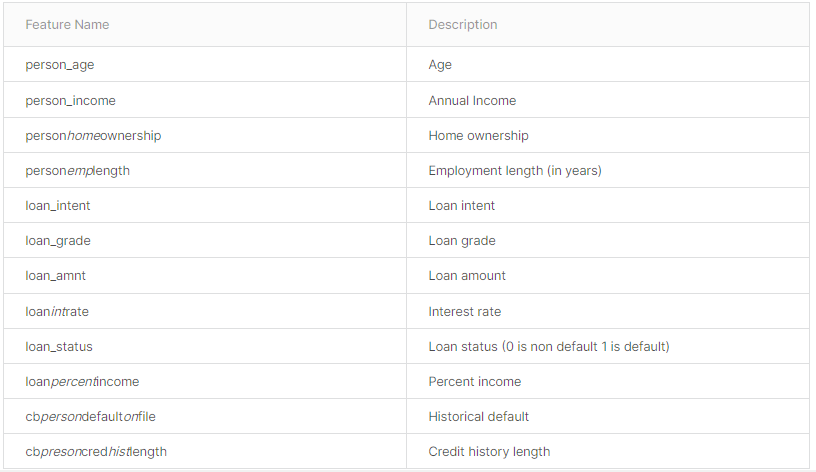

# Source: Kaggle Dataset

# Objectives:

- 1. To figure out the different variables.
- 2. To have the useful insights from the dataset. 

# Key Questions:

- The data-set aims to answer the following key questions:-

- What's the average age 0f applicants having their own home?
- What's the relationship between Income and loan grade?
- What's the relationship between Income and cb_person_default_on_file?
- What's the relationship between Income and loan amount?

# Approach

- Target Variable --->> Loan Status: 0 – Non default , 1 – default
- Nature of Target Variable: Discrete
- Python Libraries: Pandas, Numpy, Matplotlib, Seaborn  

# Importing Libraries/APIs/Datasets

In [16]:
# Data Mainpulation Libraries

import numpy as np
import pandas as pd

import random

In [2]:
# Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format= 'retina'  # plotting pretty figures and avoid blurrry images
sns.set_style('darkgrid')

In [3]:
# Library for missing values
import missingno as msno


# for uni-variate analysis

from sklearn.feature_selection import VarianceThreshold

# other libraries

import os
import io
import requests
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [4]:


df=pd.read_csv('credit_risk_dataset.csv',skipinitialspace=True)
df.head()

# Note: Parameter to remove white space : skipinitialspace=True

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [5]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

##  Segregating Dataset

- 1- Segregating Target Variable from Predictors 
- 2- Segregating Numerical Variables from Categorical Variables

In [52]:
# separating target variable from predictors

X=df.drop(labels=['loan_status'],axis=1)
y=df['loan_status']

In [6]:
# segregating numerical variables from categoricasl variables

df_num=df.select_dtypes(include='number')
df_cat=df.select_dtypes(include=['object','category'])

# Prelimenary Investigation of Data

- 1.df.sample()
- 2.df.shape
- 3.df.inf0()
- 4.df.size
- 5.df.describe(incluse='O')
- 6.df['loan_status'].describe()

In [54]:
df.sample(5)

person_age  person_income person_home_ownership  person_emp_length  \
21111          30          60400                  RENT                2.0   
12616          23          84000                   OWN                7.0   
31526          47         119000                  RENT                5.0   
9899           22          45004                  RENT                1.0   
7448           22          53000              MORTGAGE                6.0   

      loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
21111     VENTURE          B       5000          12.69            0   
12616   EDUCATION          A      17500           8.90            0   
31526    PERSONAL          A      14250           7.66            0   
9899     PERSONAL          C       9000          14.35            0   
7448      VENTURE          E       8000          16.82            0   

       loan_percent_income cb_person_default_on_file  \
21111                 0.08                         N   
12616                 0.21                         N   
31526                 0.12                         N   
9899                  0.20                         Y   
7448                  0.15                         N   

       cb_person_cred_hist_length  
21111                           8  
12616                           3  
31526                          16  
9899                            4  
7448                            4

# Dimensions of DataFrame

In [55]:
df.shape

(32581, 12)

# Information about no. of variables and its types


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [57]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [58]:
df.dtypes.value_counts()

int64      5
object     4
float64    3
dtype: int64

In [59]:
df.size

390972

In [60]:
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [61]:
df.count()

person_age                    32581
person_income                 32581
person_home_ownership         32581
person_emp_length             31686
loan_intent                   32581
loan_grade                    32581
loan_amnt                     32581
loan_int_rate                 29465
loan_status                   32581
loan_percent_income           32581
cb_person_default_on_file     32581
cb_person_cred_hist_length    32581
dtype: int64

# Target Variable:

- 1. df['loan_status'].describe()
- 2. df.loan_status.value_counts()/len(df)*100
- 3. Pie chart
- 4. Bar Chart

In [62]:
df['loan_status'].shape

(32581,)

In [63]:
df['loan_status'].describe()

count    32581.000000
mean         0.218164
std          0.413006
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

In [64]:
df.loan_status.value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

In [65]:
df.loan_status.value_counts()/len(df)*100

0    78.183604
1    21.816396
Name: loan_status, dtype: float64

Target Variable is discrete type having 2 unique values: 0 means non-default and 1 means default.

In [8]:
df['loan_status']

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 32581, dtype: int64

In [13]:
df['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

### Visualization of Target Variable

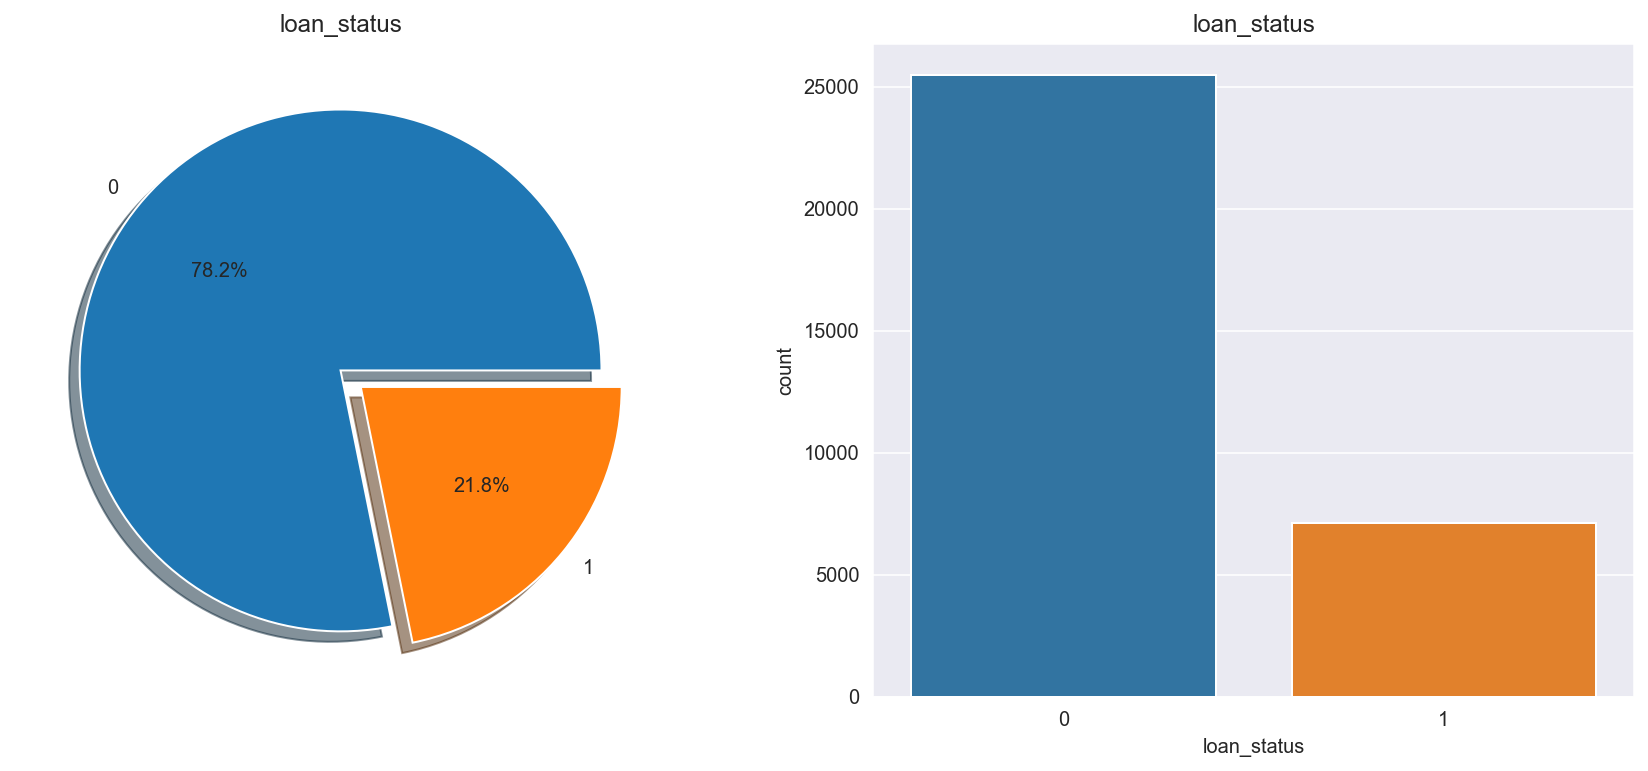

In [7]:
f,ax=plt.subplots(1,2,figsize=(15,6))
df['loan_status'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('loan_status')
ax[0].set_ylabel('')
sns.countplot(x=df['loan_status'],ax=ax[1])
ax[1].set_title('loan_status');

# Correlation of Target Variable with other Variables

In [67]:
cor_target=df.corrwith(df['loan_status'])
cor_target


# 1. Through this method of variable ranking has more relevance in Regression Model, 

person_age                   -0.021629
person_income                -0.144449
person_emp_length            -0.082489
loan_amnt                     0.105376
loan_int_rate                 0.335133
loan_status                   1.000000
loan_percent_income           0.379366
cb_person_cred_hist_length   -0.015529
dtype: float64

In [68]:
# Sort the variables in descending order (Ranking of variables w.r.t corr with target)


cor_target.sort_values(axis=0,ascending=False)

loan_status                   1.000000
loan_percent_income           0.379366
loan_int_rate                 0.335133
loan_amnt                     0.105376
cb_person_cred_hist_length   -0.015529
person_age                   -0.021629
person_emp_length            -0.082489
person_income                -0.144449
dtype: float64

# Categorical Variables:

In [69]:
# A quick glance over Categorical Variables

df.describe(include='O')

person_home_ownership loan_intent loan_grade cb_person_default_on_file
count                  32581       32581      32581                     32581
unique                     4           6          7                         2
top                     RENT   EDUCATION          A                         N
freq                   16446        6453      10777                     26836

In [70]:
df.select_dtypes(include=['object','category']).columns.tolist()

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [71]:
# List of Categorical Variables in a DataFrame

df_cat=df.select_dtypes(include=['object','category'])
df_cat.count()

person_home_ownership        32581
loan_intent                  32581
loan_grade                   32581
cb_person_default_on_file    32581
dtype: int64

In [72]:
# No. of Categorical Variables in a DataFrame

df.dtypes.value_counts()

int64      5
object     4
float64    3
dtype: int64

In [73]:
df_cat

person_home_ownership      loan_intent loan_grade  \
0                      RENT         PERSONAL          D   
1                       OWN        EDUCATION          B   
2                  MORTGAGE          MEDICAL          C   
3                      RENT          MEDICAL          C   
4                      RENT          MEDICAL          C   
...                     ...              ...        ...   
32576              MORTGAGE         PERSONAL          C   
32577              MORTGAGE         PERSONAL          A   
32578                  RENT  HOMEIMPROVEMENT          B   
32579              MORTGAGE         PERSONAL          B   
32580                  RENT          MEDICAL          B   

      cb_person_default_on_file  
0                             Y  
1                             N  
2                             N  
3                             N  
4                             Y  
...                         ...  
32576                         N  
32577                         N  
32578                         N  
32579                         N  
32580                         N  

[32581 rows x 4 columns]

# Frequency of Unique values in each Categorical Variables:

In [74]:
for i in df_cat:
    frequency=df[i].value_counts()
    print('\n')
    print(frequency)



RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64


EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64


A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64


N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64


### Visualization of Categorical Variables:

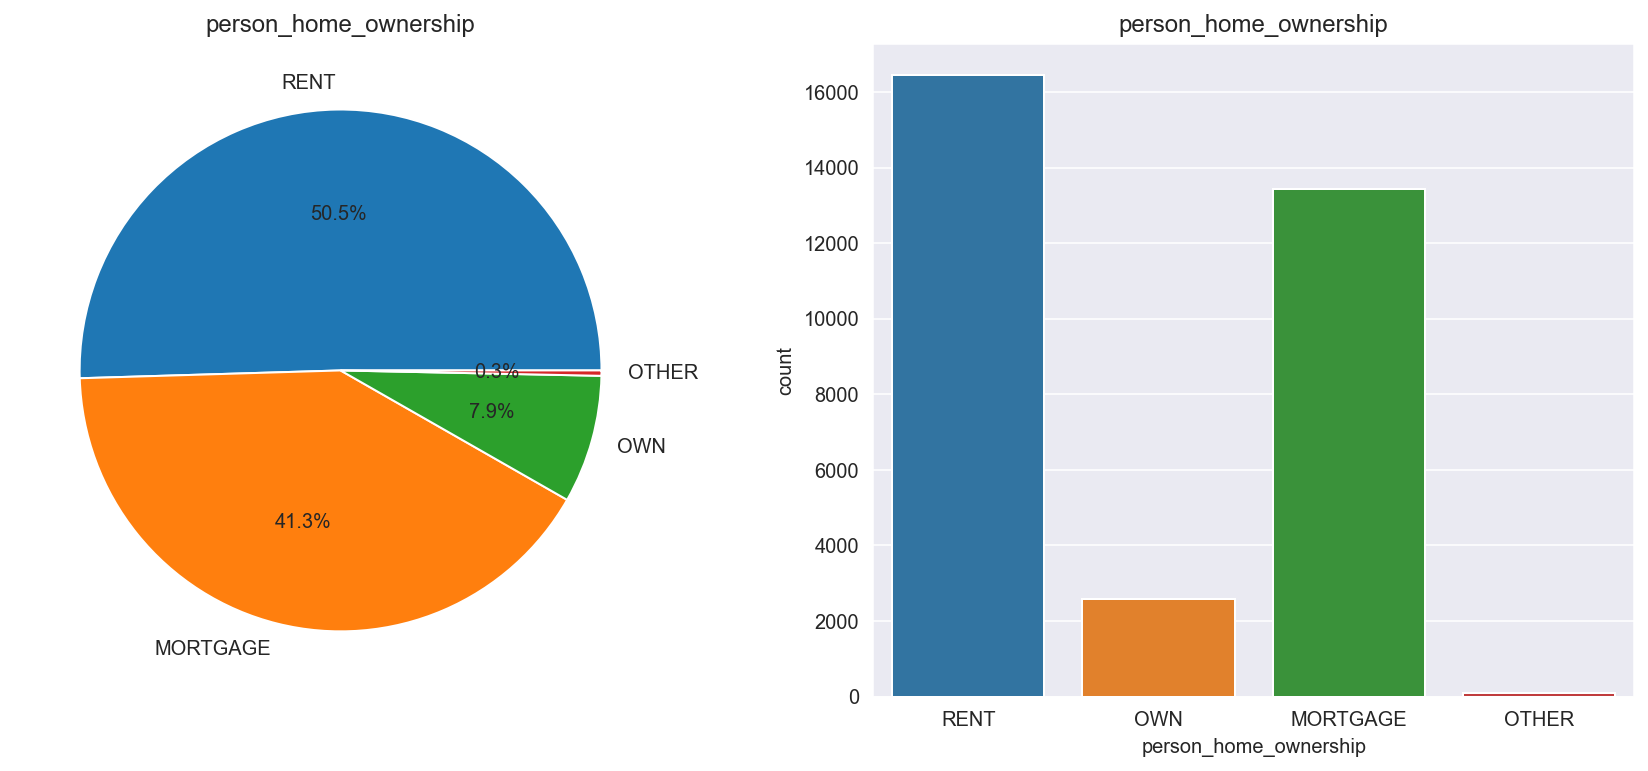

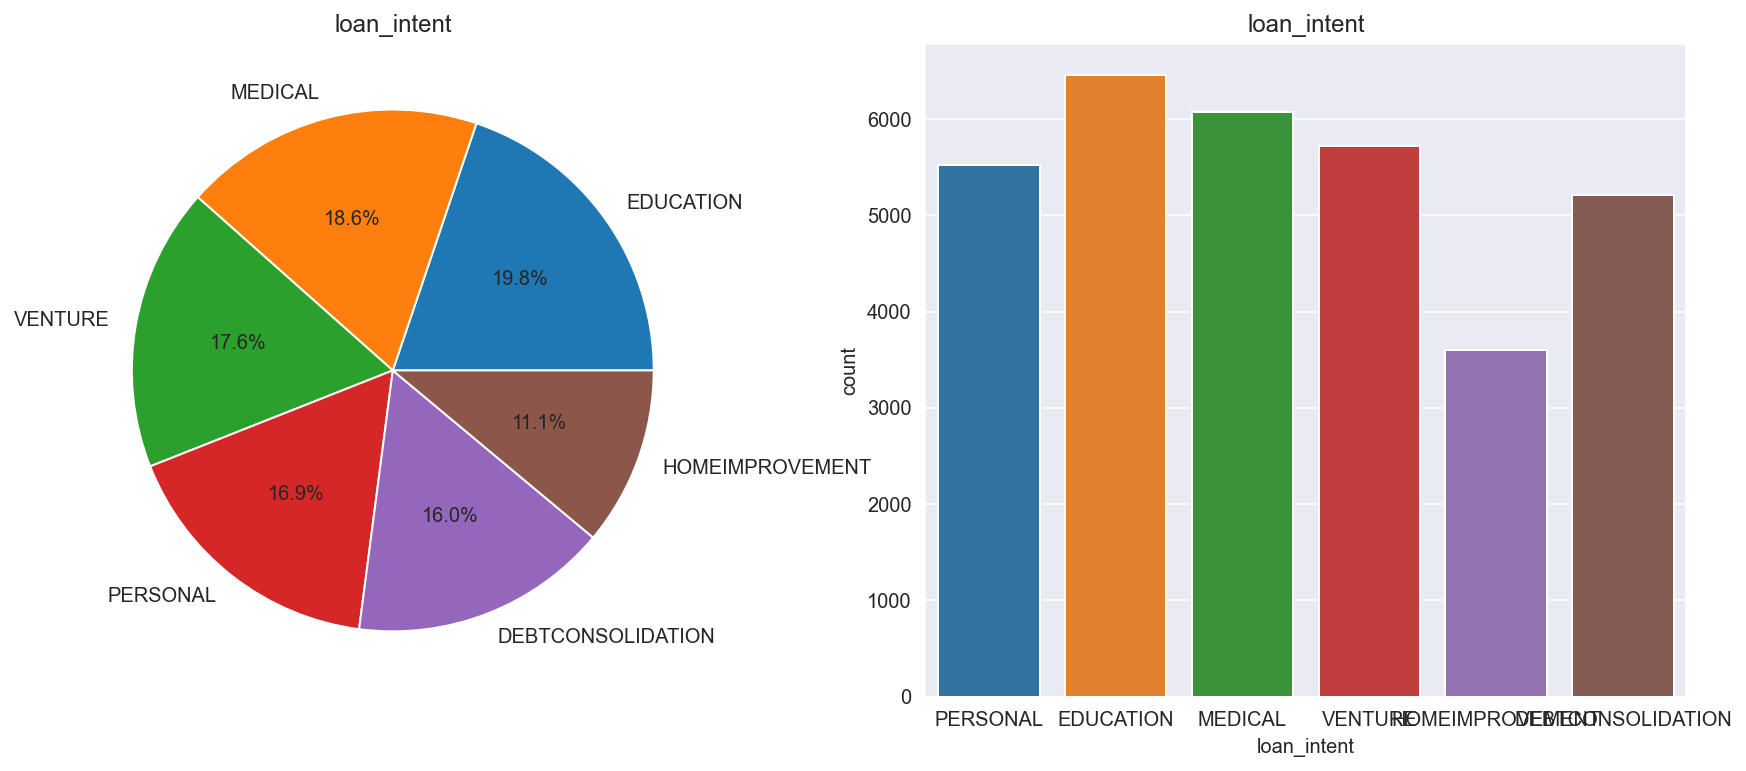

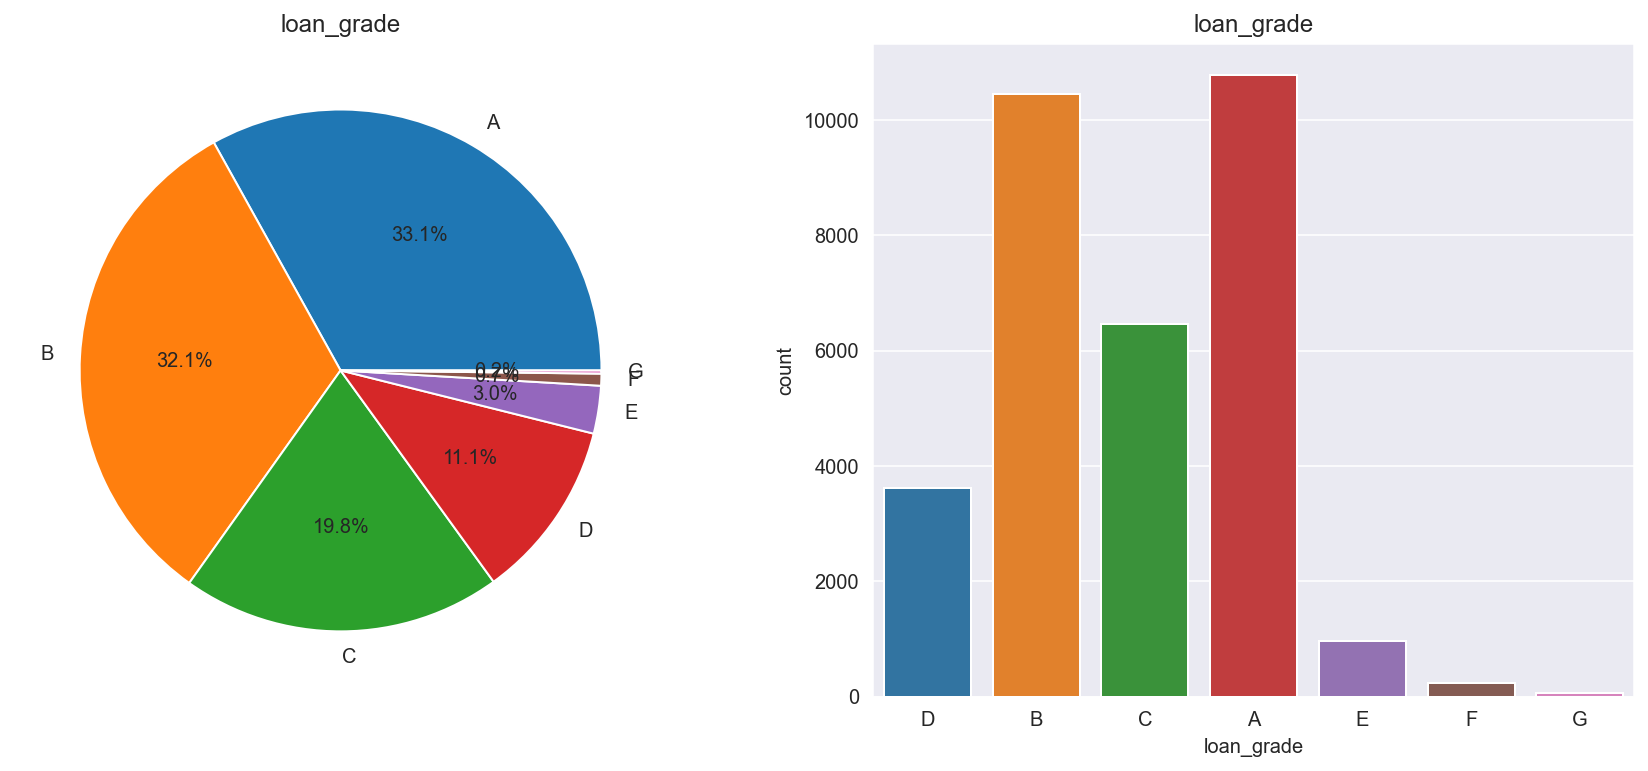

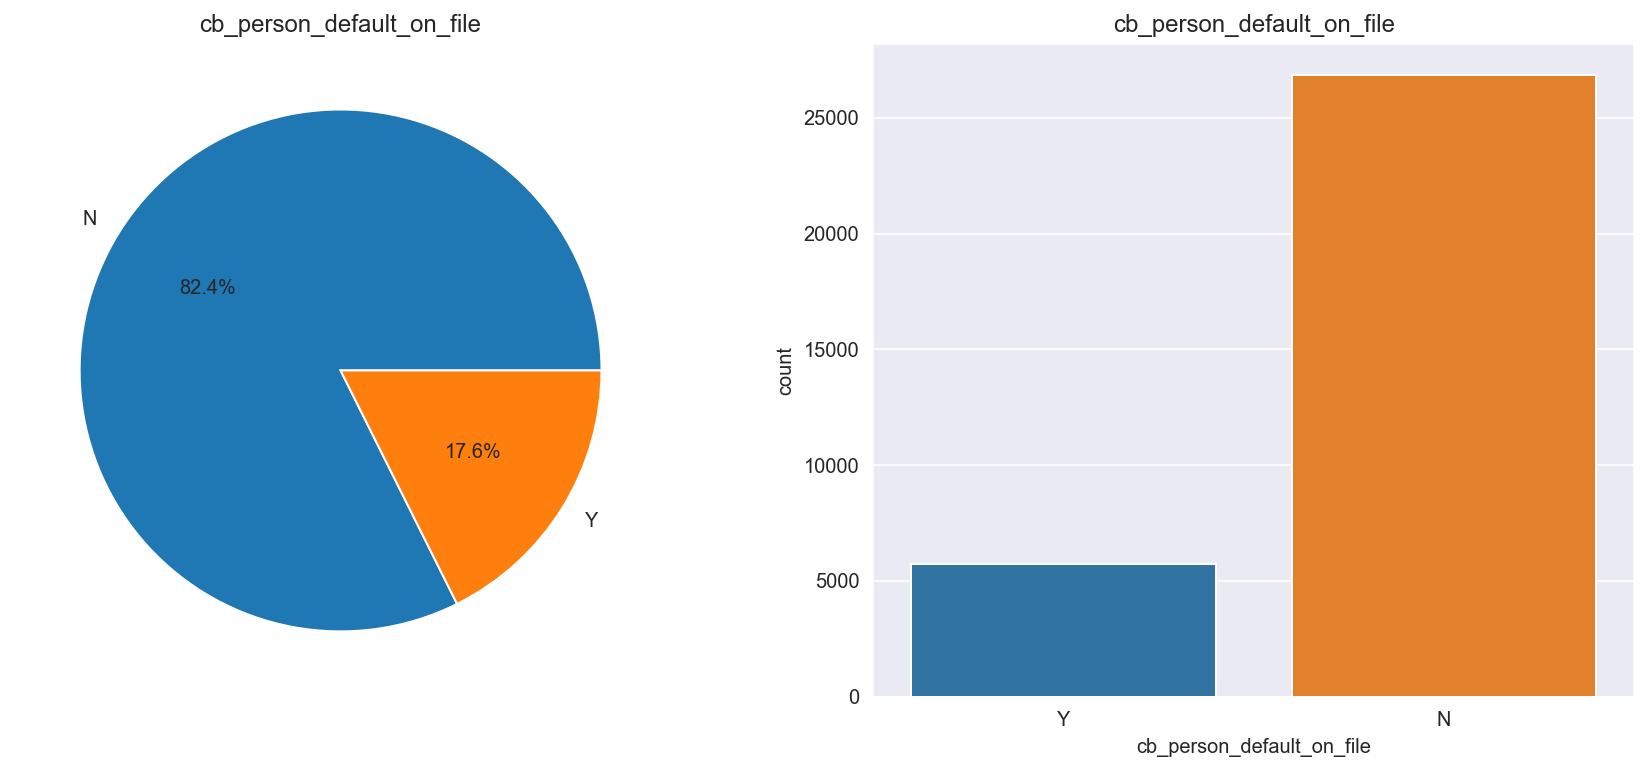

In [75]:
for i in df_cat:
    f,ax=plt.subplots(1,2,figsize=(15,6))
    df[i].value_counts().plot.pie(ax=ax[0],autopct='%1.1f%%',radius=1)
    ax[0].set_title(i)
    ax[0].set_ylabel('')
    sns.countplot(x=df[i],ax=ax[1])
    ax[1].set_title(i);

In [76]:
# Frequency of unique values in each Categorical Variable in percentage form

# df['person_home_ownership'].value_counts()/len(df)*100
# df['loan_intent'].value_counts()/len(df)*100
# (df['loan_grade'].value_counts()/len(df)*100).round(2)
# df['cb_person_default_on_file'].value_counts()/len(df)*100



# # OR

# (df.person_home_ownership.value_counts(normalize=True)*100).round(2)
# (df.loan_intent.value_counts(normalize=True)*100).round(2)
# (df.loan_grade.value_counts(normalize=True)*100).round(2)
# (df.cb_person_default_on_file.value_counts(normalize=True)*100).round(2)

for i in df_cat:
    frequency=(df[i].value_counts(normalize=True)*100).round(2)
    print('\n')
    print(frequency)





RENT        50.48
MORTGAGE    41.26
OWN          7.93
OTHER        0.33
Name: person_home_ownership, dtype: float64


EDUCATION            19.81
MEDICAL              18.63
VENTURE              17.55
PERSONAL             16.95
DEBTCONSOLIDATION    16.00
HOMEIMPROVEMENT      11.06
Name: loan_intent, dtype: float64


A    33.08
B    32.08
C    19.82
D    11.13
E     2.96
F     0.74
G     0.20
Name: loan_grade, dtype: float64


N    82.37
Y    17.63
Name: cb_person_default_on_file, dtype: float64


In [77]:
# Mode of Categorical Values

cat_col=['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']
df[cat_col].mode()

person_home_ownership loan_intent loan_grade cb_person_default_on_file
0                  RENT   EDUCATION          A                         N

In [ ]:
# # Countplot of All Categorical Variables

# fig,axes=plt.subplots(2,2,figsize=(16,10))
# sns.countplot('person_home_ownership',data=df,ax=axes[0,0])
# sns.countplot('loan_intent',data=df,ax=axes[0,1])
# sns.countplot('loan_grade',data=df,ax=axes[1,1])
# sns.countplot('cb_person_default_on_file',data=df,ax=axes[1,0]);

# Numerical Variables:

In [78]:
df_num

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0              22          59000              123.0      35000          16.02   
1              21           9600                5.0       1000          11.14   
2              25           9600                1.0       5500          12.87   
3              23          65500                4.0      35000          15.23   
4              24          54400                8.0      35000          14.27   
...           ...            ...                ...        ...            ...   
32576          57          53000                1.0       5800          13.16   
32577          54         120000                4.0      17625           7.49   
32578          65          76000                3.0      35000          10.99   
32579          56         150000                5.0      15000          11.48   
32580          66          42000                2.0       6475           9.99   

       loan_status  loan_percent_income  cb_person_cred_hist_length  
0                1                 0.59                           3  
1                0                 0.10                           2  
2                1                 0.57                           3  
3                1                 0.53                           2  
4                1                 0.55                           4  
...            ...                  ...                         ...  
32576            0                 0.11                          30  
32577            0                 0.15                          19  
32578            1                 0.46                          28  
32579            0                 0.10                          26  
32580            0                 0.15                          30  

[32581 rows x 8 columns]

In [79]:
df_num.count()

person_age                    32581
person_income                 32581
person_emp_length             31686
loan_amnt                     32581
loan_int_rate                 29465
loan_status                   32581
loan_percent_income           32581
cb_person_cred_hist_length    32581
dtype: int64

In [80]:
df_num.max()

person_age                        144.00
person_income                 6000000.00
person_emp_length                 123.00
loan_amnt                       35000.00
loan_int_rate                      23.22
loan_status                         1.00
loan_percent_income                 0.83
cb_person_cred_hist_length         30.00
dtype: float64

In [81]:
df_num.min()

person_age                      20.00
person_income                 4000.00
person_emp_length                0.00
loan_amnt                      500.00
loan_int_rate                    5.42
loan_status                      0.00
loan_percent_income              0.00
cb_person_cred_hist_length       2.00
dtype: float64

In [82]:
df_num.mean()

person_age                       27.734600
person_income                 66074.848470
person_emp_length                 4.789686
loan_amnt                      9589.371106
loan_int_rate                    11.011695
loan_status                       0.218164
loan_percent_income               0.170203
cb_person_cred_hist_length        5.804211
dtype: float64

### Descriptive Statistics

In [83]:
# Basic Statistical summery of Numerical Variables

df_num.describe().T.round(2)

count      mean       std      min       25%  \
person_age                  32581.0     27.73      6.35    20.00     23.00   
person_income               32581.0  66074.85  61983.12  4000.00  38500.00   
person_emp_length           31686.0      4.79      4.14     0.00      2.00   
loan_amnt                   32581.0   9589.37   6322.09   500.00   5000.00   
loan_int_rate               29465.0     11.01      3.24     5.42      7.90   
loan_status                 32581.0      0.22      0.41     0.00      0.00   
loan_percent_income         32581.0      0.17      0.11     0.00      0.09   
cb_person_cred_hist_length  32581.0      5.80      4.06     2.00      3.00   

                                 50%       75%         max  
person_age                     26.00     30.00      144.00  
person_income               55000.00  79200.00  6000000.00  
person_emp_length               4.00      7.00      123.00  
loan_amnt                    8000.00  12200.00    35000.00  
loan_int_rate                  10.99     13.47       23.22  
loan_status                     0.00      0.00        1.00  
loan_percent_income             0.15      0.23        0.83  
cb_person_cred_hist_length      4.00      8.00       30.00

### Distribution, Skewness, Kurtosis


- 1. Density plot for distribution
- 2. df[''].skew()
- 3. df.kurtosis()

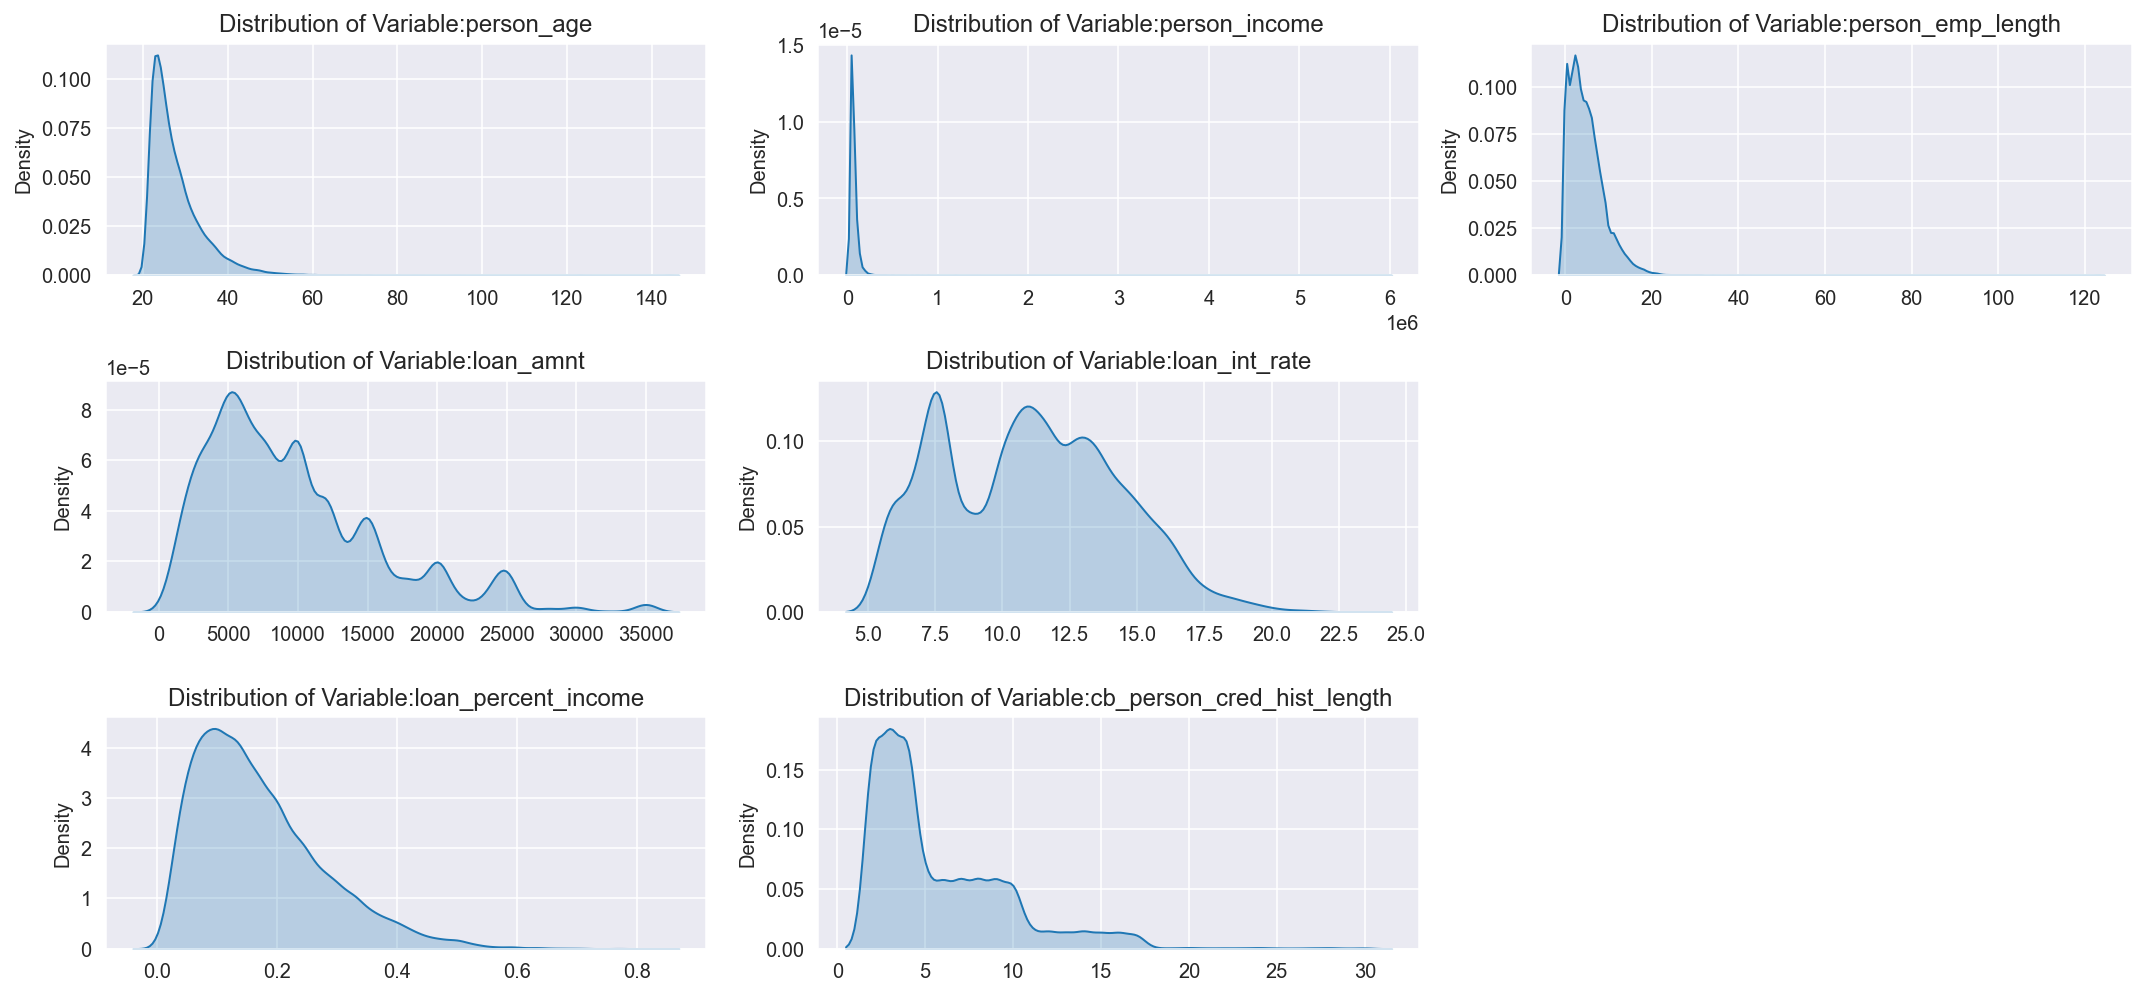

In [86]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,7),sharex=False,sharey=False)
axes=axes.ravel()  # array to ID
cols=df_num.columns[:] # create a list of dataframe columns to use

for col,ax in zip(cols,axes):
    data=df_num # select the data
    sns.kdeplot(data=data,x=col,shade=True,ax=ax)
    ax.set(title=f'Distribution of Variable:{col}',xlabel=None)
           
           
           
fig.delaxes(axes[5])   # delete the empty subplot
fig.delaxes(axes[8])
fig.tight_layout();
           

In [17]:
def rand_color():
    c = "#"+"".join(map(hex,random.choices(range(256), k=3))).replace("0x","")
    if len(c) != 7:
        return rand_color()
    return c

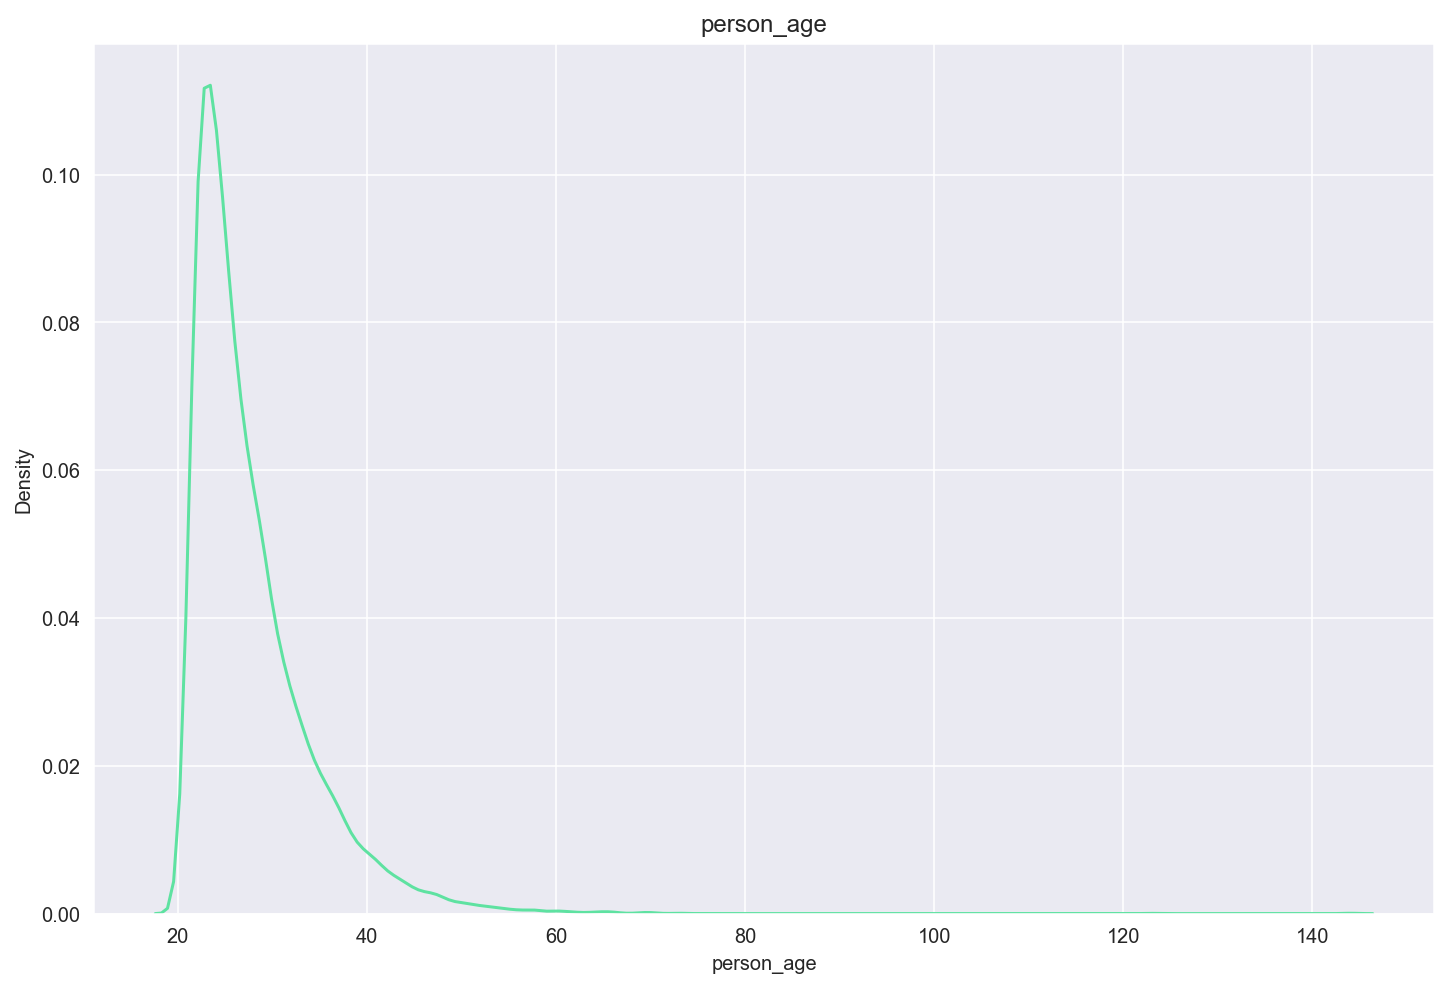

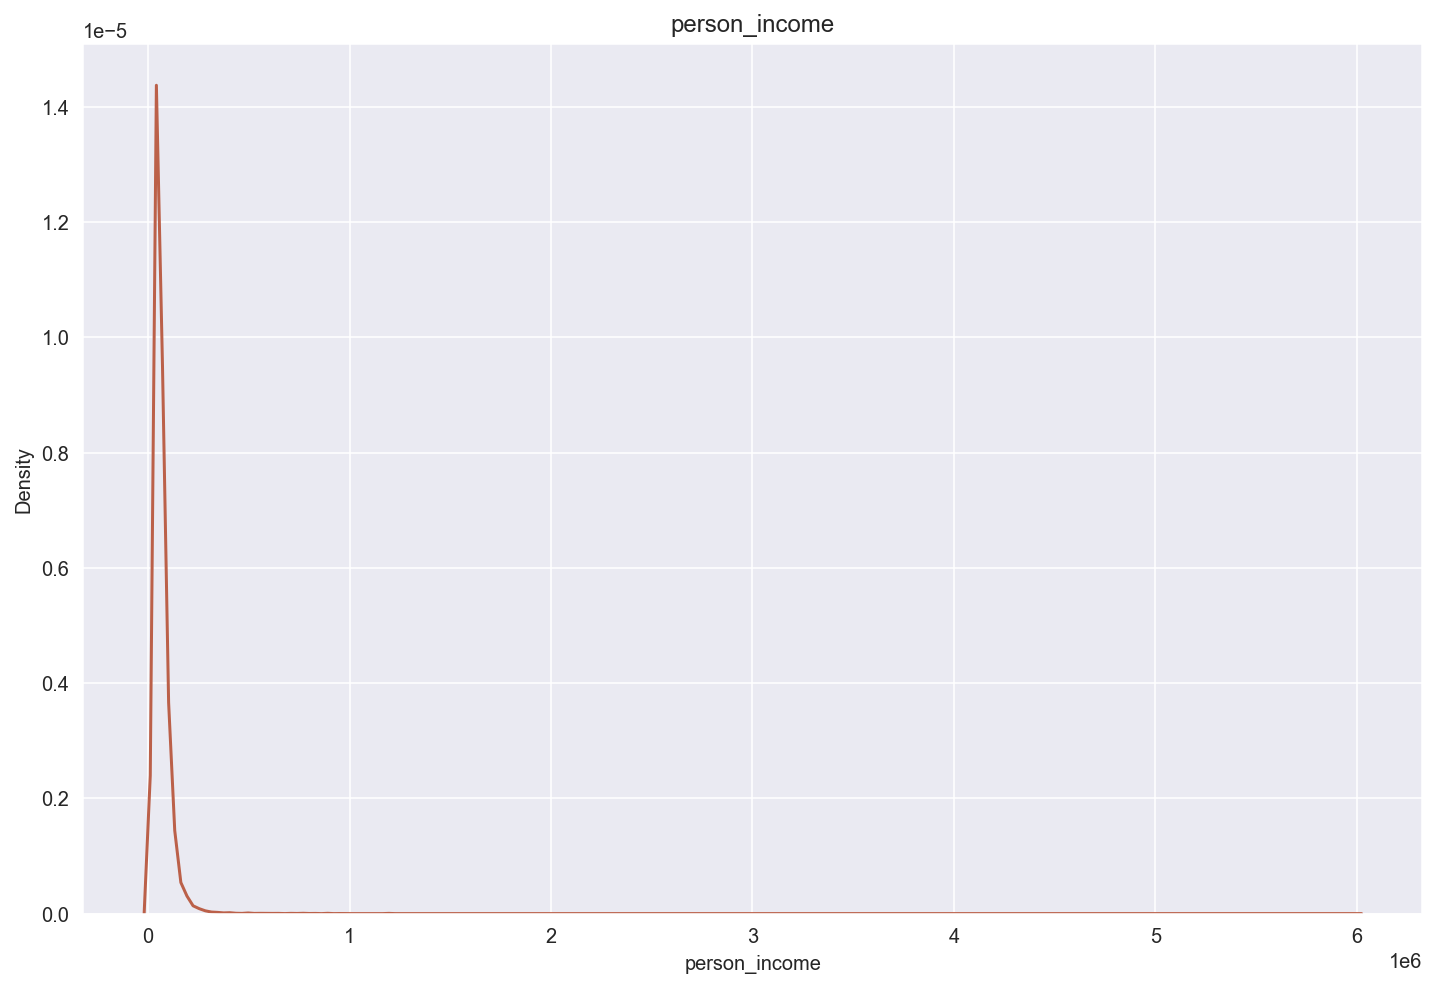

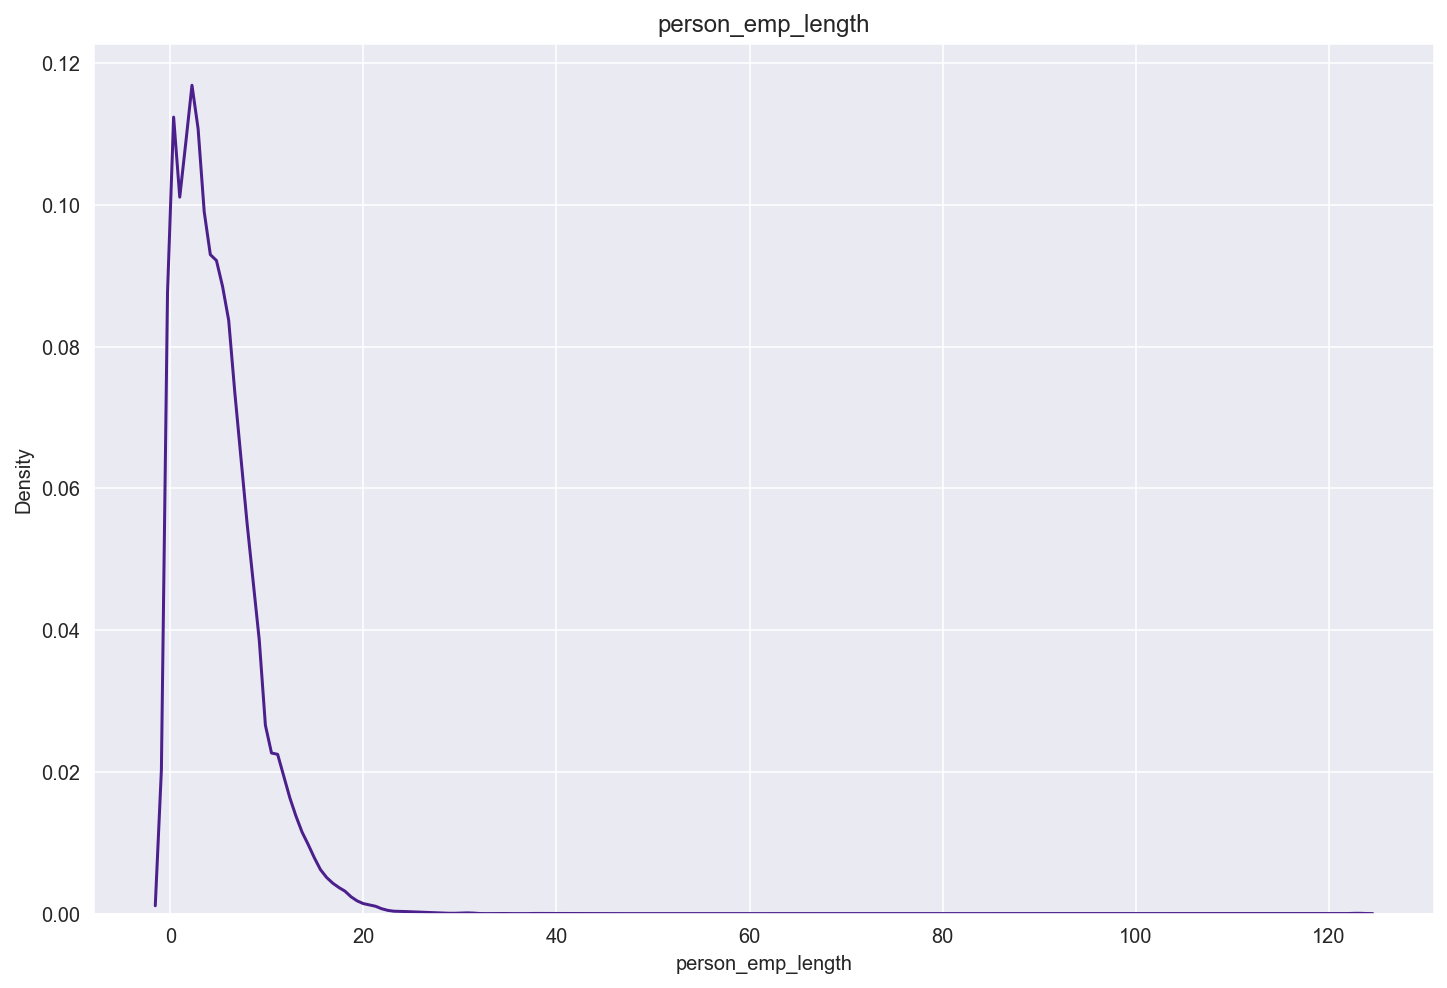

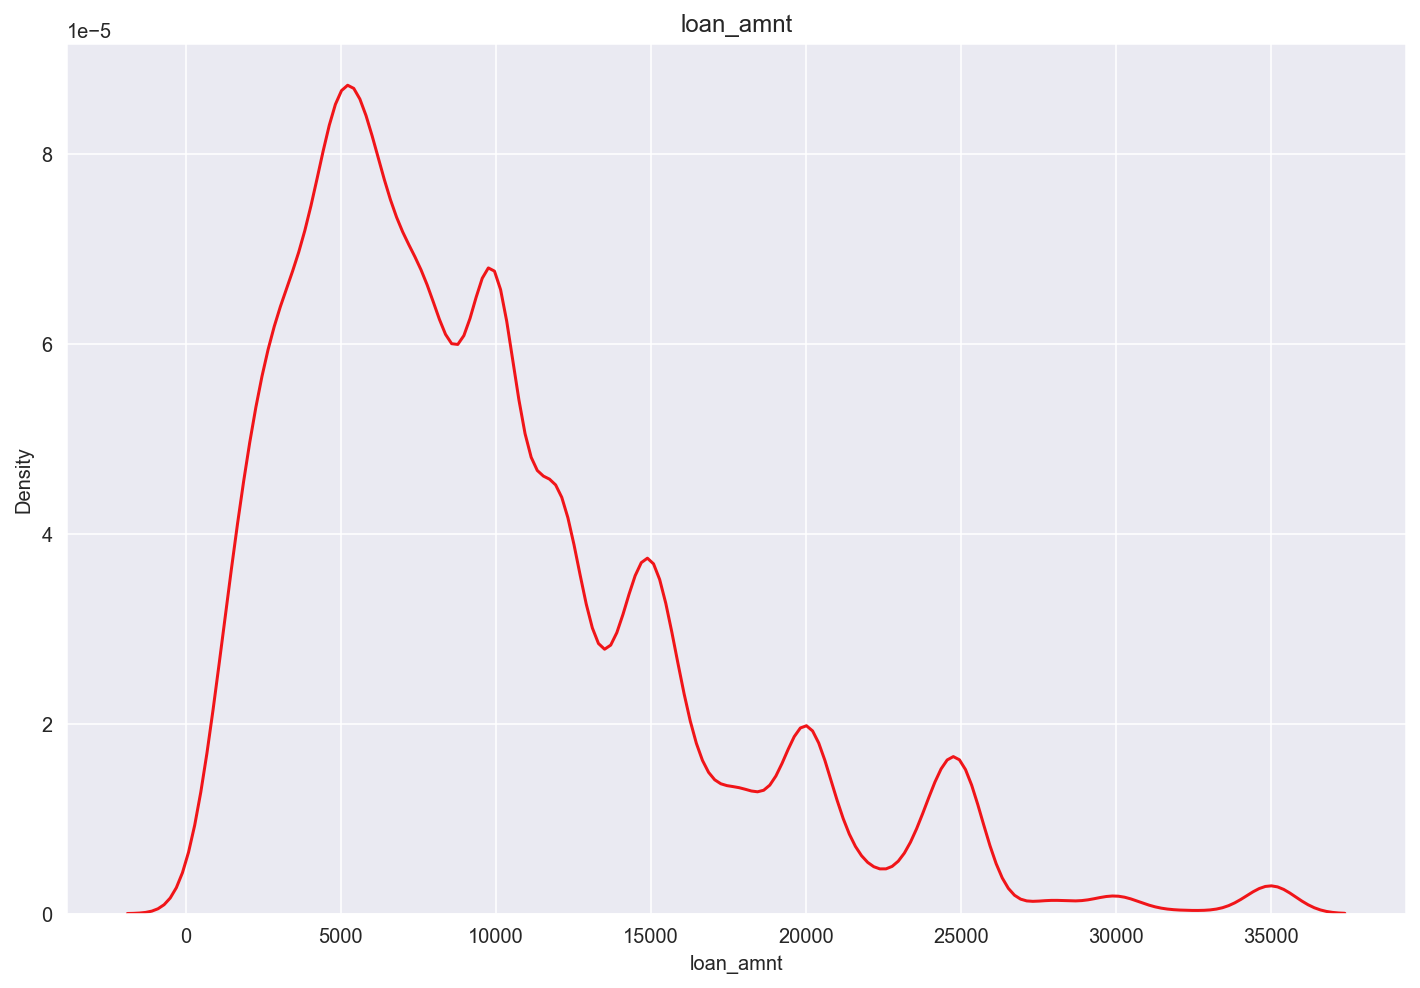

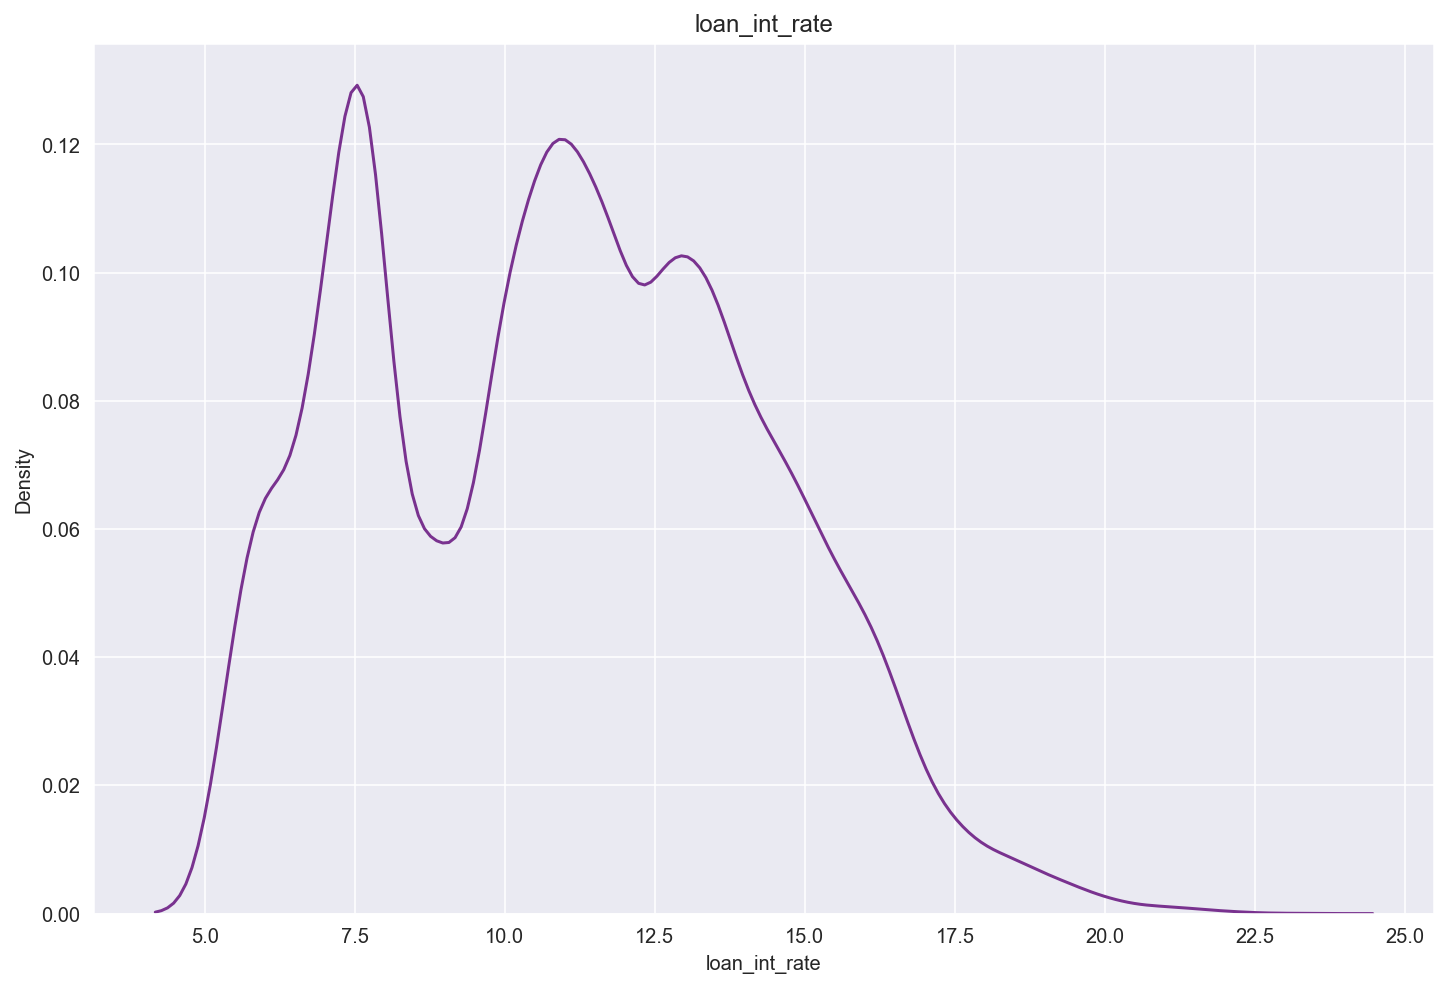

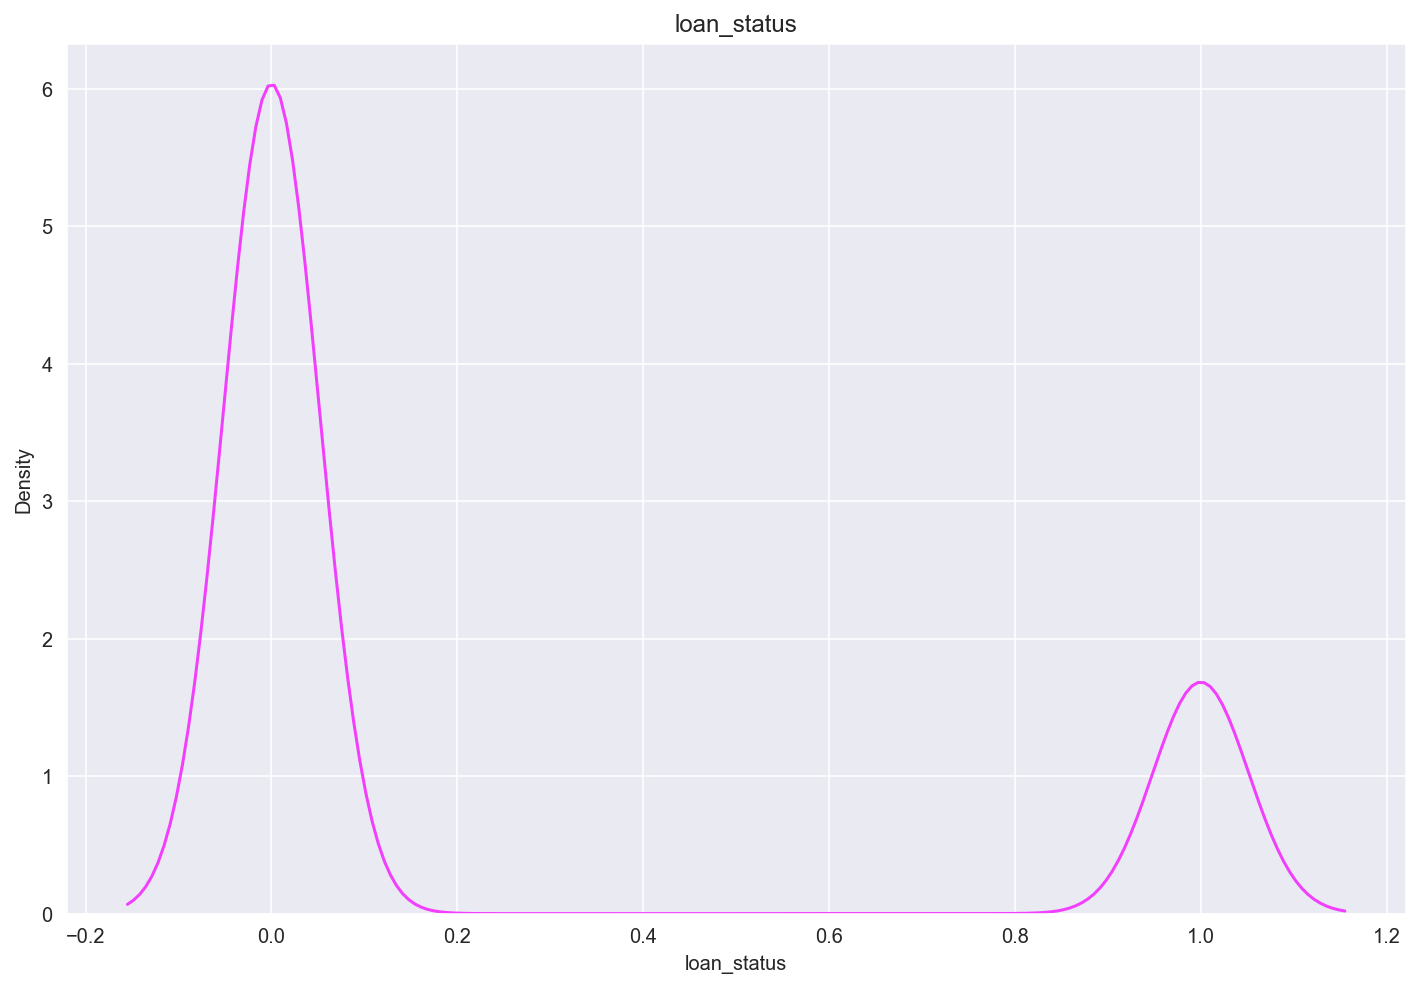

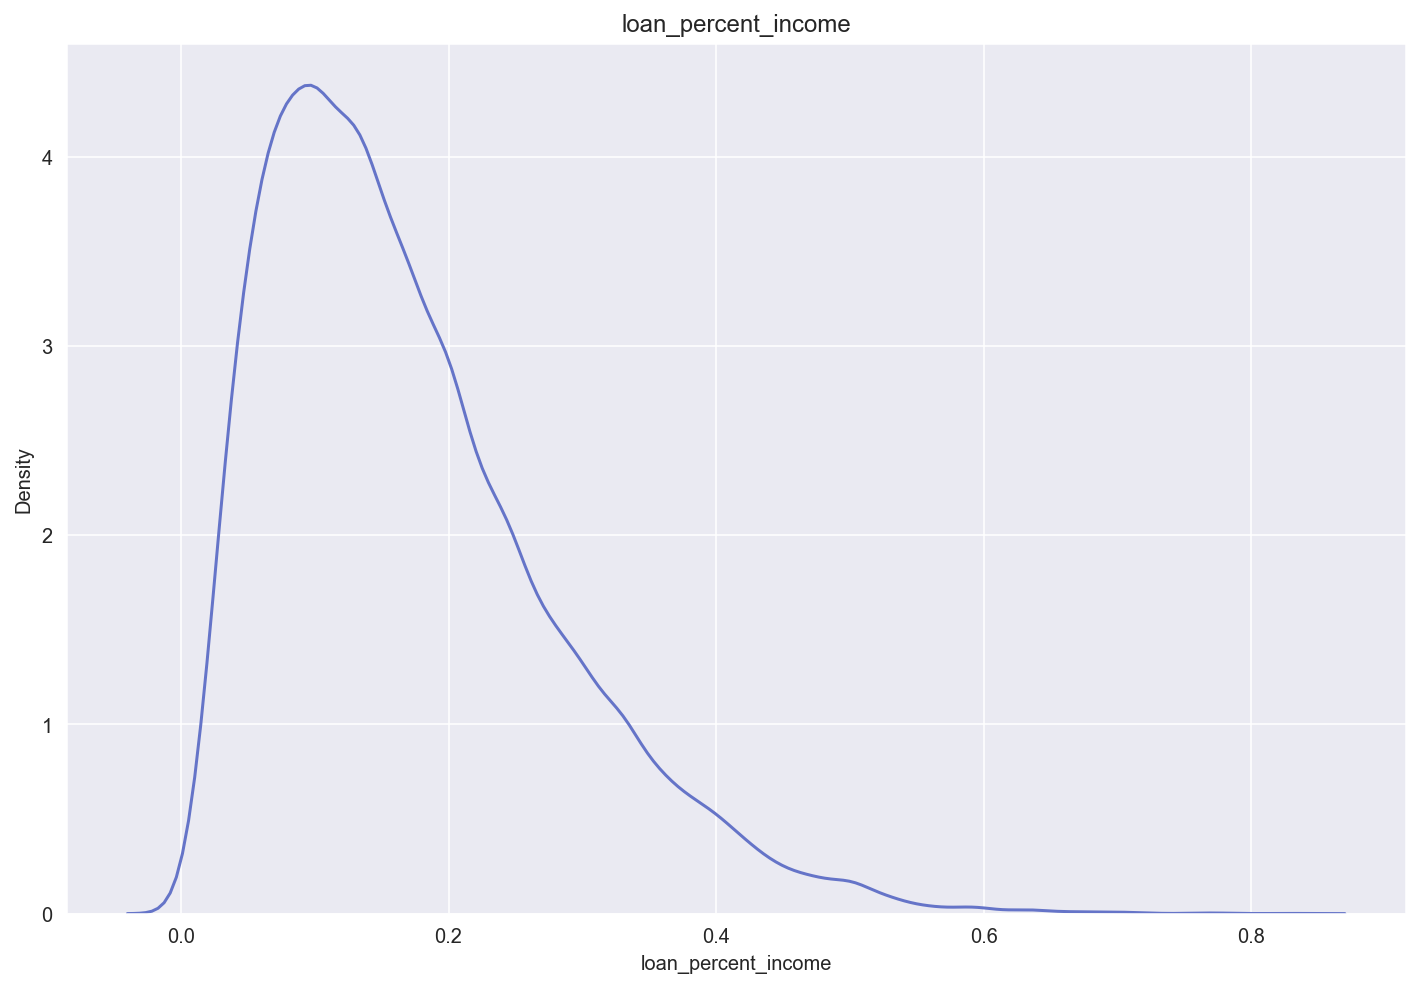

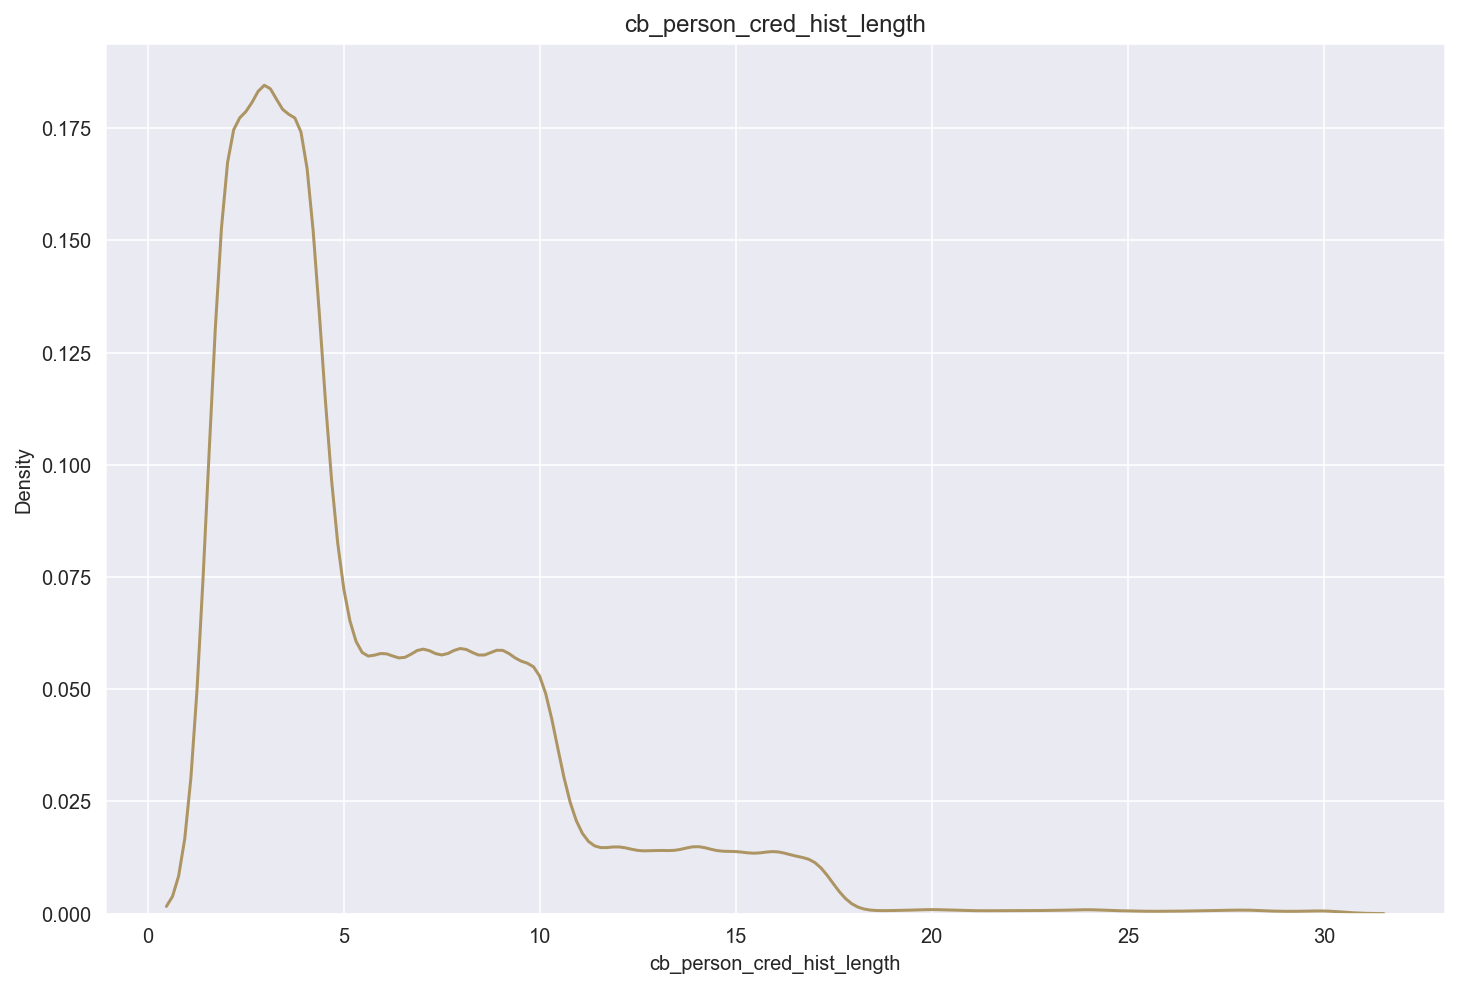

In [19]:
for i in df_num:
    plt.figure(figsize=(12,8))
    sns.kdeplot(df[i], color = rand_color()).set(title = i)

In [17]:
# Skewness of Numerical Variables

# df['person_age'].skew()                     
# df['person_income'].skew()              
# df['person_emp_length'].skew()          
# df['loan_amnt'].skew()                  
# df['loan_int_rate'].skew()              
# df['loan_status'].skew()                
# df['loan_percent_income'].skew()        
# df['cb_person_cred_hist_length'].skew()

df_num.skew()

person_age                     2.581393
person_income                 32.865349
person_emp_length              2.614455
loan_amnt                      1.192477
loan_int_rate                  0.208550
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64

In [18]:
# Kurtosis of Numerical Variables

df_num.kurtosis()

person_age                      18.560825
person_income                 2693.272776
person_emp_length               43.722338
loan_amnt                        1.423565
loan_int_rate                   -0.671609
loan_status                     -0.137088
loan_percent_income              1.223687
cb_person_cred_hist_length       3.716194
dtype: float64

### Variance/ Standard Deviation

- 1. df.var()
- 2. from sklearn.feature import Variance Threshold

In [87]:
df.var()

person_age                    4.029810e+01
person_income                 3.841907e+09
person_emp_length             1.716138e+01
loan_amnt                     3.996878e+07
loan_int_rate                 1.050058e+01
loan_status                   1.705737e-01
loan_percent_income           1.140234e-02
cb_person_cred_hist_length    1.644303e+01
dtype: float64

In [88]:
df.std()

person_age                        6.348078
person_income                 61983.119168
person_emp_length                 4.142630
loan_amnt                      6322.086646
loan_int_rate                     3.240459
loan_status                       0.413006
loan_percent_income               0.106782
cb_person_cred_hist_length        4.055001
dtype: float64

- It is a part of feature selection to drop those featuress who have zero-variance or near zero-variance as these features 
 will give no information.
- In this section,variables with zero and near-zero variance are being identified using scikit learn Libraray.

- 1. Feature Selection Method : Varaiance Threshold to remove the constant features
- 2. Feature SElection Method: Varaiance Threshold to remove the Quasi-constant features

# Constant Features

In [87]:
# # 1. Feature Selection Method : Varaiance Threshold to remove the constant features

# Those features which contain constant values (only one value for all the outputs or target values) in the dataset.
# Those features provide no information that allows ML Models to predict the target.
# threshold=0

# Let's apply ThresholdVariance

from sklearn.feature_selection import VarianceThreshold

In [88]:
constant_selector=VarianceThreshold(threshold=0)
constant_selector.fit(df_num)

VarianceThreshold(threshold=0)

In [89]:
# # True means non-constant features
# False means constant features
# There are total 8 numerical features. Out of which none is constant feature.


constant_selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [90]:
# Sum of non-constant features

sum(constant_selector.get_support())

8

In [91]:
# Now, Let's find constant features which is none (from above)

constant_columns=[column for column in df_num.columns
                 if column not in df_num.columns[constant_selector.get_support()]]
print(len(constant_columns))


# Note: As was predicted, there are no constant features

0


In [92]:
# List of Constant features

for column in constant_columns:
    print(column)

In [ ]:
# Dropping of Constant features, which is beyond the scope of this EDA
# df_num.drop(constant_columns,axis=1,inplace =True)

# Quasi-Constant Features

In [93]:
#2. Feature Selection Method: Variance Threshold to remove the Quasi-Constantn Features.

quasi_constant_selector=VarianceThreshold(threshold=0.01)
quasi_constant_selector.fit(df_num)

VarianceThreshold(threshold=0.01)

In [94]:
# Get features which have the variance greater than the set threshold value=0.01

quasi_constant_selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [95]:
# sum of non-quasi constant feature


sum(quasi_constant_selector.get_support())

8

In [96]:
# Now, Let's find constant features which is none (from above)

quasi_constant_columns=[column for column in df_num.columns
                 if column not in df_num.columns[quasi_constant_selector.get_support()]]
print(len(quasi_constant_columns))


# Note: As was predicted, there are no constant features

0


In [97]:
# List of Quasi Constant features

for column in quasi_constant_columns:
    print(column)

In [ ]:
# Dropping of Quasi Constant features, which is beyond the scope of this EDA
# df_num.drop(quasi_constant_columns,axis=1,inplace =True)

# Bi-Variate & Multi-Variate Analysis

### Bi-Variate

- 1. Categorical-Categorical
- 2. Numerical-Numerical
- 3. Numerical-Categorical

### Multi-Variate

- 1. Numerical-Categorical-Categorical
- 2. Numerical-Categorical-Numerical

# Bi-Variate-(Categorical-Categorical)

- 1. Target-person_home_ownership
- 2. Target-loan_intent
- 3. Target-loan_grade
- 4. Target-cb_person_default_on_fil
- 5. pd.crosstabe()----> working with 
- 6. Heatmap of cross-tab

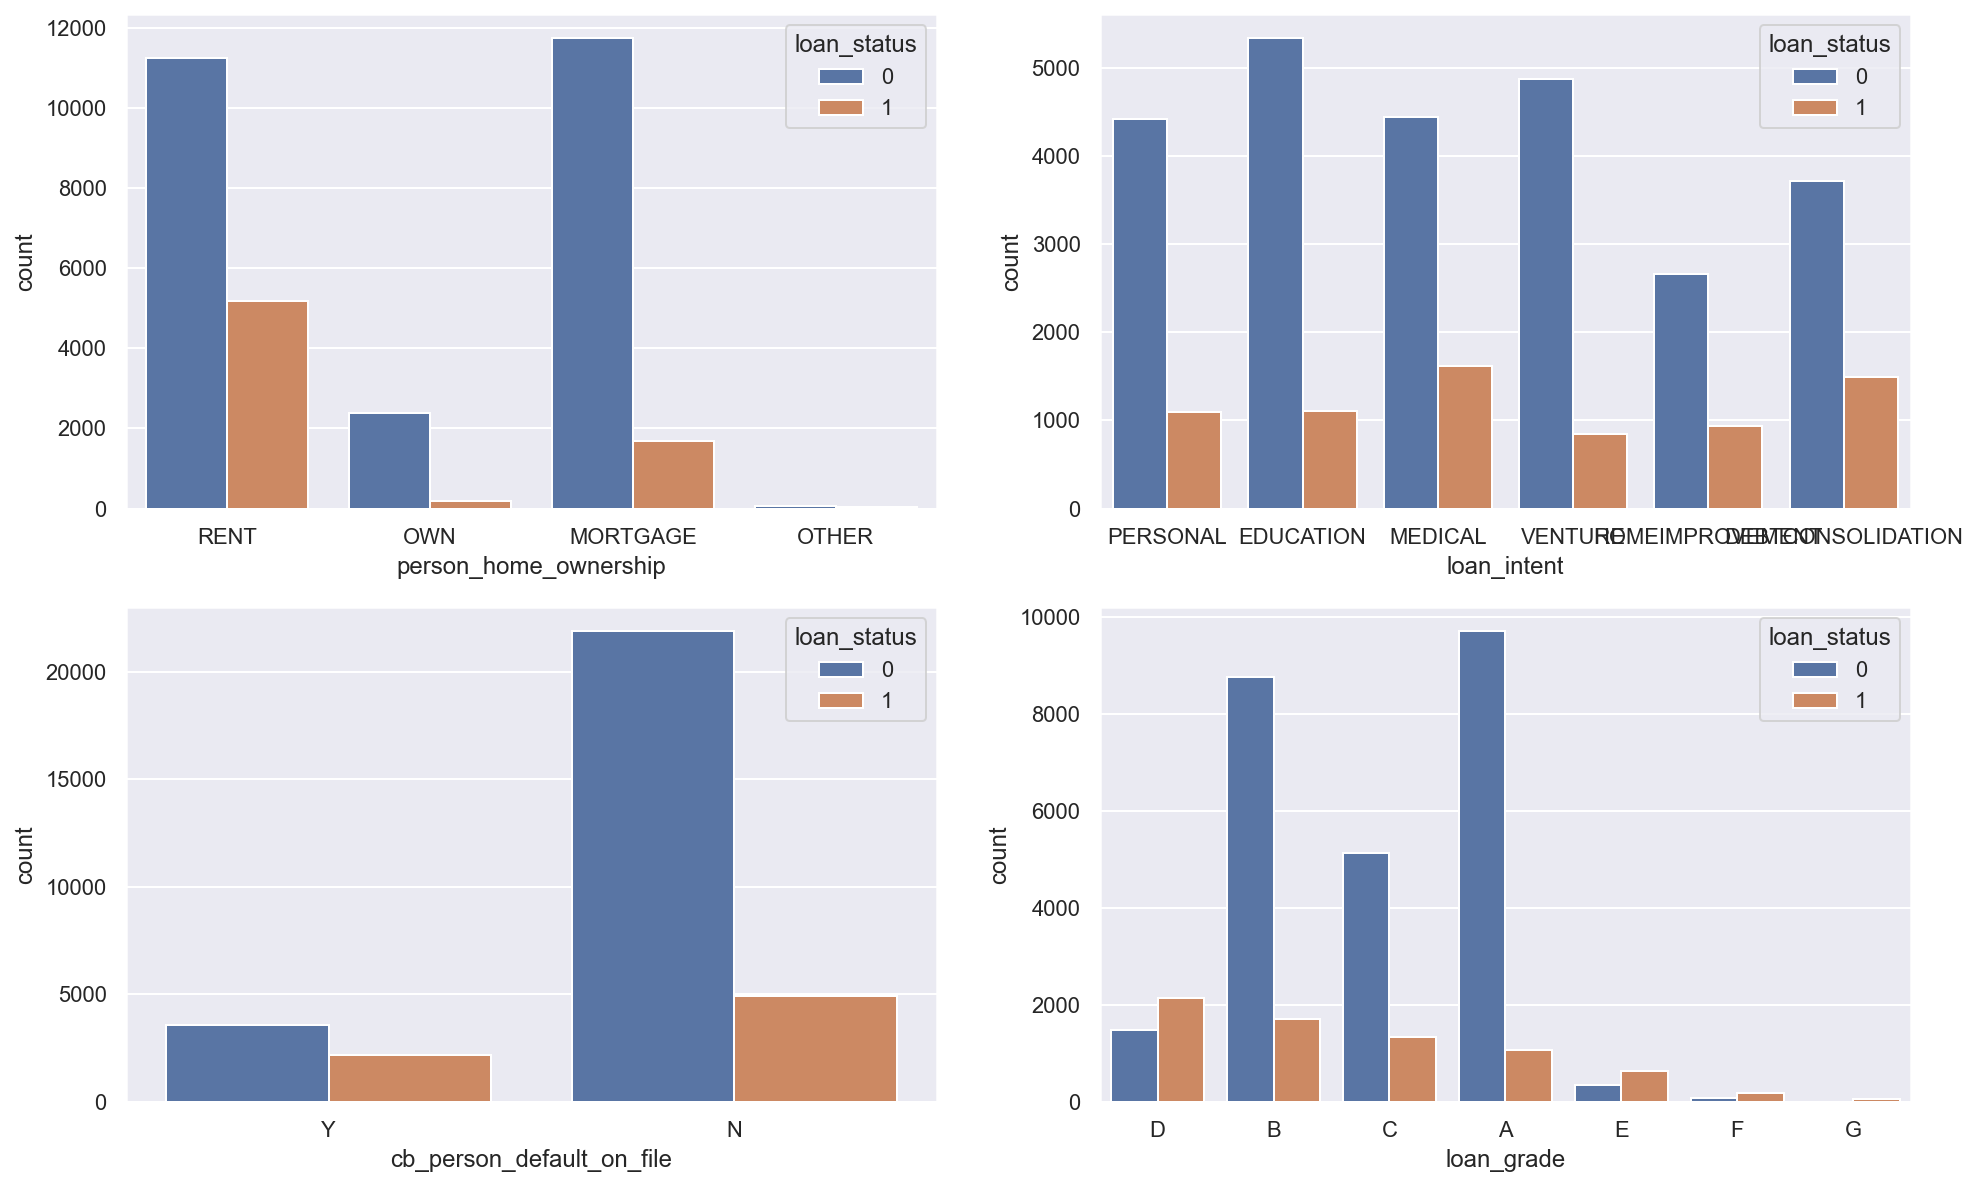

In [83]:
# Bi-Variate Analysis of Categorical Variables vis-a-vis Target Variable

fig,axes=plt.subplots(2,2,figsize=(16,10))
sns.countplot('person_home_ownership',hue='loan_status',data=df,ax=axes[0,0])
sns.countplot('loan_intent',hue='loan_status',data=df,ax=axes[0,1])
sns.countplot('loan_grade',hue='loan_status',data=df,ax=axes[1,1])
sns.countplot('cb_person_default_on_file',hue='loan_status',data=df,ax=axes[1,0]);

In [ ]:
fig,ax1=plt.subplots(figsize=(20,10))
graph=sns.countplot(ax=ax1,x='person_home_ownership',hue='loan_status',data=df,palette='rainbow')
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height=p.get_height()
    graph.text(p.get_x()+p.get_width()/2.,height+0.1,height,ha='center')


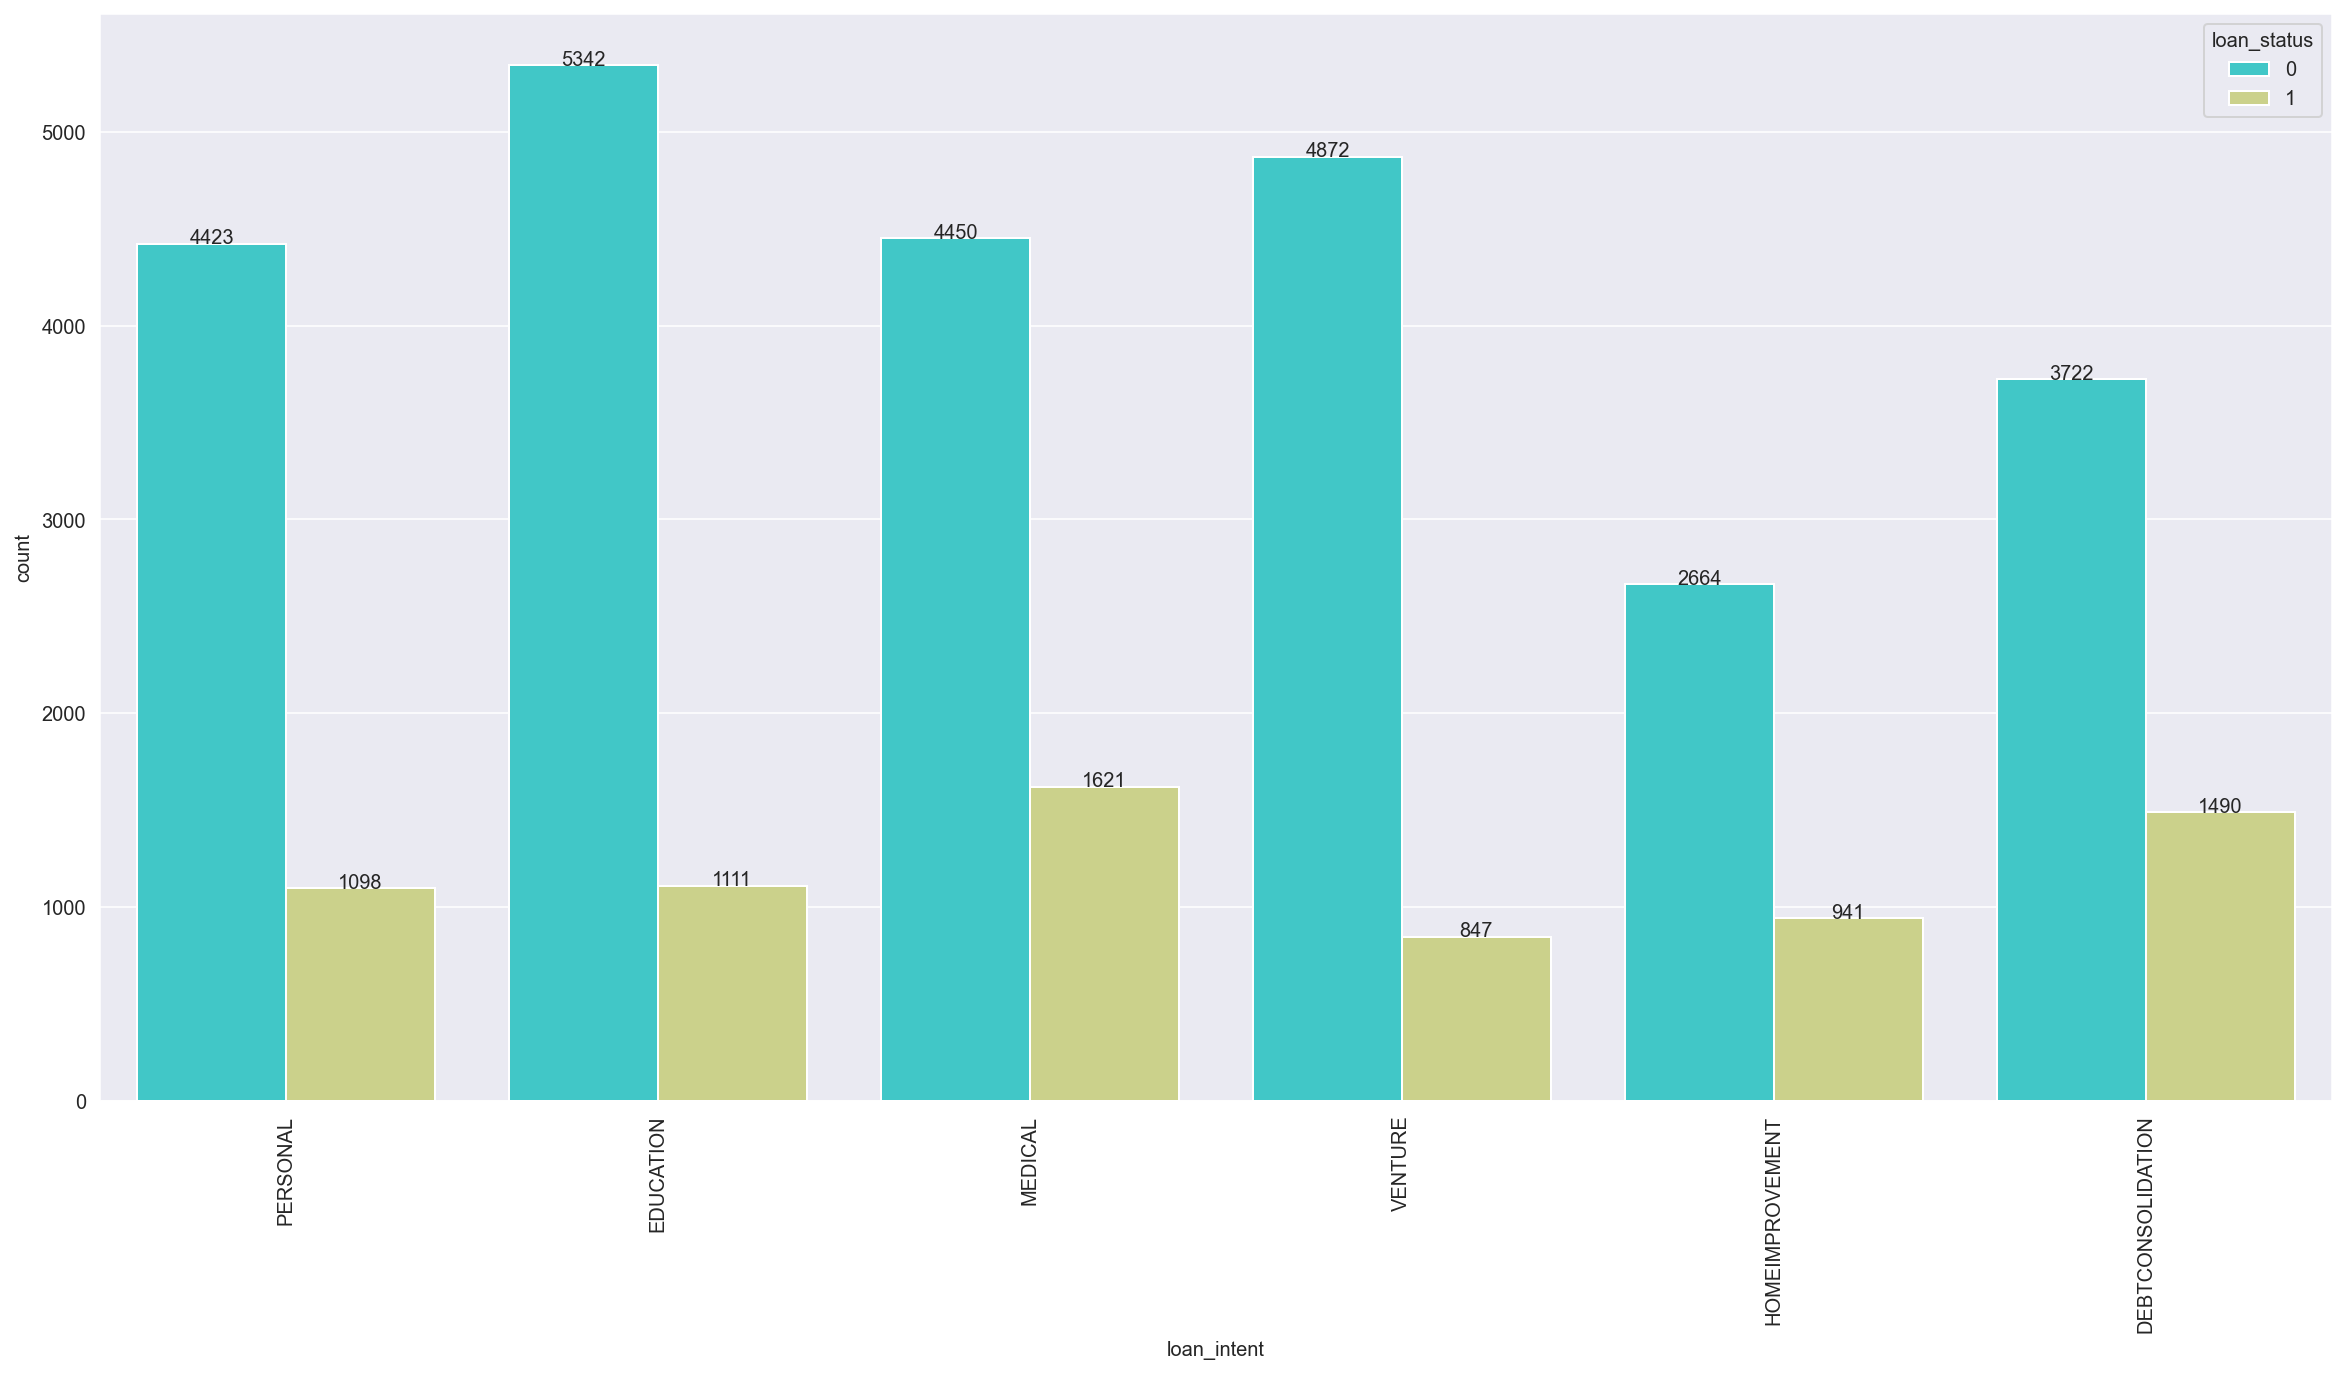

In [107]:
fig,ax1=plt.subplots(figsize=(20,10))
graph=sns.countplot(ax=ax1,x='loan_intent',hue='loan_status',data=df,palette='rainbow')
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height=p.get_height()
    graph.text(p.get_x()+p.get_width()/2.,height+0.1,height,ha='center')


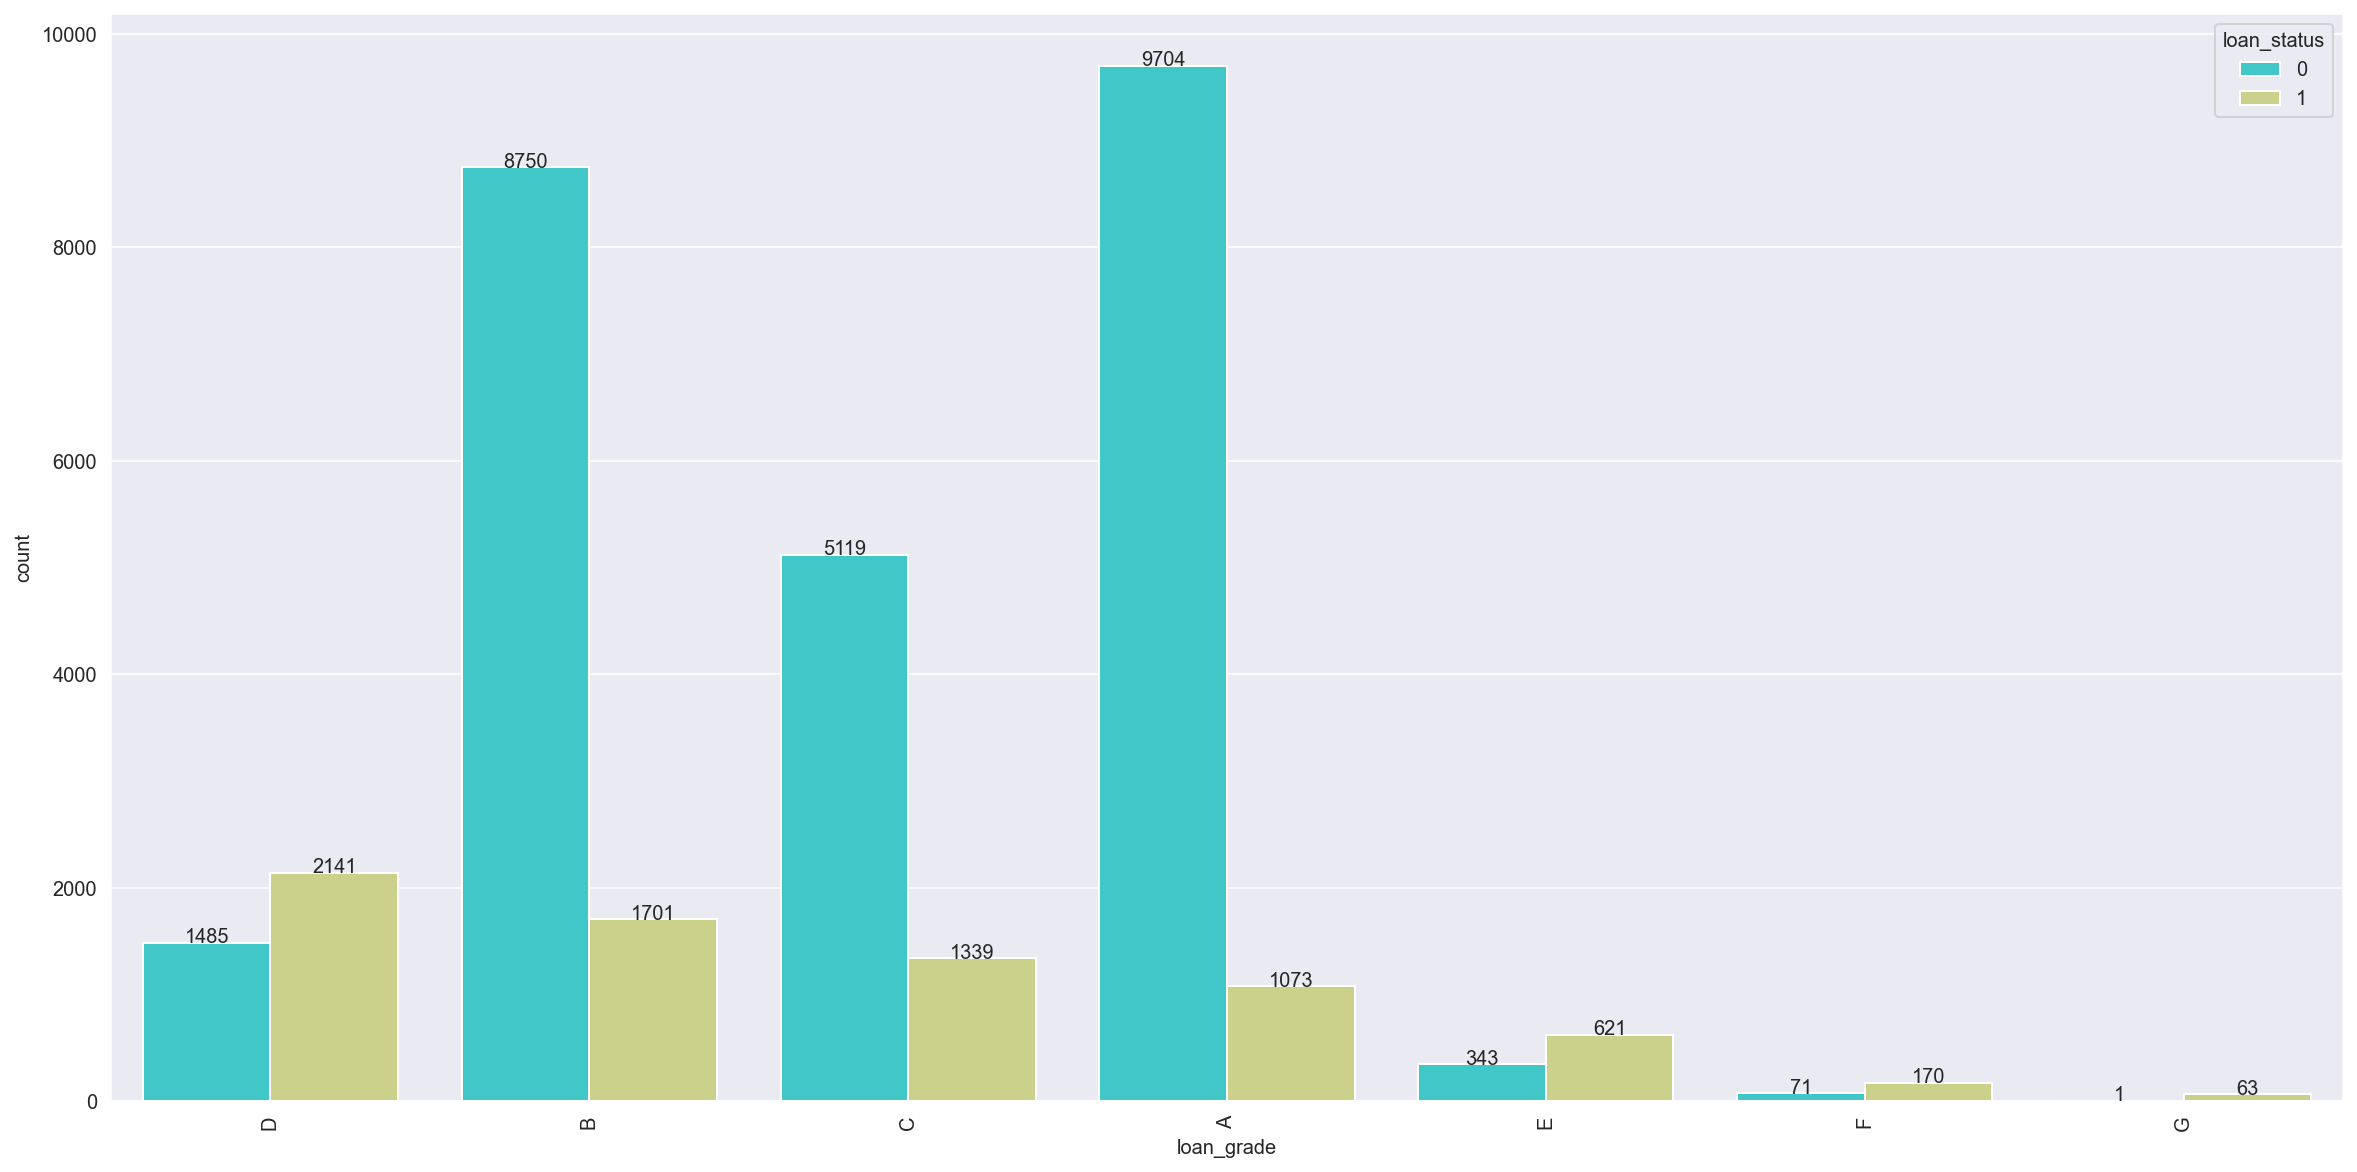

In [104]:
fig,ax1=plt.subplots(figsize=(20,10))
graph=sns.countplot(ax=ax1,x='loan_grade',hue='loan_status',data=df,palette='rainbow')
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height=p.get_height()
    graph.text(p.get_x()+p.get_width()/2.,height+0.1,height,ha='center')


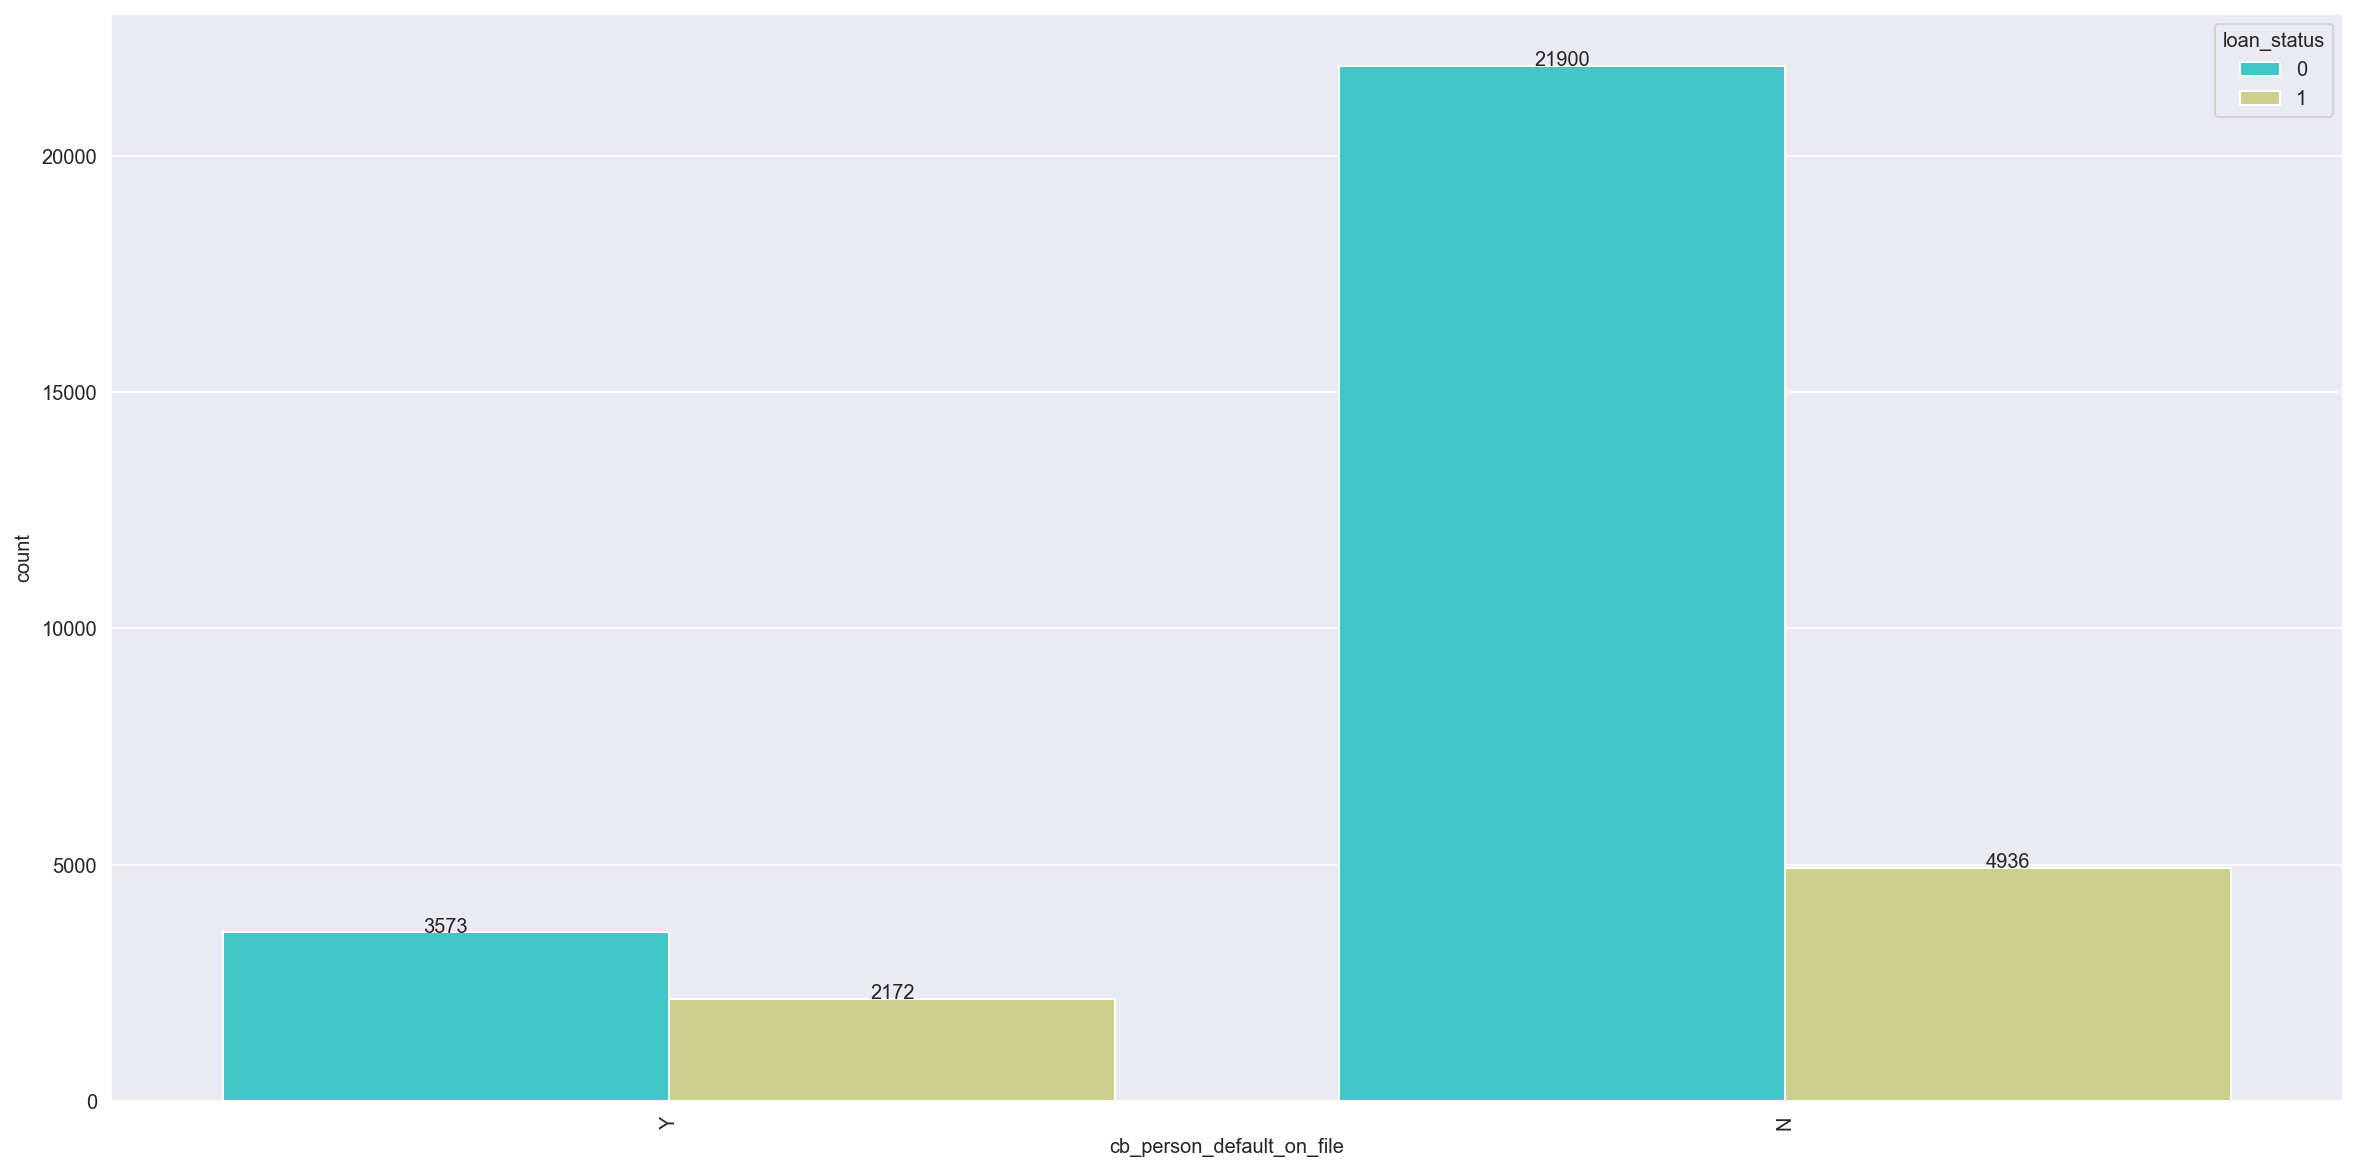

In [105]:
fig,ax1=plt.subplots(figsize=(20,10))
graph=sns.countplot(ax=ax1,x='cb_person_default_on_file',hue='loan_status',data=df,palette='rainbow')
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height=p.get_height()
    graph.text(p.get_x()+p.get_width()/2.,height+0.1,height,ha='center')


In [108]:
df_cat

person_home_ownership      loan_intent loan_grade  \
0                      RENT         PERSONAL          D   
1                       OWN        EDUCATION          B   
2                  MORTGAGE          MEDICAL          C   
3                      RENT          MEDICAL          C   
4                      RENT          MEDICAL          C   
...                     ...              ...        ...   
32576              MORTGAGE         PERSONAL          C   
32577              MORTGAGE         PERSONAL          A   
32578                  RENT  HOMEIMPROVEMENT          B   
32579              MORTGAGE         PERSONAL          B   
32580                  RENT          MEDICAL          B   

      cb_person_default_on_file  
0                             Y  
1                             N  
2                             N  
3                             N  
4                             Y  
...                         ...  
32576                         N  
32577                         N  
32578                         N  
32579                         N  
32580                         N  

[32581 rows x 4 columns]

In [40]:
# Cross Tabulation in a simple frequency form

pd.crosstab(df['loan_intent'], df['loan_grade'],margins=True,margins_name='Total')

<IPython.core.display.Javascript object>

loan_grade             A      B     C     D    E    F   G  Total
loan_intent                                                     
DEBTCONSOLIDATION   1753   1620  1042   600  144   43  10   5212
EDUCATION           2174   2026  1356   657  185   46   9   6453
HOMEIMPROVEMENT     1126   1115   693   487  143   32   9   3605
MEDICAL             1959   2006  1217   658  167   52  12   6071
PERSONAL            1832   1813  1046   643  147   30  10   5521
VENTURE             1933   1871  1104   581  178   38  14   5719
Total              10777  10451  6458  3626  964  241  64  32581

In [35]:
pd.crosstab(df['loan_intent'], df['loan_grade']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

<IPython.core.display.Javascript object>

loan_grade            A     B     C     D    E    F    G
loan_intent                                             
DEBTCONSOLIDATION  33.6  31.1  20.0  11.5  2.8  0.8  0.2
EDUCATION          33.7  31.4  21.0  10.2  2.9  0.7  0.1
HOMEIMPROVEMENT    31.2  30.9  19.2  13.5  4.0  0.9  0.2
MEDICAL            32.3  33.0  20.0  10.8  2.8  0.9  0.2
PERSONAL           33.2  32.8  18.9  11.6  2.7  0.5  0.2
VENTURE            33.8  32.7  19.3  10.2  3.1  0.7  0.2

In [46]:
# Same as above

# Cross Tabulation in an absolute form

cross_index=pd.crosstab(index=df_cat['loan_intent'],columns=df_cat['loan_grade'],normalize='index').round(4)*100
cross_index

<IPython.core.display.Javascript object>

loan_grade             A      B      C      D     E     F     G
loan_intent                                                    
DEBTCONSOLIDATION  33.63  31.08  19.99  11.51  2.76  0.83  0.19
EDUCATION          33.69  31.40  21.01  10.18  2.87  0.71  0.14
HOMEIMPROVEMENT    31.23  30.93  19.22  13.51  3.97  0.89  0.25
MEDICAL            32.27  33.04  20.05  10.84  2.75  0.86  0.20
PERSONAL           33.18  32.84  18.95  11.65  2.66  0.54  0.18
VENTURE            33.80  32.72  19.30  10.16  3.11  0.66  0.24

In [10]:
# Cross Tabulation in an Relative form- percentage of all data points of df

cross_df=pd.crosstab(index=df_cat['loan_intent'],columns=df_cat['loan_grade'],
                       margins=True,margins_name='Total',normalize=True).round(4)*100
cross_df

<IPython.core.display.Javascript object>

loan_grade             A      B      C      D     E     F     G   Total
loan_intent                                                            
DEBTCONSOLIDATION   5.38   4.97   3.20   1.84  0.44  0.13  0.03   16.00
EDUCATION           6.67   6.22   4.16   2.02  0.57  0.14  0.03   19.81
HOMEIMPROVEMENT     3.46   3.42   2.13   1.49  0.44  0.10  0.03   11.06
MEDICAL             6.01   6.16   3.74   2.02  0.51  0.16  0.04   18.63
PERSONAL            5.62   5.56   3.21   1.97  0.45  0.09  0.03   16.95
VENTURE             5.93   5.74   3.39   1.78  0.55  0.12  0.04   17.55
Total              33.08  32.08  19.82  11.13  2.96  0.74  0.20  100.00

In [11]:
cross_col=pd.crosstab(index=df_cat['loan_intent'],columns=df_num['loan_status'],
                        normalize='index').round(4)*100
cross_col

<IPython.core.display.Javascript object>

loan_status            0      1
loan_intent                    
DEBTCONSOLIDATION  71.41  28.59
EDUCATION          82.78  17.22
HOMEIMPROVEMENT    73.90  26.10
MEDICAL            73.30  26.70
PERSONAL           80.11  19.89
VENTURE            85.19  14.81

In [134]:
# Same as above

categories=list(df['loan_intent'].unique())
for category in categories:
    means=round(df[df['loan_intent']==category]['loan_status'].mean()*100,0)
    print(category,'--->',means)

PERSONAL ---> 20.0
EDUCATION ---> 17.0
MEDICAL ---> 27.0
VENTURE ---> 15.0
HOMEIMPROVEMENT ---> 26.0
DEBTCONSOLIDATION ---> 29.0


In [137]:
# Same as above

df.groupby(['loan_intent'])['loan_status'].mean()*100

loan_intent
DEBTCONSOLIDATION    28.587874
EDUCATION            17.216798
HOMEIMPROVEMENT      26.102635
MEDICAL              26.700708
PERSONAL             19.887702
VENTURE              14.810282
Name: loan_status, dtype: float64

In [12]:
cross_grade=pd.crosstab(index=df_cat['loan_grade'],columns=df_num['loan_status'],
                        normalize='index').round(4)*100
cross_grade

<IPython.core.display.Javascript object>

loan_status      0      1
loan_grade               
A            90.04   9.96
B            83.72  16.28
C            79.27  20.73
D            40.95  59.05
E            35.58  64.42
F            29.46  70.54
G             1.56  98.44

In [13]:
# Bi-Variate Analysis Default History vis-a-vis

pd.crosstab(index=df_cat['cb_person_default_on_file'],columns=df_num['loan_status'],
                        normalize='index').round(4)*100

<IPython.core.display.Javascript object>

loan_status                    0      1
cb_person_default_on_file              
N                          81.61  18.39
Y                          62.19  37.81

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

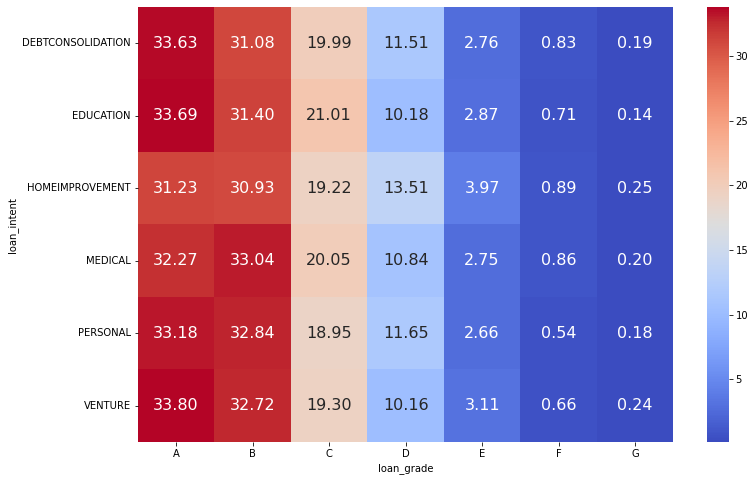

In [14]:
# Heatmap of Cross-Tabulation

plt.figure(figsize=(12,8))
sns.heatmap(cross_index,cmap='coolwarm',annot=True,annot_kws={'size':16},fmt='0.2f');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

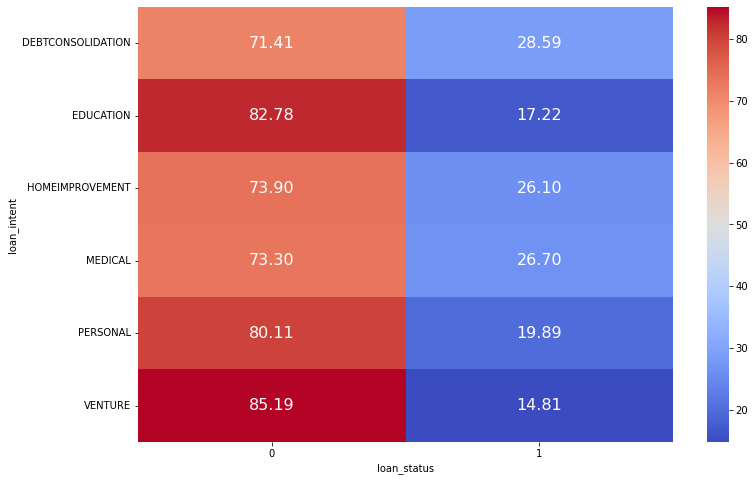

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(cross_col,cmap='coolwarm',annot=True,annot_kws={'size':16},fmt='0.2f');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

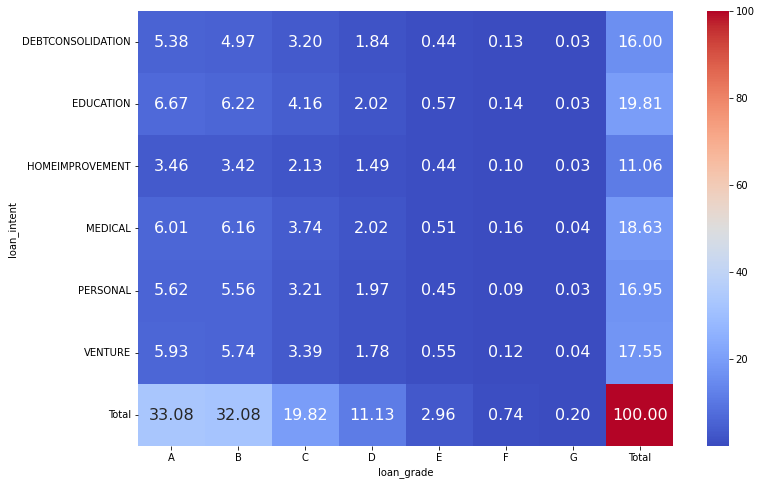

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(cross_df,cmap='coolwarm',annot=True,annot_kws={'size':16},fmt='0.2f');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

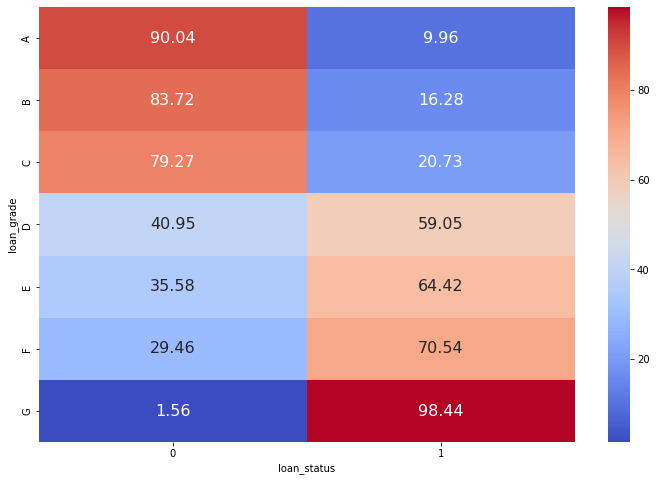

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(cross_grade,cmap='coolwarm',annot=True,annot_kws={'size':16},fmt='0.2f');

# Bi- Variate- (Numerical-Numerical)

- 1. Correlation Matrix
- 2. Correlation heatmap
- 3. Scatter Plot

In [102]:
# Correlation Matrix

corr_matrix=df.corr(method='pearson')    # Other Methods: 'pearson', 'spearman', 'kendall'
corr_matrix
# corr_matrix.style.background_gradient(cmap='Greens')



# DataFrame.corrwith : compute pairwise correlation with another DataFrame or Series.

person_age  person_income  person_emp_length  \
person_age                    1.000000       0.173202           0.163106   
person_income                 0.173202       1.000000           0.134268   
person_emp_length             0.163106       0.134268           1.000000   
loan_amnt                     0.050787       0.266820           0.113082   
loan_int_rate                 0.012580       0.000792          -0.056405   
loan_status                  -0.021629      -0.144449          -0.082489   
loan_percent_income          -0.042411      -0.254471          -0.054111   
cb_person_cred_hist_length    0.859133       0.117987           0.144699   

                            loan_amnt  loan_int_rate  loan_status  \
person_age                   0.050787       0.012580    -0.021629   
person_income                0.266820       0.000792    -0.144449   
person_emp_length            0.113082      -0.056405    -0.082489   
loan_amnt                    1.000000       0.146813     0.105376   
loan_int_rate                0.146813       1.000000     0.335133   
loan_status                  0.105376       0.335133     1.000000   
loan_percent_income          0.572612       0.120314     0.379366   
cb_person_cred_hist_length   0.041967       0.016696    -0.015529   

                            loan_percent_income  cb_person_cred_hist_length  
person_age                            -0.042411                    0.859133  
person_income                         -0.254471                    0.117987  
person_emp_length                     -0.054111                    0.144699  
loan_amnt                              0.572612                    0.041967  
loan_int_rate                          0.120314                    0.016696  
loan_status                            0.379366                   -0.015529  
loan_percent_income                    1.000000                   -0.031690  
cb_person_cred_hist_length            -0.031690                    1.000000

In [81]:
# DataFrame.corrwith : Compute pairwise correlation with target and other predictor variables


df.corrwith(df['loan_status'])

C:\Users\AWAIS\AppData\Local\Temp\ipykernel_1196\3923916182.py:4: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['loan_status'])


person_age                   -0.021629
person_income                -0.144449
person_emp_length            -0.082489
loan_amnt                     0.105376
loan_int_rate                 0.335133
loan_status                   1.000000
loan_percent_income           0.379366
cb_person_cred_hist_length   -0.015529
dtype: float64

### Highly Correlated Features`

In [2]:
# with the following function we can select highly correlated features.
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:    # we are interested in abs coeff value
                colname=corr_matrix.columns[i]          # getting the name of column
                col_corr.add(colname)
    return col_corr
                

In [5]:
# correlation - filtering out highly correlated features based on threshold limit

corr_features=correlation(df,0.7)
len(set(corr_features))

C:\Users\AWAIS\AppData\Local\Temp\ipykernel_8748\2880628266.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=dataset.corr()


1

In [90]:
corr_features

{'cb_person_cred_hist_length'}

In [ ]:
# dropping highly correlated variables
# df.drop(corr_features.axis=1)          # not dropping here since it is only EDA , it is the part of preprocessing and data cleaning

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

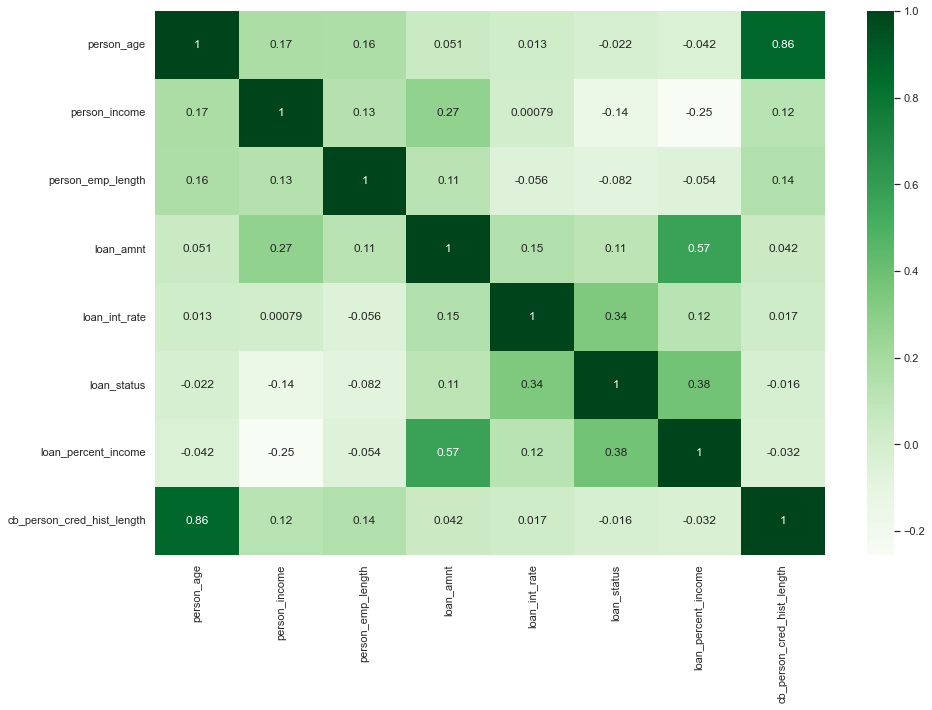

In [94]:
# correlation heatmap

plt.figure(figsize=(15,10))
cor=df.corr()
sns.heatmap(cor, annot=True, cmap='Greens');   

# Note:'
# 1. Since no of features are not very large, heatmap is readable. However, in case where feature are too many
# then sort the feature according to importance and then create heatmap by utilizing the function nlargest()'

# Bi-Variate- (Numerical-Categorical)

In [110]:
df_num.columns.tolist()

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [29]:
# Extracting the top 10 ratios  

df_num['loan_percent_income'][:10]              # top 10 in terms of frequences

0    0.59
1    0.10
2    0.57
3    0.53
4    0.55
5    0.25
6    0.45
7    0.44
8    0.42
9    0.16
Name: loan_percent_income, dtype: float64

In [30]:
df_num['loan_percent_income'].nlargest(10)      # top 10 in terms of values

640      0.83
23727    0.78
571      0.77
577      0.77
18203    0.76
460      0.72
2452     0.71
10007    0.71
27878    0.71
6758     0.70
Name: loan_percent_income, dtype: float64

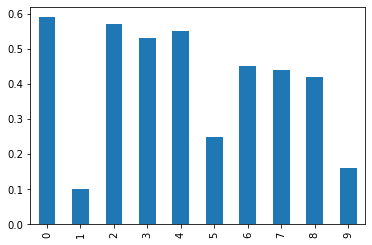

In [31]:
# Plotting the loan - to - Income ratio

df_num['loan_percent_income'][:10].plot(kind='bar');               # top 10 in terms of frequences

<AxesSubplot:>

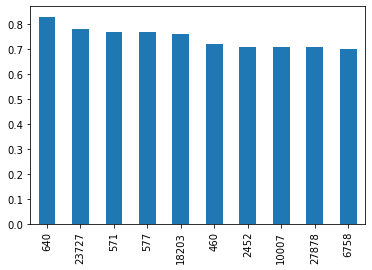

In [32]:
df_num['loan_percent_income'].nlargest(10).plot(kind='bar')      # top 10 in terms of values

In [33]:
cross_dei=pd.crosstab(index=df['loan_status'],columns=df['loan_percent_income'],normalize='columns').round(4)*100
cross_dei

<IPython.core.display.Javascript object>

loan_percent_income   0.00   0.01   0.02   0.03  0.04   0.05   0.06   0.07  \
loan_status                                                                  
0                    100.0  94.24  91.08  90.38  87.7  90.07  88.98  88.31   
1                      0.0   5.76   8.92   9.62  12.3   9.93  11.02  11.69   

loan_percent_income   0.08   0.09  ...   0.67   0.68  0.69   0.70   0.71  \
loan_status                        ...                                     
0                    85.66  87.74  ...    0.0  33.33  50.0  33.33  33.33   
1                    14.34  12.26  ...  100.0  66.67  50.0  66.67  66.67   

loan_percent_income   0.72   0.76   0.77   0.78   0.83  
loan_status                                             
0                      0.0    0.0    0.0    0.0  100.0  
1                    100.0  100.0  100.0  100.0    0.0  

[2 rows x 77 columns]

In [19]:
# Bi-Variate Analysis Loan Status vis-a-vis Length of Credit History

cross_his=pd.crosstab(index=df['cb_person_cred_hist_length'],columns=df_num['loan_status'],
                        normalize='index').round(4)*100
cross_his

<IPython.core.display.Javascript object>

loan_status                     0      1
cb_person_cred_hist_length              
2                           76.43  23.57
3                           77.72  22.28
4                           77.69  22.31
5                           79.37  20.63
6                           79.21  20.79
7                           80.06  19.94
8                           78.65  21.35
9                           79.16  20.84
10                          79.73  20.27
11                          79.91  20.09
12                          79.59  20.41
13                          80.14  19.86
14                          78.86  21.14
15                          78.26  21.74
16                          78.49  21.51
17                          80.84  19.16
18                          78.95  21.05
19                          76.19  23.81
20                          70.97  29.03
21                          70.00  30.00
22                          72.73  27.27
23                          86.36  13.64
24                          80.00  20.00
25                          72.22  27.78
26                          93.75   6.25
27                          63.64  36.36
28                          66.67  33.33
29                          57.14  42.86
30                          77.27  22.73

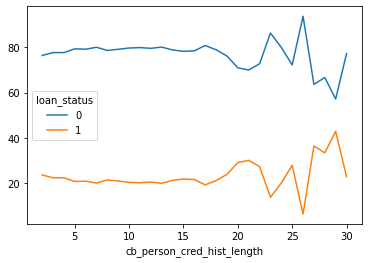

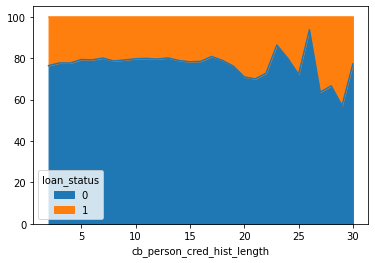

In [20]:
cross_his.plot(kind='line')
cross_his.plot(kind='area');


# observations:
# 1. For lesser no. of years of credit history, the default rate is low.
# 2. from 19 years onward, it keeps increasing with exception 23rd and 26th year.
# 3. 26th year has lowest default rate of mere 6.25%

# Missing Values

- 1. df.isnull().sum()
- 2. df.isna().sum()
- 3. df.isnull().sum().sum()
- 4. df.isnull().mean()*100
- 5. percent_missing=df.isnull().sum()*100/len(df)
- 6. percent_missing=df.isnull().sum().sort_values(ascending=False)*100/len(df)
- 7. df.isnull().sum().sort_values(ascending=False)
- 8. df.isna().sum().sort_values(ascending=False)
- 9. Missing Value Visualizatio-Bar Chart
- 10. Missing Value Visualizatio-Dendrogram

In [111]:
# Missing Values

df.isnull().sum().sort_values(ascending=False)
df.isna().sum().sort_values(ascending=False)

# Note: Both yield same output

loan_int_rate                 3116
person_emp_length              895
person_age                       0
person_income                    0
person_home_ownership            0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [112]:
# Total Missing Values in a DataFrame

df.isnull().sum().sum()

4011

In [113]:
# Column-wise Missing Values in relative form

percent_missing=(df.isnull().mean().sort_values(ascending=False)*100).round(2)
percent_missing

loan_int_rate                 9.56
person_emp_length             2.75
person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

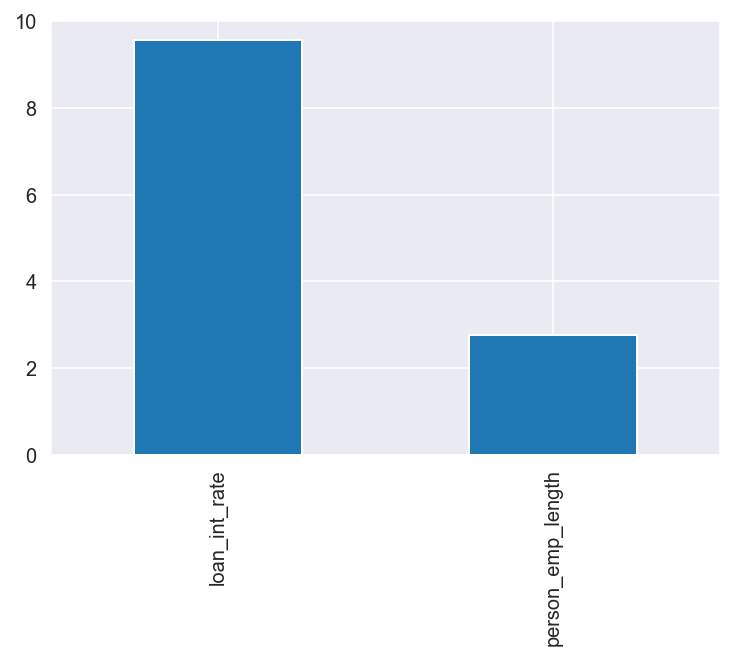

In [114]:
# Bar Chart of Missing Values Column-wise in percentage form

percent_missing[percent_missing!=0].plot(kind='bar');

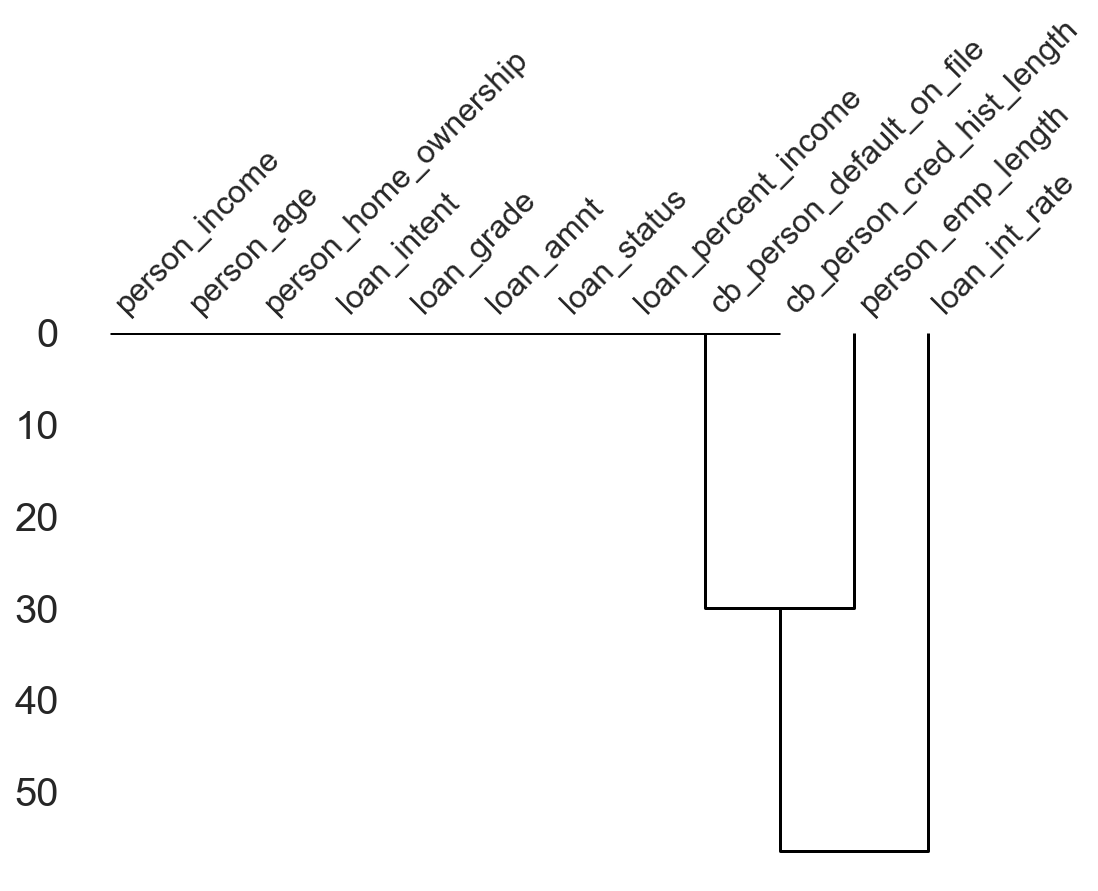

In [115]:
# Dendrogram of Missing Values

msno.dendrogram(df,figsize=(8,5));

<Figure size 72x72 with 0 Axes>

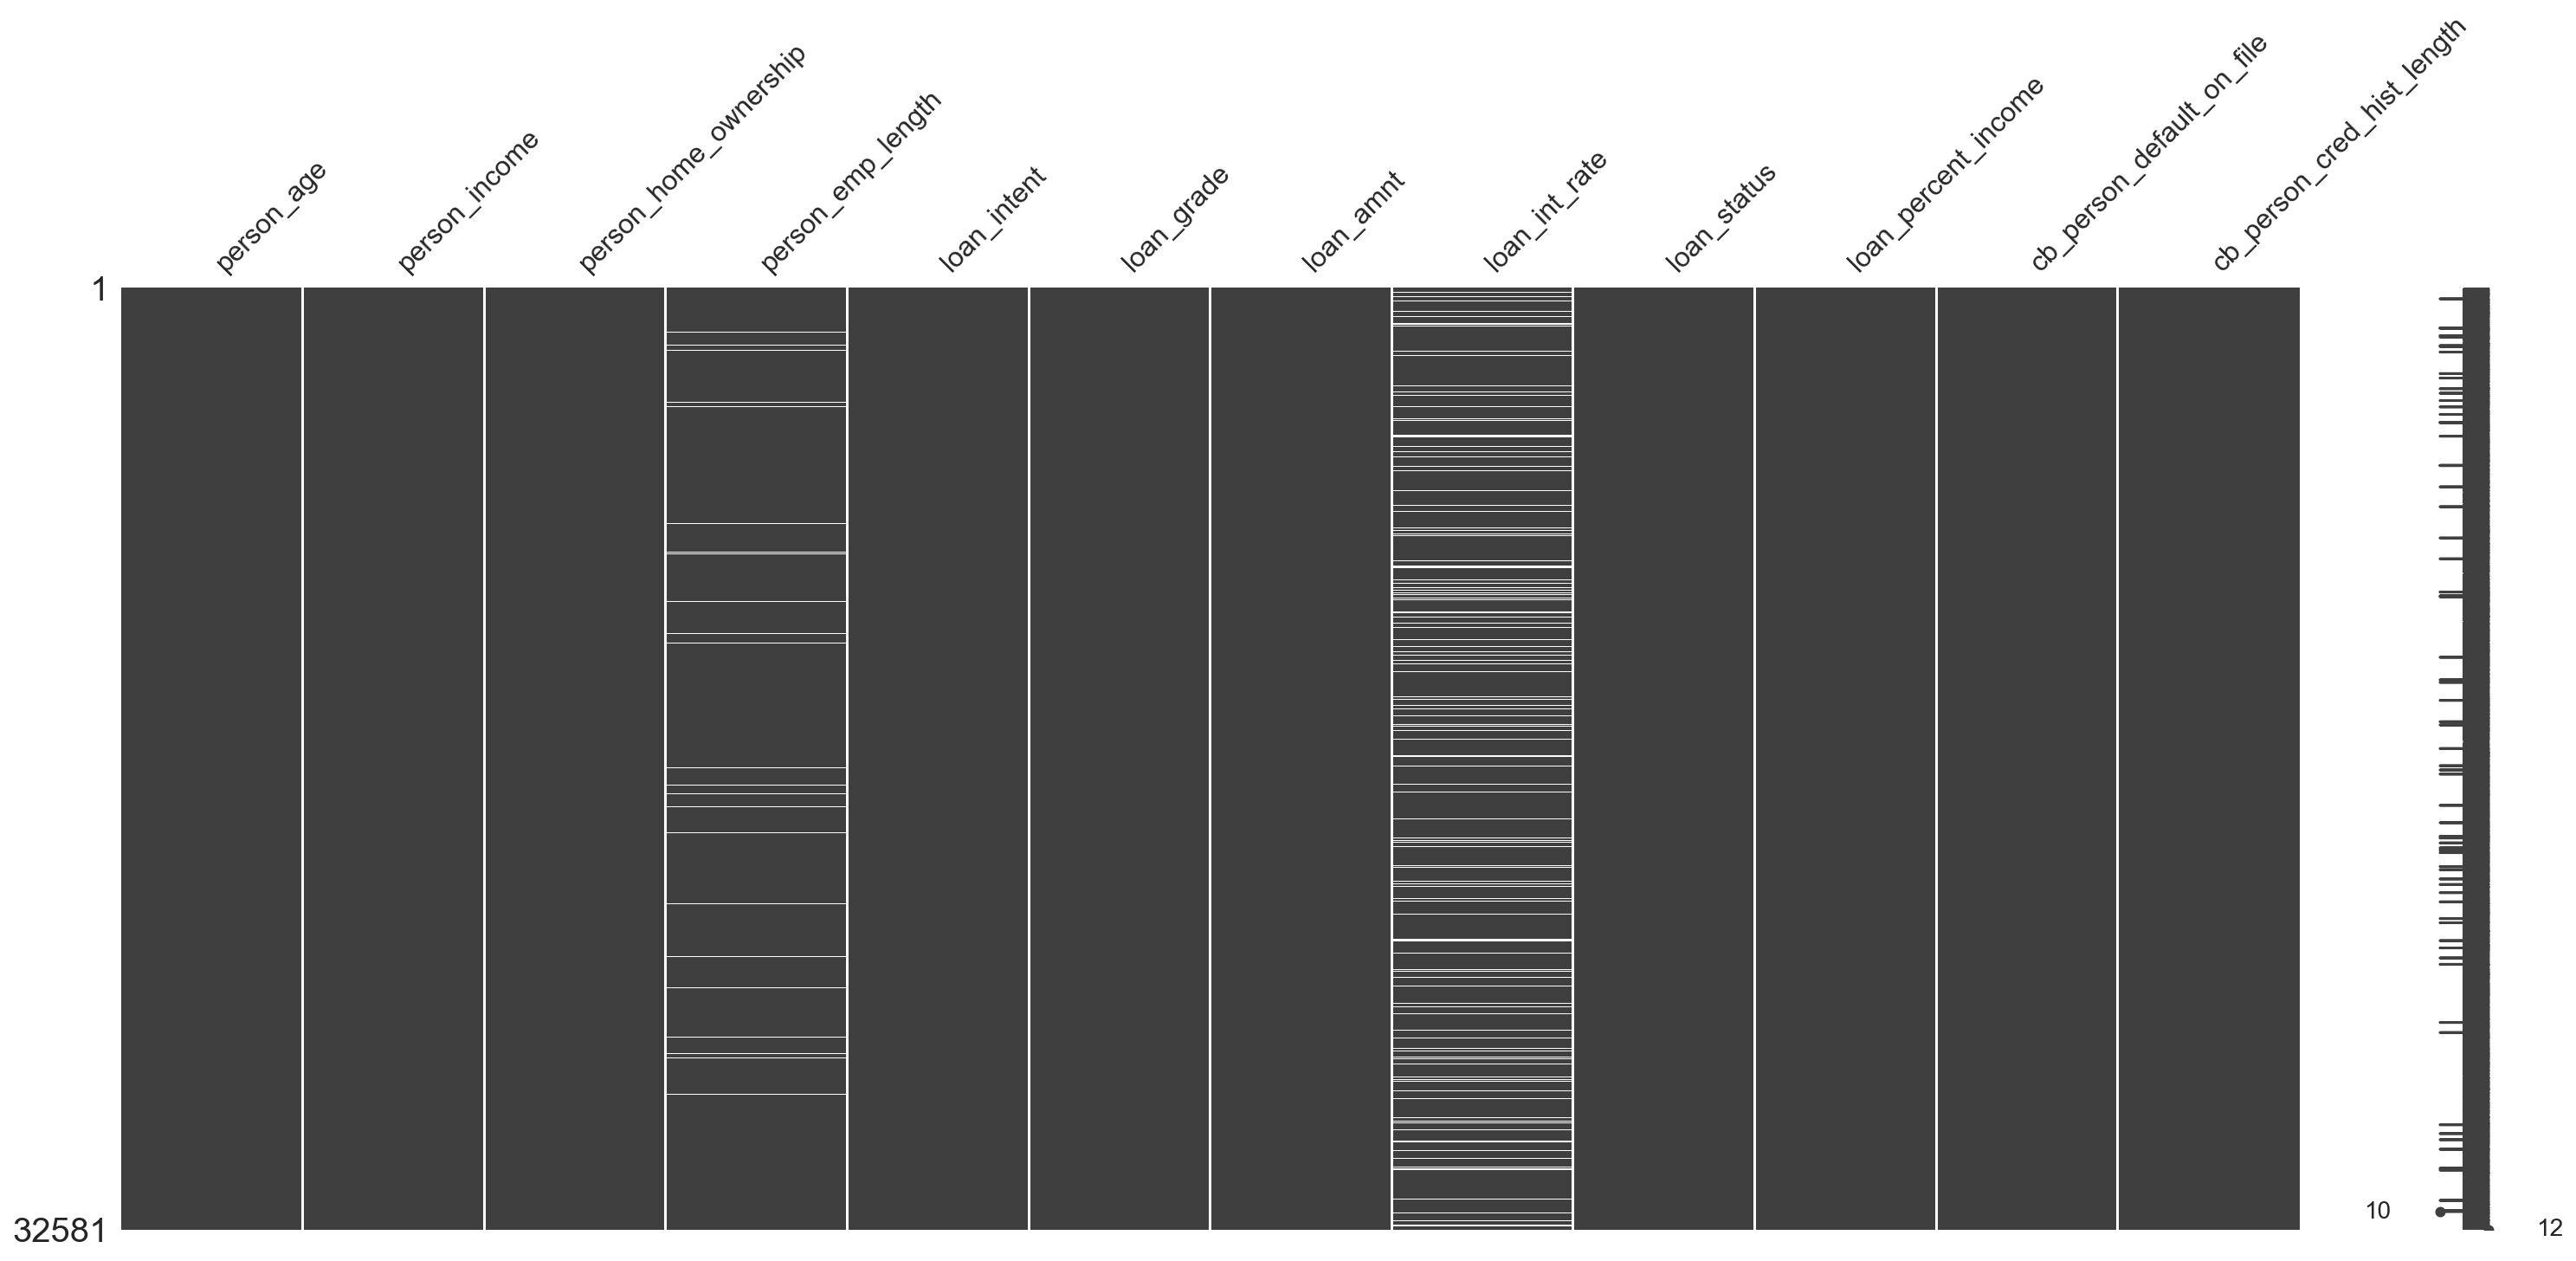

In [116]:
import missingno as msno
plt.figure(figsize=(1,1))
msno.matrix(df);

<Figure size 72x72 with 0 Axes>

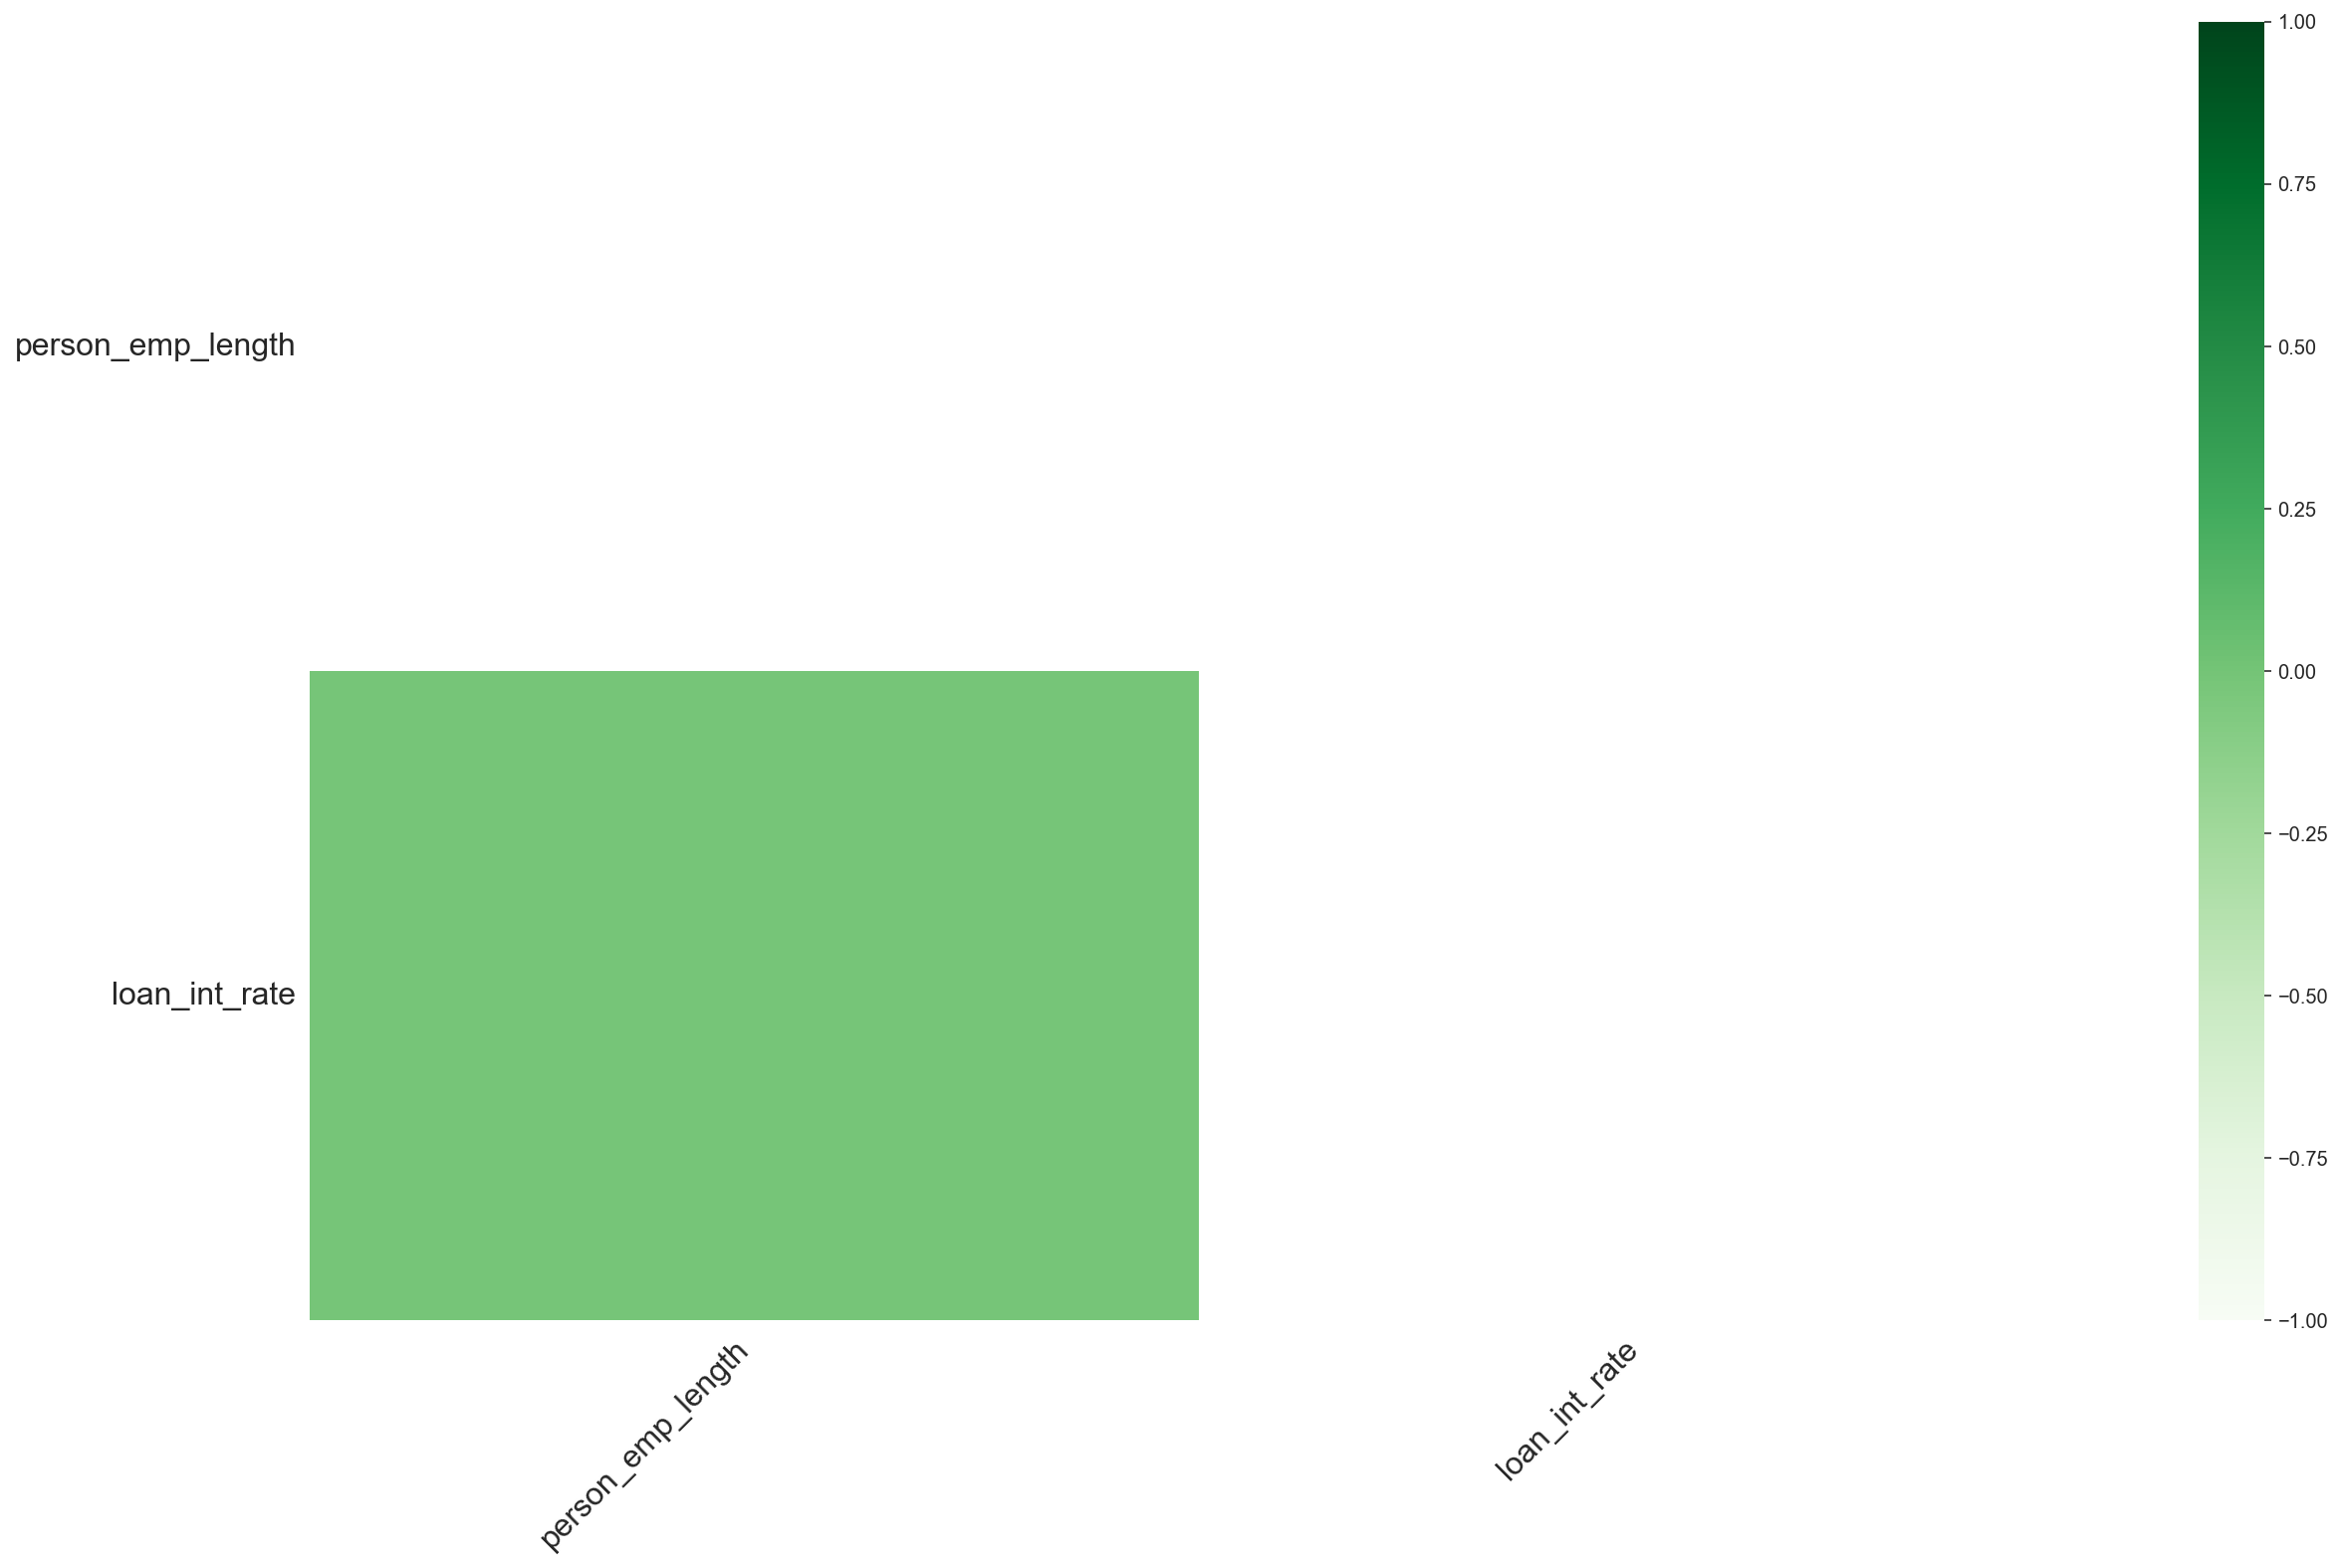

In [117]:
plt.figure(figsize=(1,1))
msno.heatmap(df,cmap='Greens');

# Duplicated Rows

In [118]:
duplicate_rows=df[df.duplicated()]
print('Number of duplicated rows:',duplicate_rows.shape[0])

Number of duplicated rows: 165


# Outliers & Anomaliers

1. Univariate Outliers
- IQR Proximity Rule(Non-Parametric)
- Box-Plot (Non-Parameric)
- Z-Score (Parametric)-X
- Percentile Method
- Isolation Forest Algorithm-X
- Median Absolute Deviation(MAD)-X
- KNN-X

2. Bi-variate Outliers
- Scatter Plot

### Note

1. Z-Score is not preffered method to detect outliers in this perticular dataset since it is Parametric test 
and none of the variable  (column) in the dataset is either normally distributed or closely normally distributed
2. Use of IQR proximity rule is preferable as the data is not normaly distributed
3. Methods like Median Absolute Deviation (MAD), KNN requires the dedicated library like pyOD

In [120]:
# Univariate Outliers

# Method-1 (IQR Proximity Rule)

percentile_25=df_num['person_age'].quantile(0.25)
percentile_75=df_num['person_age'].quantile(0.75)

percentile_25
percentile_75

# Values of percentile_25 & percentile_75 cross-checked with df.describe() function.

iqr=percentile_75-percentile_25
iqr

# Defining Upper & Lower limits

upper_limit=percentile_75+1.5*iqr
lower_limit=percentile_25+1.5*iqr

upper_limit
lower_limit


# Outliers

df_num[df_num['person_age']>upper_limit]
df_num[df_num['person_age']>lower_limit]

# OR

IQR_Outliers=df_num[(df_num.person_age<=lower_limit) | (df_num.person_age>=upper_limit)]
IQR_Outliers

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0              22          59000              123.0      35000          16.02   
1              21           9600                5.0       1000          11.14   
2              25           9600                1.0       5500          12.87   
3              23          65500                4.0      35000          15.23   
4              24          54400                8.0      35000          14.27   
...           ...            ...                ...        ...            ...   
32576          57          53000                1.0       5800          13.16   
32577          54         120000                4.0      17625           7.49   
32578          65          76000                3.0      35000          10.99   
32579          56         150000                5.0      15000          11.48   
32580          66          42000                2.0       6475           9.99   

       loan_status  loan_percent_income  cb_person_cred_hist_length  
0                1                 0.59                           3  
1                0                 0.10                           2  
2                1                 0.57                           3  
3                1                 0.53                           2  
4                1                 0.55                           4  
...            ...                  ...                         ...  
32576            0                 0.11                          30  
32577            0                 0.15                          19  
32578            1                 0.46                          28  
32579            0                 0.10                          26  
32580            0                 0.15                          30  

[29280 rows x 8 columns]

In [121]:
# Univariate Outliers

# Method-2 (Percntile Method)

# It is similer to IQR method. Here, we arbitrarily decide the cut-off percentiles on both extremes.

upper_bound=df_num['person_age'].quantile(0.99)
lower_bound=df_num['person_age'].quantile(0.01)

# upper_bound=df_num['person_age'].quantile(0.95)
# lower_bound=df_num['person_age'].quantile(0.05)

# upper_bound=df_num['person_age'].quantile(0.90)
# lower_bound=df_num['person_age'].quantile(0.10)

print(upper_bound)
print(lower_bound)

50.0
21.0


In [122]:
df_num[(df_num.person_age> 50) | (df_num.person_age<22)]

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
1              21           9600                5.0       1000          11.14   
5              21           9900                2.0       2500           7.14   
9              21          10000                6.0       1600          14.74   
11             21          10000                2.0       4500           8.63   
26             21          11000                3.0       4575          17.74   
...           ...            ...                ...        ...            ...   
32576          57          53000                1.0       5800          13.16   
32577          54         120000                4.0      17625           7.49   
32578          65          76000                3.0      35000          10.99   
32579          56         150000                5.0      15000          11.48   
32580          66          42000                2.0       6475           9.99   

       loan_status  loan_percent_income  cb_person_cred_hist_length  
1                0                 0.10                           2  
5                1                 0.25                           2  
9                1                 0.16                           3  
11               1                 0.45                           2  
26               1                 0.42                           3  
...            ...                  ...                         ...  
32576            0                 0.11                          30  
32577            0                 0.15                          19  
32578            1                 0.46                          28  
32579            0                 0.10                          26  
32580            0                 0.15                          30  

[1532 rows x 8 columns]

In [123]:
# Univariate Outliers

# Method-1 (IQR Proximity Rule)

percentile_25=df_num['cb_person_cred_hist_length'].quantile(0.25)
percentile_75=df_num['cb_person_cred_hist_length'].quantile(0.75)

percentile_25
percentile_75

# Values of percentile_25 & percentile_75 cross-checked with df.describe() function.

iqr=percentile_75-percentile_25
iqr

# Defining Upper & Lower limits

upper_limit=percentile_75+1.5*iqr
lower_limit=percentile_25+1.5*iqr

upper_limit
lower_limit


# Outliers

df_num[df_num['cb_person_cred_hist_length']>upper_limit]
df_num[df_num['cb_person_cred_hist_length']>lower_limit]

# OR

IQR_Outliers=df_num[(df_num.person_age<=lower_limit) | (df_num.person_age>=upper_limit)]
IQR_Outliers

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0              22          59000              123.0      35000          16.02   
1              21           9600                5.0       1000          11.14   
2              25           9600                1.0       5500          12.87   
3              23          65500                4.0      35000          15.23   
4              24          54400                8.0      35000          14.27   
...           ...            ...                ...        ...            ...   
32576          57          53000                1.0       5800          13.16   
32577          54         120000                4.0      17625           7.49   
32578          65          76000                3.0      35000          10.99   
32579          56         150000                5.0      15000          11.48   
32580          66          42000                2.0       6475           9.99   

       loan_status  loan_percent_income  cb_person_cred_hist_length  
0                1                 0.59                           3  
1                0                 0.10                           2  
2                1                 0.57                           3  
3                1                 0.53                           2  
4                1                 0.55                           4  
...            ...                  ...                         ...  
32576            0                 0.11                          30  
32577            0                 0.15                          19  
32578            1                 0.46                          28  
32579            0                 0.10                          26  
32580            0                 0.15                          30  

[32581 rows x 8 columns]

# Outliers Variable -wise (As per IQR Proximity Rule

- 1. person_age= 1494                   
- 2. person_income = 1484              
- 3. person_emp_length = 853           
- 4.  loan_amnt= 1689                  
- 5. loan_int_rate= 6                 
- 6. loan_status= X                  
- 7. loan_percent_income=  651        
- 8. cb_person_cred_hist_length= 1142 

In [ ]:
# Outliers Treatment

# Mainly, there are 2 options - Drag or drop

# Option 1 - Drop
new_df_num=df[df['person_age']<upper_limit & df[df['person_age']>lower_limit]
              
# Option 2 - Cap
              
              
new_df_cap['person_age']=np.where(new_df_cap['person_age']>upper_limit,upper_limit,
                                  np.where(new_df_cap['person_age']<lower_limit,lower_limit,(new_df_cap['person_age']))
# Note:
                                  
# 1. Since outliers are too many, it is not wise to opt the option-1 i.e. drop rows as it leads to significant 
# loss of information.
# Capping is preffered over dropping. on flip side, the outliers are because of human error.
# Max age of 144 indicates the human errorr. in that case droping the outlier is a better solution.
                                  
# 2. Qty. of outliers=1494/32581*100-4.58 %
# 3. Another option is is to modify the upper limit and lower limit by multiply the IQR 
# with higher no. say 2 instead of 1.5
                                  
# 4. which outlier to choose IQR method or percentile method of various percentages?
# check the describe statistics.Choose the one which least affect 
# the mean and other visual parameters like SD
# Also, DS can put the knowledge of domain to identify the ideal cut-off (threshold) for outliers.

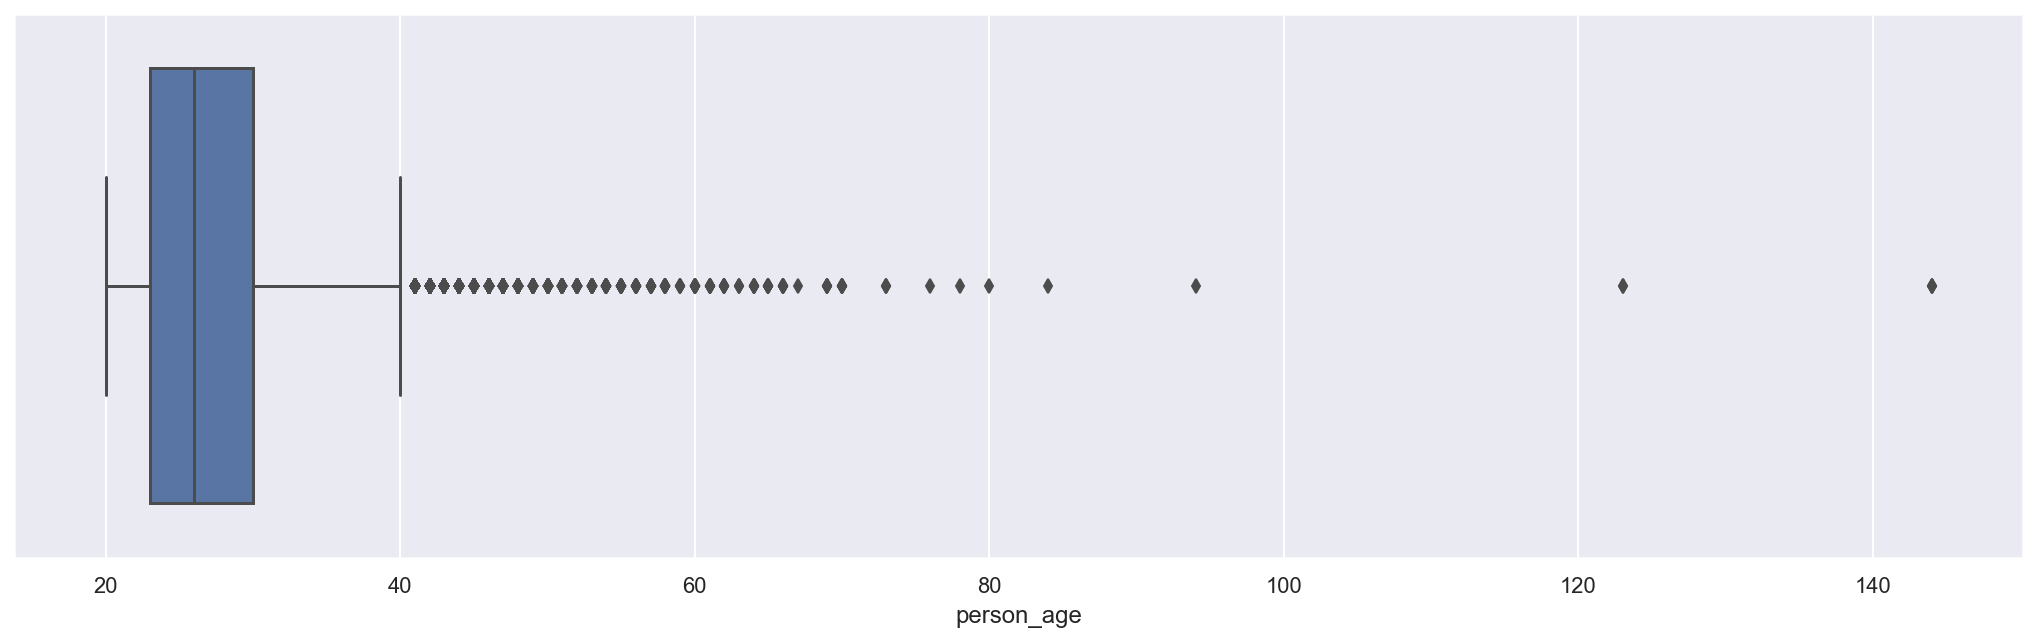

In [126]:
# Uni-Variate Outliers

# Method 3 (Uni- Variate- Box-plot)

sns.set(rc={'figure.figsize':(18,5)})
sns.boxplot(df_num['person_age']);

# code for multiple box-plots in single frame

# num_col_list=df_num[:]
# sns.boxpolt(x='variable',y='value',data=df_num.melt(value_vars=num_col_list))


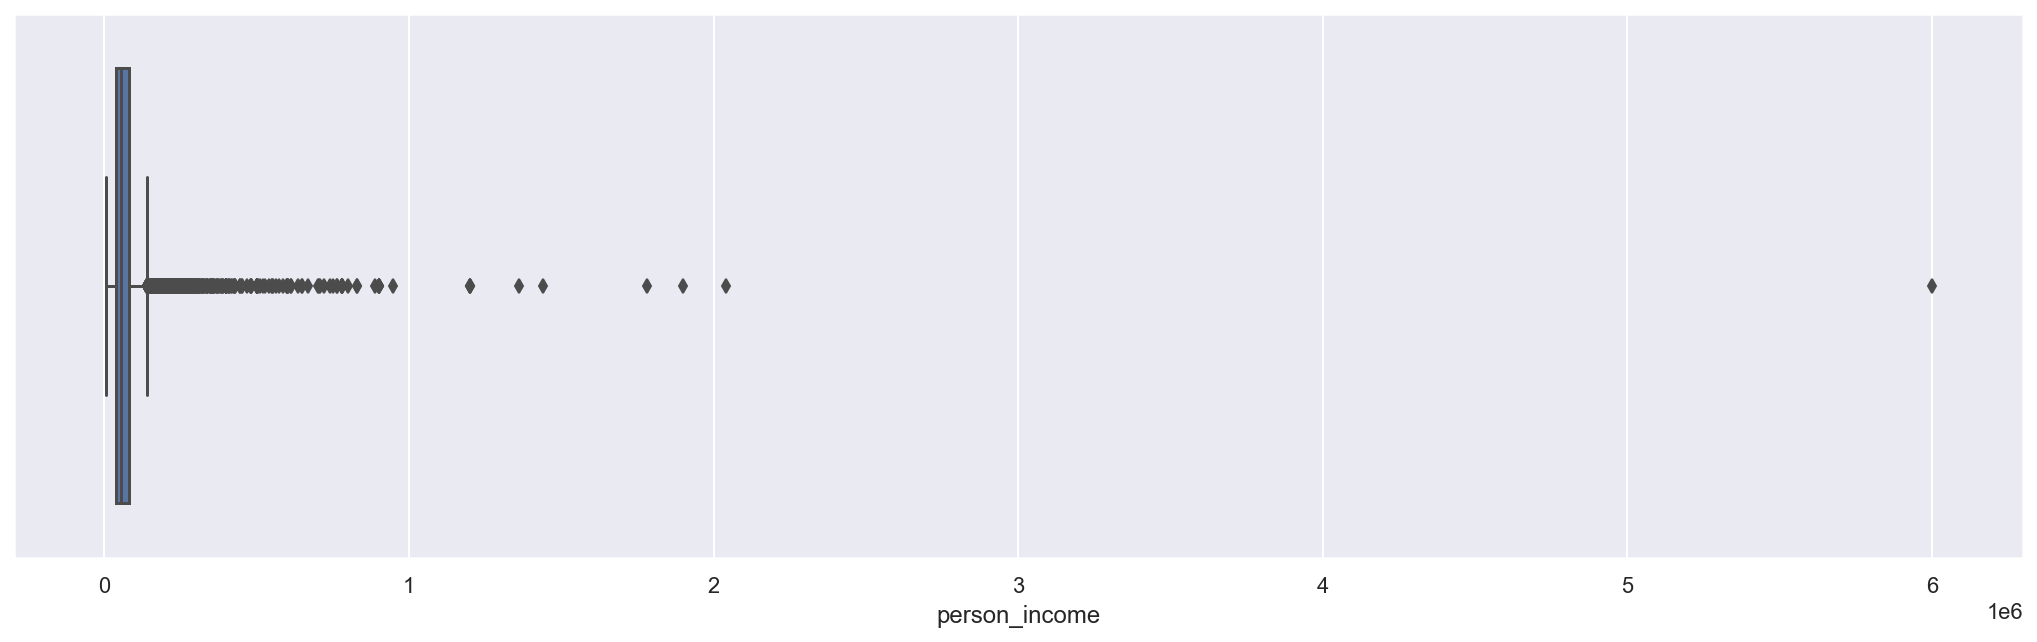

In [127]:
# Uni-Variate Outliers

# Method 3 (Uni- Variate- Box-plot)

sns.boxplot(df_num['person_income']);

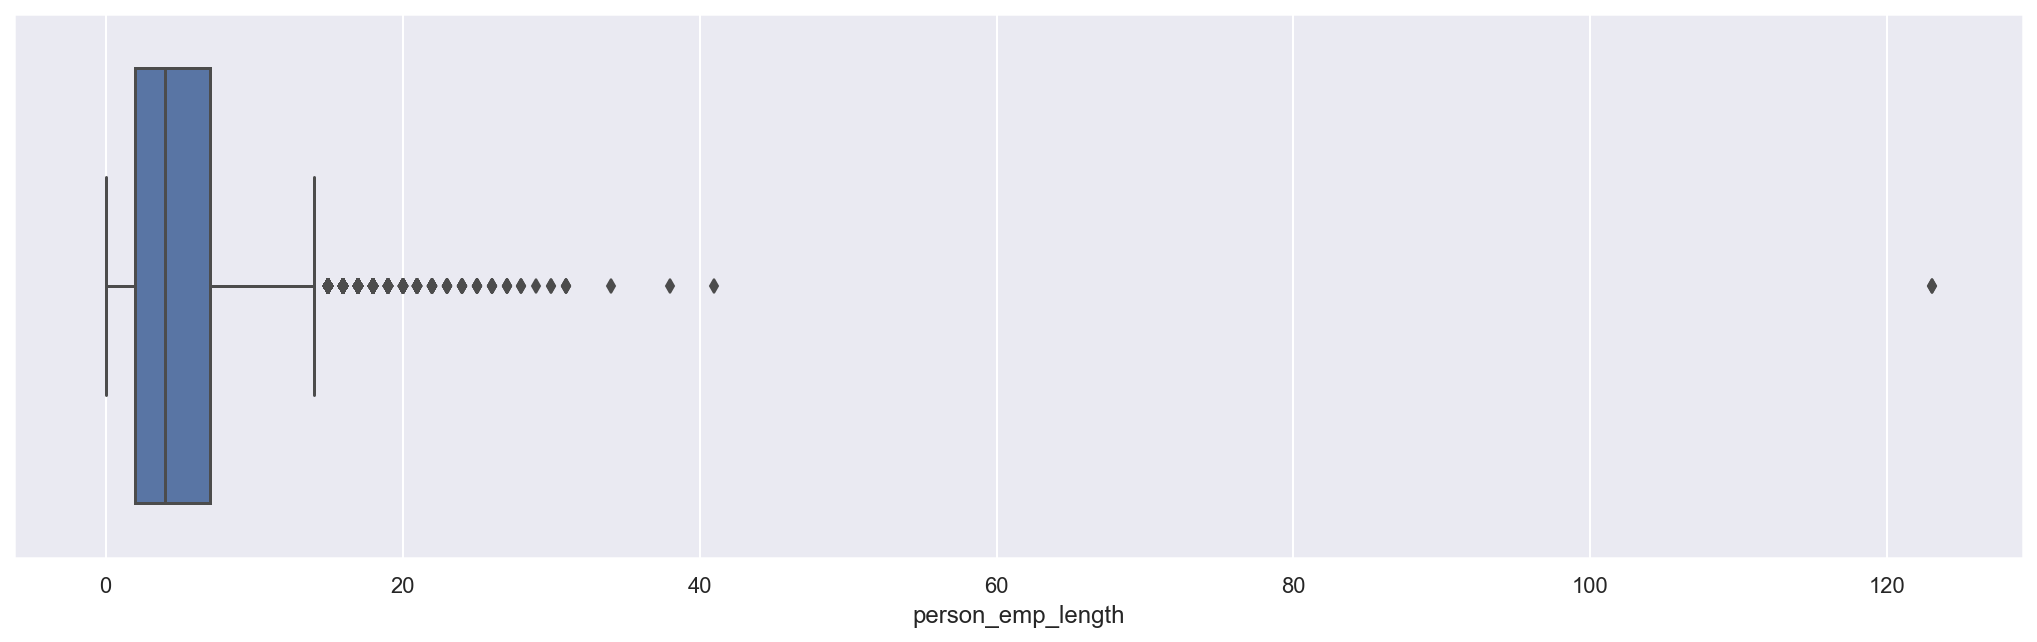

In [128]:
# Uni-Variate Outliers

# Method 3 (Uni- Variate- Box-plot)

sns.boxplot(df_num['person_emp_length']);

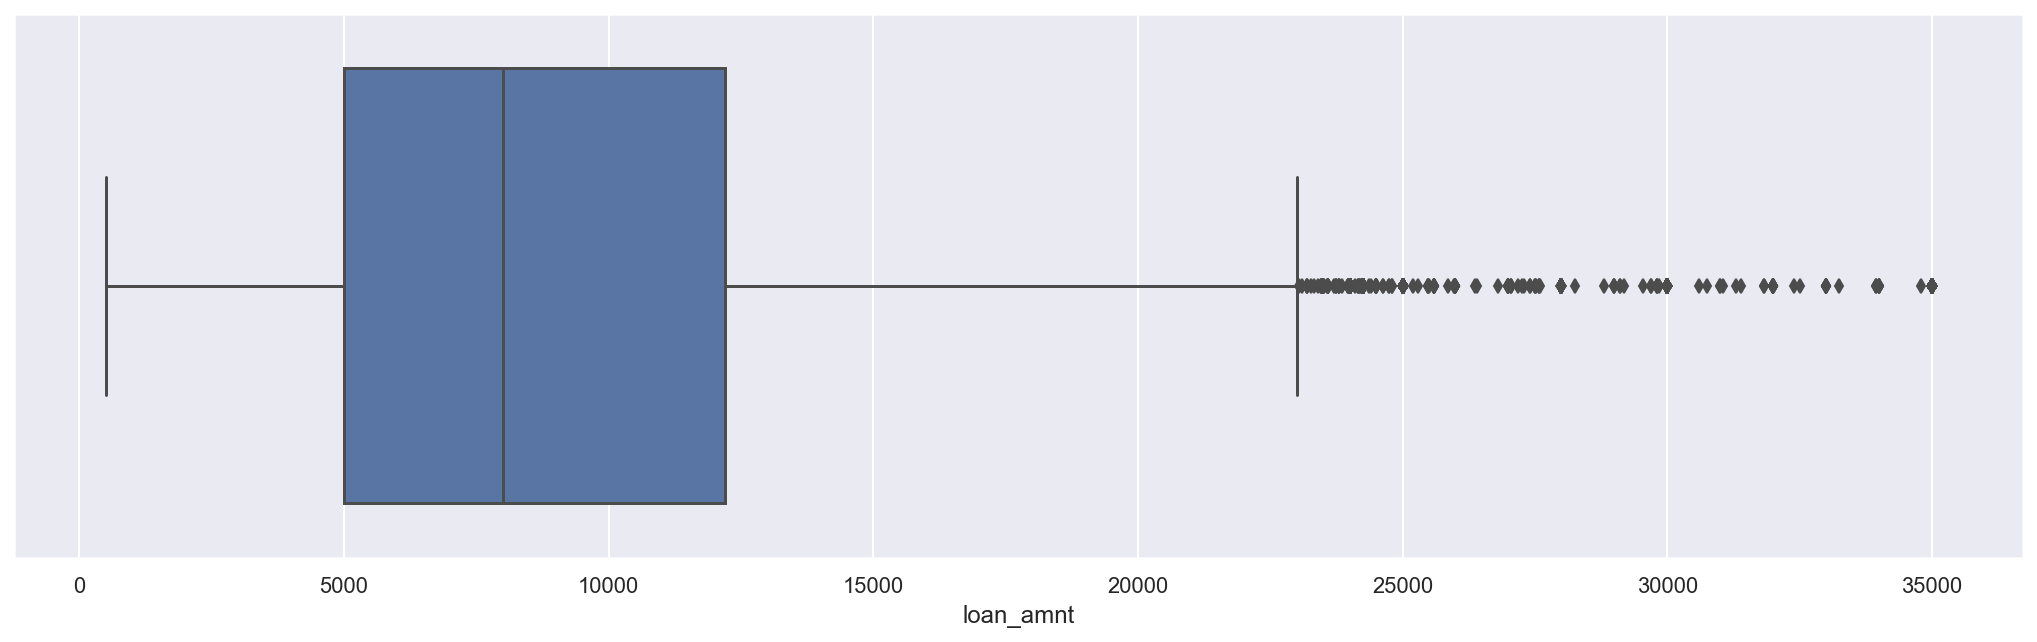

In [129]:
# Uni-Variate Outliers

# Method 3 (Uni- Variate- Box-plot)

sns.boxplot(df_num['loan_amnt']);

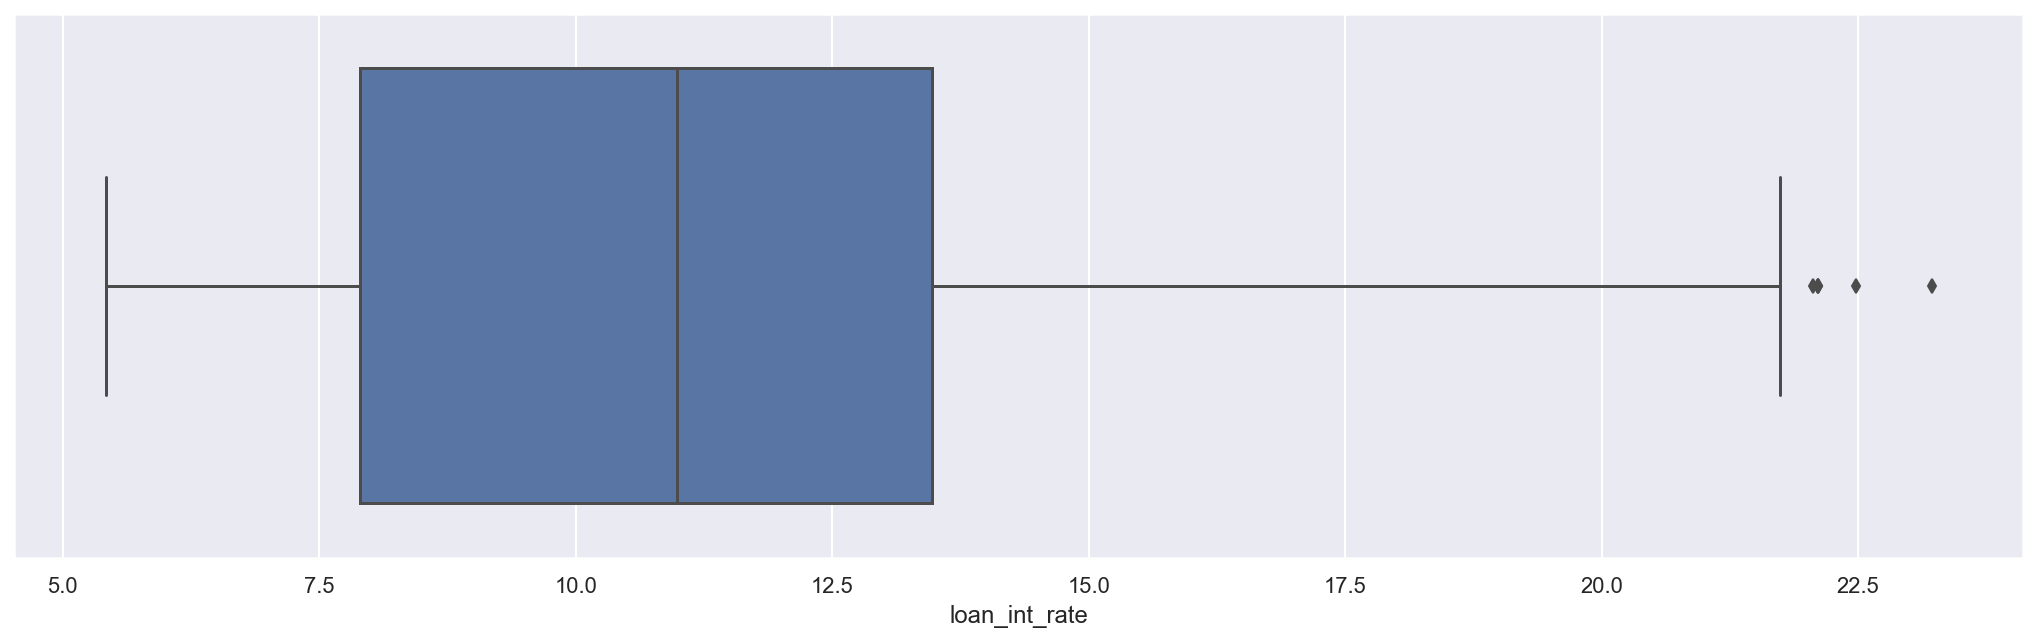

In [130]:
# Uni-Variate Outliers

# Method 3 (Uni- Variate- Box-plot)

sns.boxplot(df_num['loan_int_rate']);

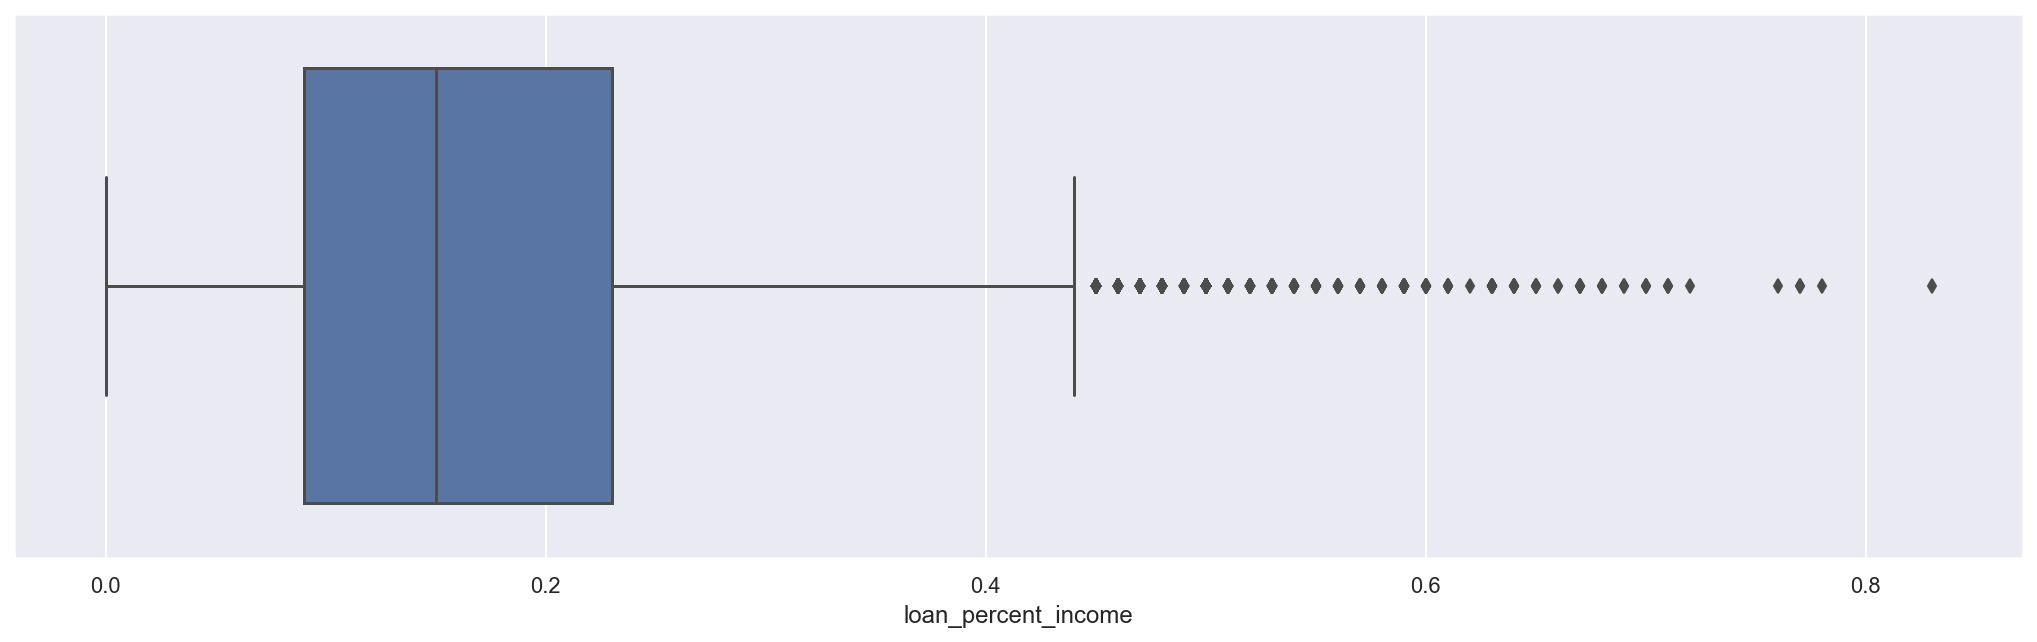

In [131]:
# Uni-Variate Outliers

# Method 3 (Uni- Variate- Box-plot)

sns.boxplot(df_num['loan_percent_income']);

# Bi-Variate Outliers

-1. Scatter Plot (Numerical-Numerical)

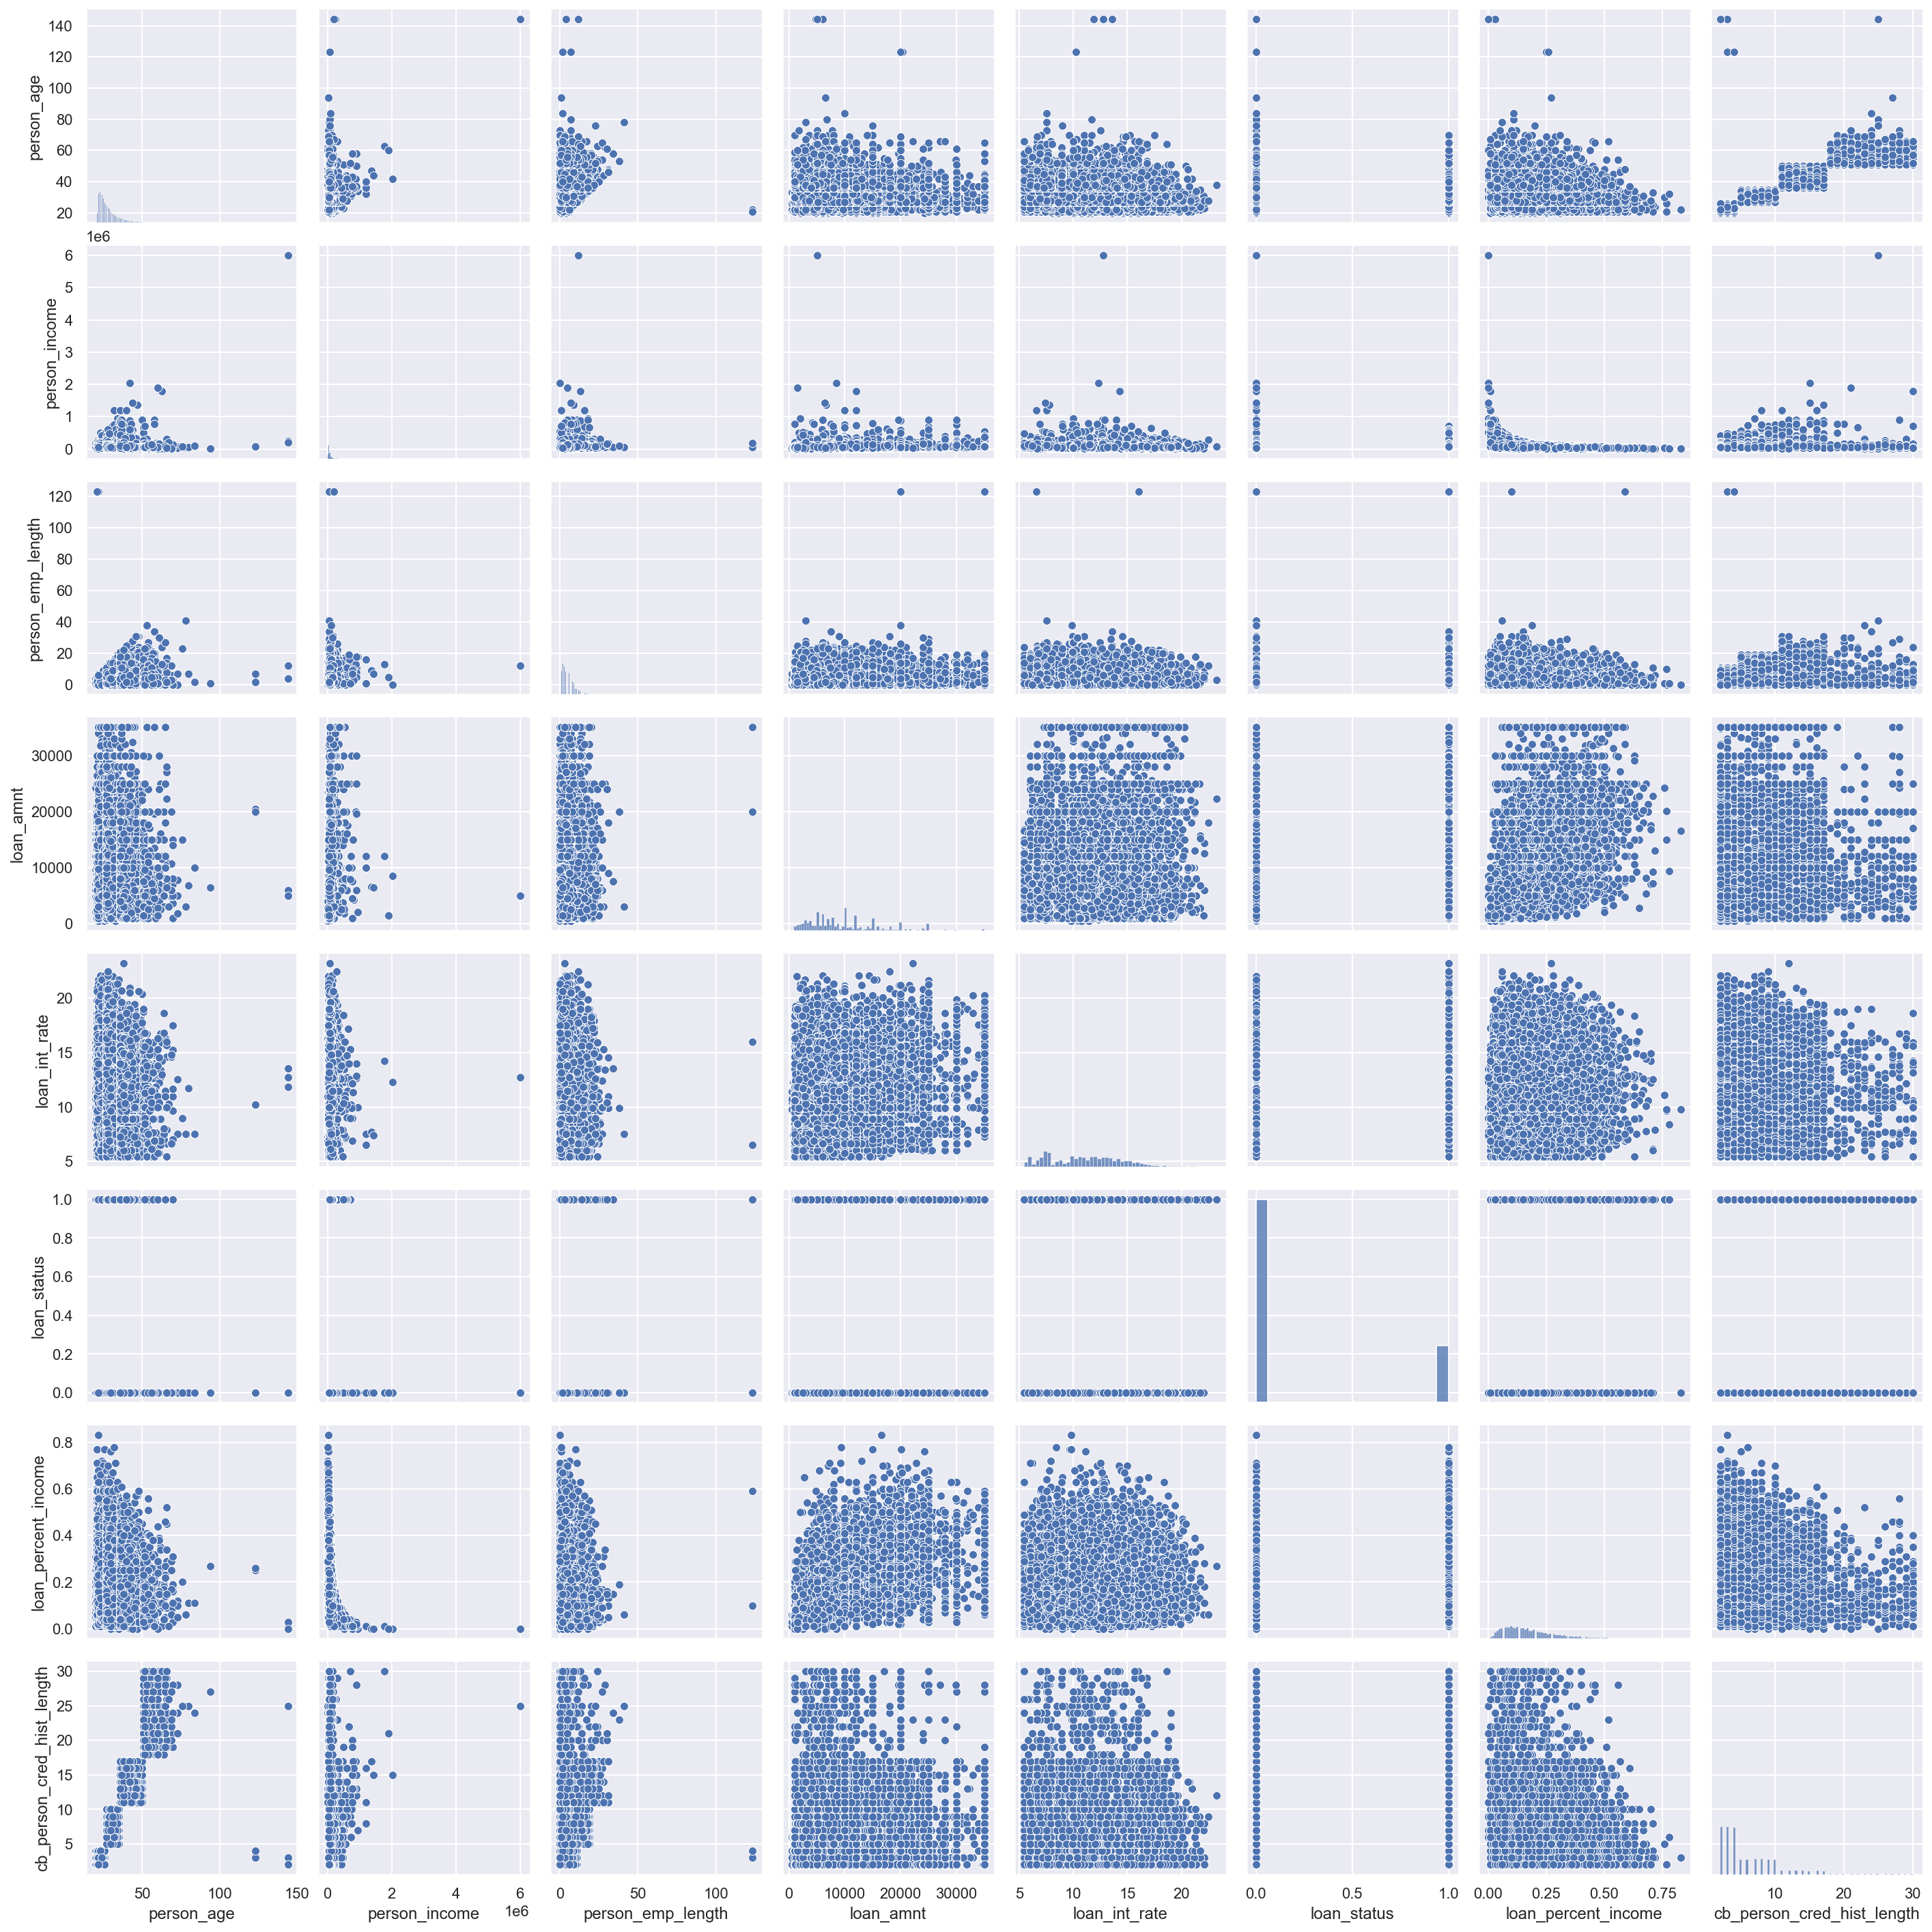

In [132]:
sns.pairplot(data=df);

In [ ]:
# List of Categorical Variables

# 1. person_home_ownership
# 2. loan_intent
# 3. loan_grade
# 4. cb_person_default_on_file

# List of Numerical Variables

# 1. person_age 
# 2. person_income
# 3. person_emp_length
# 4. loan_amnt
# 5. loan_int_rate
# 6. loan_percent_income
# 7. cb_person_cred_hist_length 

# Target Variable 

# Loan_Status--------> Binary Classification


# Key Questions: Answers

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

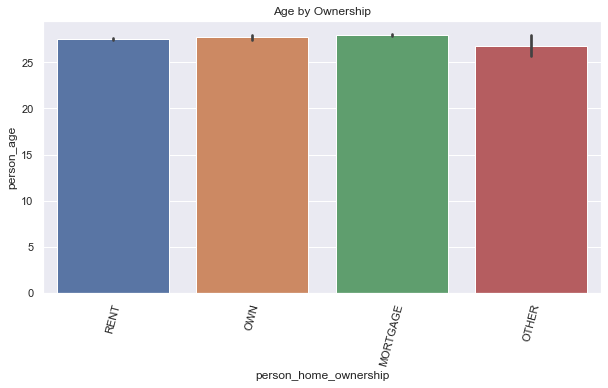

In [100]:
# Q.1 --> What's the average age of applicants having their own home?

plt.figure(figsize=(10,5))
plt.xticks(rotation=75)
plt.title('Age by Ownership')
sns.barplot(x=df_cat['person_home_ownership'],y=df_num['person_age']);

# Observations
# 1. Average age is 28 years.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

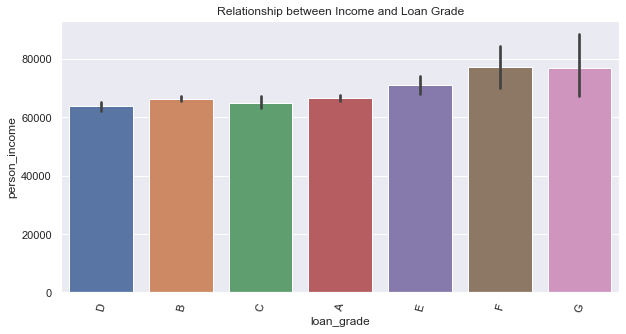

In [101]:
# Q.2 --> What's the relationship between Income and loan grade?

plt.figure(figsize=(10,5))
plt.xticks(rotation=75)
plt.title('Relationship between Income and Loan Grade')
sns.barplot(x=df_cat['loan_grade'],y=df_num['person_income']);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

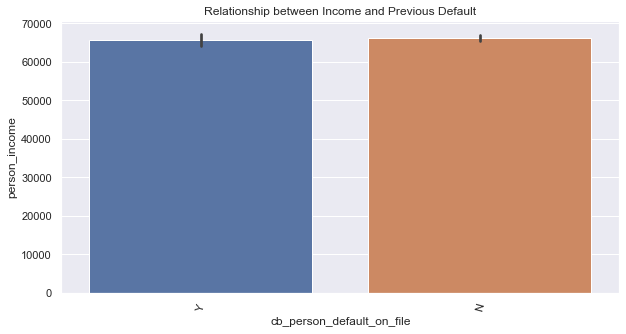

In [102]:
# Q.3 --> What's the relationship between Income and cb_person_default_on_file?

plt.figure(figsize=(10,5))
plt.xticks(rotation=75)
plt.title('Relationship between Income and Previous Default')
sns.barplot(x=df_cat['cb_person_default_on_file'],y=df_num['person_income']);

# Detailed Insights (Variable-wise)

# Age

- 1. Age is numerical variable.

- 2. There is no Missing value in it.

- 3. Age variable ranges from 20 to 144 which definitely creates suspicion about the accuracy of data.

- 4. Mean age of 27.74 indicates data is highly right skewed. skew = 2.58.

- 5. As per box — plot proximity rule, there are 1494 Outliers. (4.58%)

- 6. All outliers are on higher side.

- 7. As per Box-plot, Outliers ranges from 41 to 144.

- 8. Most Outliers lie between age 41 to 70.

- 9. As per Scatter plot, the variable Age has non - linear correlation with all other numerical variables 
except Credit history length as There was no fixed pattern observed.

# Annual Income

1. Annual Income is again a numerical variable.

2. The problem statement is silent about the currency. We assume the currency as INR.

3. There are no Missing values.

4. Income Variable ranges from 4000 to 6000000. The large range must be Standardized. Annual Income of
Rs. 4000 must not be eligible for any type of loan.

5. The distribution of Annual Income is highly right skewed.

6. Mean Annual income is Rs. 66075 and Standard Deviation is 61983, This seems to be a great variation.

7. As per box — plot proximity rule, there are 1484 Outliers (4.55%).

8. All outliers are on higher side.

9. As per Box-plot, Outliers ranges from to

10. As per Scatter plot, the variable Annual Income has non — linear correlation with all other numerical variables, There is no fixed pattern.


# Home Ownership 
1. Home Ownership is a Nominal Categorical Variable.
2. There are 4 unique values in it namely, RENT - 50.48% MORTGAGE - 41.26% OWN - 7.93%  and OTHER- 0.33%
3. The category Other is not defined and is very rare and is safe to ignore.
4. There are no Missing Values in the Variable Home Ownership.
5. From Bank's perspective, the borrower with Own House are considered to be less risky. However, it should not be 
the sole consideration.

# Employment length (in years)

1. No, of years of employment is a numerical variable.

2. This variable has Missing values. The magnitude of missing is around 2.75%.

3. It seems the missing values are not because of any error.

4. It's a classic case of Structurally Missing Data. It is missing because it should not exist. The reason for missingness
is perhaps some borrowers have their Own business and is not employed.

5. Considering the reason of missingness and magnitude of missing data, the suggested course of action 
is List — wise deletion of missing values.

6. The maximum employment length is 123 years, an indication of error.

7. The distribution of years of employment is again right skewed.

8. As per IQR proximity rule, there are 853 Outliers. (2.70%)

# Loan Grade

1. This variable is Ordinal Categorical Variable.
2. There are no details given about this Variable like on what criteria grades are allotted. Here, we are assuming, 
higher the grade, lower is the chances of Default. Going by that logic, borrowers categorized as Grade — A must have 
low probability of getting Default and vice — versa. We will check the percentage of Default for every grade.
3. There are no Missing Values.
4. There are 7 unique values in it namely, A- 33.08% B - 32.08% C - 19.82% D - 11.13% E - 2.96% F - 0.74% G - 0.20%

# Loan Amount

1. Loan amount is a Numerical Variable.

2. There are no Missing Values.

3. Loan amount ranges from Rs. 500 to Rs. 35000.

4. Loan amount of Rs. 500 is too low to believe on genuineness of data.

5. Loan amount distribution is asymmetrical and skewed.

6. As per IOR Proximity Rule, there are 1689 Outliers in the variable Loan Amount. (5.18%).
7. As per Box — Plot, most of the Outliers are between 23,000 to 27,000.

8. As per Scatter Plot, Loan amount is in non — linear relation with other variables.

# Interest rate 

1. Interest rate is a Nomericatl Variable.

2. Though explicitly not mentioned anywhere about the Unit but it is in terms of percentage (%).

3. Interest rates ranges from 5.42% to 23.2%.

4. Technically, this variable should be Categorical with fewer no. of interest rates.

5. There are 29465 values and 348 unique values

6. There are too many Missing values: 3116 (9.56%),

7. There are mere 6 Outliers in intr. rate variable.

8. Nature of Variable and Magnitude of Missing values makes this variable a tricky one.

9. As per my Dornain Knowledge and Dendrogram, this variable is important and have high predictive power.

10. So, dropping the variable is not an option.

11. As per Dendrogram, this variable is highly co - related to variable Employment length and variable Past Default History.

12. Suggested course of action is — i. Drop Outliers ii. impute Missing values iii, Filter top 10 or 20 high frequency
int. rate iv. Analyse the above with Target Variable

# Loan - Income Percent

1. Loan to Income is a Numerical Variable.

2. It ts in relative term. (in terms of ratio).

3. in finance jargon, it is called as “Debt to income ratio". (OT!).

4. Good / \deal DT! ratio —> The percentage of DT! ratio may vary from lender to lender. However, in general, a DT! ratio 
of up to 40% may be considered suitable for getting a loan approved. DT! of 21% - 35% is considered as very good.

5. Lesser the ratio, lesser are the chances of Default and vice — versa.

6. There are no Missing values.

7. The ratio ranges from 0 to 0.83.

8. The distribution is asymmetrical and skewed.

9. As per IQR proximity rules, there are 651 Outliers (2%),

10. There are just 77 unique values. Technically, it is Categorical and must analyse that way only.

11. By analysing, the loan status with DTI ratio, it supports the above rationale. As the DT! increases,
the rate of default also increases and vice ~ versa’

# History of Default

1. History of Detault is Nominal Categorical Variable.

2. There are no Missing values.

3. There are only 2 unique values namely, Yes — 17.63% and No - 82.37%

4. Analysing this variable w.r.t. Loan Status variable will give some vital insights.

# Credit history length

1. Credit history length is Numerical variable.

2. There are no Missing values.

3. The variable ranges from 2 years to 30 years.

4. Longer the history, more knowledge about the Borrower which means more transparency and ultimately more reliable.
5. So, based on Domain knowledge, Person's Credit History length variable is positively correlated with Target Variable.
6. There are mere 29 categorical values.

# Insights from Bi - Variate Analysis

1. Home Ownership ~ Loan Status
| Home Ownership      | Default | Non-default        | Percent Share     |
| :---        |    :----:   |          ---: |          ---: |
| Rent      | 31.57%       | 68.43%   | 50.48%   |
| Mortagage   | 7.47%        | 92.53%      | 41.26%      |
| Own   | 12.57%        | 87.43%      | 7.93%      |
| Other   | 30.84%        | 69.16%      | 0.33%      |

Borrowers who live on rented house has highest percentage of default.

2. Loan Intention — Loan Status

| Loan Intention | Default | Non - Default | Percent share |
| :---        |    :----:   |          ---: |          ---: |
| Education | 17.22% | 82.78% | 19.81% |
| Medical | 26.70% | 73.30% | 18.63% |
| Venture | 14.81% | 85.19% | 17.55% |
| Personal | 19.89% | 80.11% | 16.94% |
| Debt Consolidation | 28.59% | 71.41% | 16.00% |
| Home Improvement | 26.10% | 73.90% | 11.06% |

As was predicted Debt Consolidation has highest Default rate of 28.59% followed by medical loan.


3. Loan Grade — Loan Status


|Loan Grade | Default | Non - Default | Percent Share |
| :---        |    :----:   |          ---: |          ---: |
|A | 9.96% | 90.04% | 33.08% |
|B | 16.28% | 83.72% | 32.08%| 
|C | 20.73% | 79.27% | 19.82% |
|D | 59.05% | 40.95% | 11.13% |
|E | 64.42% | 35.58% | 2.96% |
|F | 70.54% | 29.46% | 0.74% |
|G | 98.44% | 1.56% | 0.20% |

Loan Grade - A Grade have least percentage of Default rate while Grade - G have the most.

4. DTI — Loan — Status

| DTI | Default | Non - Default |
| :---        |    :----:   |          ---: |
| 0.00 | 0.00% | 100% |
| 0.01 | 5.76% | 94.24% |
| 0.02 | 8.92% | 91.08% |
| 0.03 | 9.62% | 90.38% |
| 0.04 | 12.3% | 87.70% |
| 0.05 | 9.93% | 90.07% |
| 0.71 | 66.67% | 33.33% |
| 0.72 | 100% | 0.00% |
| 0.76 | 100% | 0.00% |
| 0.77 | 100% | 0.00% |
| 0.78 | 100% | 0.00% |
| 0.04 | 12.3% | 87.70% |
| 0.05 | 9.93% | 90.07% |
| 0.71 | 66.67% | 33.33% |
| 0.72 | 100% | 0.09% |
| 0.76 | 100% | 0.00% |
| 0.77 | 100% | 0.00% |
| 0.78 | 100% | 0.00% |
| 0.83 | 0.00% | 100% |

Except few exceptions, as the DTI increase, rate of default also increases
which supports the theory of finance, lower the DTI.

5. History of Default — Loan Status

| Default History | Default | Non - Default | Percent Share |
| :---        |    :----:   |          ---: |          ---: |        
| Yes | 37.81% | 62.19% | 17.63%
| No | 18.39% | 81.61% | 82.37%


Trend is pretty clear. Default rate is higher for borrowers who have
Default history.


6. Length of Credit History — Loan Status

| Credit History | Default | Non - Default |
| :---        |    :----:   |          ---: |             
| 2 | 23.57% | 76.43% | 
| 3 | 22.28% | 77.72% | 
| 4 | 22.31% | 77.69% | 
| 5 | 20.63% | 79.37% | 
| 27 | 36.36% | 63.64% | 
| 28 | 33.33% | 66.67% | 
| 29 | 42.86% | 57.14% | 
| 30 | 22.73% | 77.27% | 

1. For lesser no. of years ef credit history, the default rate is low.

2. From 19 years onwards, it keeps increasing with exception 23rd and
26th year.

3. 26th year has lowest default rate of mere 6.25%.

# Important Insights: 

1. It's a Binary Classification problem consist of Target Variable “Loan Status” -

- 0 —> Not Default

- 1-—> Default
2. There are records of 32,581 borrowers evaluated on 12 parameters (columns).
3. Target Variable is highly imbalanced. The ratio of Target Variables is 21.82: 78.18 (0:1) 
    (Majority class is twice of Minority class).
4. Mainly, there are 4 Categorical Variables (dtype = Object). The details of which as hereunder:

- Binary — History of Default
- Nominal —- Home Ownership, Loan Intention
- Ordinal — Loan Grade
5. There are only 2 Variables which have Missing Values:

- Interest rate - 9.56%
- Employment length - 2.75% There are total 4011 missing values in a given dataset.
6. There are 165 duplicate values.
7. Except Int. rate variable, all variables are Asymmetric and are Skewed.
8. There are neither Zero ~ Variance (constant) variables nor near Zero ~ Variance (Quasi-Constant) variables. (Threshold = 0.10).
9. Below are the Variable - wise Outliers computed on the basis of OR Proximity Rules:

- Age = 1494
- Income = 1484
- Employment length = 853
- Loan amount = 1689
- Interest rate = 6 
- Debt to Income ratio = 651
- Credit History length = 1142
10. As per Heatmap. the following pair of variables are highly correlated:

- Age & Credit History length - 0.86

# Data Pre-Processing Checklist
- Import Scikit Learn Libraray
- Handle Missing Values
- Handle Outliers
- Handle Imbalance Dataset (Target Variable)
- Remove Duplicate Values
- Feature Scalling
- Handle Categorical Features (Coddeing and Labelling)
- Feature Selection
- Splitting Data into train-test